<a href="https://colab.research.google.com/github/Onyimatics/msc_dissertation/blob/master/Fibro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido --quiet
!pip install --upgrade plotly --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 84.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import openai
from google.colab import userdata
import kaleido
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
!plotly_get_chrome


Plotly will install a copy of Google Chrome to be used for generating static images of plots.
Chrome will be installed at: /usr/local/lib/python3.11/dist-packages/choreographer/cli/browser_exe
Do you want to proceed? [y/n] y
Installing Chrome for Plotly...
Chrome installed successfully.
The Chrome executable is now located at: /usr/local/lib/python3.11/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/BCU/MSc Dissertation/data/fibromyalgia_dataset.csv'
df_clean = pd.read_csv(file_path)

In [ ]:
# df_clean = pd.read_csv('fibromyalgia_forum_preprocessed.csv')

In [ ]:
df.head(50)

thread_id  \
0   my-advice-for-managing-fibromyalgia-especially...   
1   my-advice-for-managing-fibromyalgia-especially...   
2   my-advice-for-managing-fibromyalgia-especially...   
3   my-advice-for-managing-fibromyalgia-especially...   
4   my-advice-for-managing-fibromyalgia-especially...   
5   my-advice-for-managing-fibromyalgia-especially...   
6   my-advice-for-managing-fibromyalgia-especially...   
7   my-advice-for-managing-fibromyalgia-especially...   
8   my-advice-for-managing-fibromyalgia-especially...   
9   my-advice-for-managing-fibromyalgia-especially...   
10  my-advice-for-managing-fibromyalgia-especially...   
11  my-advice-for-managing-fibromyalgia-especially...   
12  my-advice-for-managing-fibromyalgia-especially...   
13  my-advice-for-managing-fibromyalgia-especially...   
14  my-advice-for-managing-fibromyalgia-especially...   
15  my-advice-for-managing-fibromyalgia-especially...   
16  my-advice-for-managing-fibromyalgia-especially...   
17  my-advice-for-managing-fibromyalgia-especially...   
18  my-advice-for-managing-fibromyalgia-especially...   
19  my-advice-for-managing-fibromyalgia-especially...   
20  my-advice-for-managing-fibromyalgia-especially...   
21  my-advice-for-managing-fibromyalgia-especially...   
22  my-advice-for-managing-fibromyalgia-especially...   
23  my-advice-for-managing-fibromyalgia-especially...   
24  my-advice-for-managing-fibromyalgia-especially...   
25  my-advice-for-managing-fibromyalgia-especially...   
26  my-advice-for-managing-fibromyalgia-especially...   
27  my-advice-for-managing-fibromyalgia-especially...   
28  my-advice-for-managing-fibromyalgia-especially...   
29  my-advice-for-managing-fibromyalgia-especially...   
30               is-it-age-pains-or-fibro-pains.31069   
31               is-it-age-pains-or-fibro-pains.31069   
32               is-it-age-pains-or-fibro-pains.31069   
33            crashing-flaring-how-it-is-for-me.30882   
34            crashing-flaring-how-it-is-for-me.30882   
35            crashing-flaring-how-it-is-for-me.30882   
36            crashing-flaring-how-it-is-for-me.30882   
37            crashing-flaring-how-it-is-for-me.30882   
38            crashing-flaring-how-it-is-for-me.30882   
39            crashing-flaring-how-it-is-for-me.30882   
40            crashing-flaring-how-it-is-for-me.30882   
41            crashing-flaring-how-it-is-for-me.30882   
42            crashing-flaring-how-it-is-for-me.30882   
43            crashing-flaring-how-it-is-for-me.30882   
44            crashing-flaring-how-it-is-for-me.30882   
45            crashing-flaring-how-it-is-for-me.30882   
46            crashing-flaring-how-it-is-for-me.30882   
47            crashing-flaring-how-it-is-for-me.30882   
48            crashing-flaring-how-it-is-for-me.30882   
49            crashing-flaring-how-it-is-for-me.30882   

                                         thread_title  \
0   My advice for managing fibromyalgia (especiall...   
1   My advice for managing fibromyalgia (especiall...   
2   My advice for managing fibromyalgia (especiall...   
3   My advice for managing fibromyalgia (especiall...   
4   My advice for managing fibromyalgia (especiall...   
5   My advice for managing fibromyalgia (especiall...   
6   My advice for managing fibromyalgia (especiall...   
7   My advice for managing fibromyalgia (especiall...   
8   My advice for managing fibromyalgia (especiall...   
9   My advice for managing fibromyalgia (especiall...   
10  My advice for managing fibromyalgia (especiall...   
11  My advice for managing fibromyalgia (especiall...   
12  My advice for managing fibromyalgia (especiall...   
13  My advice for managing fibromyalgia (especiall...   
14  My advice for managing fibromyalgia (especiall...   
15  My advice for managing fibromyalgia (especiall...   
16  My advice for managing fibromyalgia (especiall...   
17  My advice for managing fibromyalgia (especiall...   
18  My advice for managing fibromyalgia (especiall...

In [ ]:
# Overview of the data
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nSample records:")
print(df.sample(5))

# Show basic info
print("\nData Types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

# Quick description of numerical columns
print("\nNumerical summary:")
print(df.describe(include=[int, float]))

# Quick description of object columns
print("\nText/Category summary:")
print(df.describe(include=[object]))

Dataset shape: (67041, 27)
Columns: ['thread_id', 'thread_title', 'thread_url', 'forum_category', 'thread_views', 'thread_replies', 'total_posts', 'post_type', 'post_index', 'post_id', 'username', 'user_title', 'timestamp', 'content', 'content_length', 'user_joined', 'user_messages', 'user_country', 'user_state', 'has_quotes', 'quote_count', 'all_quotes', 'quoted_users', 'timestamp_parsed', 'country_name', 'is_guest', 'user_tenure_days']

Sample records:
                                               thread_id  \
43631                             here-we-go-again.30504   
60011                                new-to-groupd.25154   
50717  how-tell-fatigue-from-disease-from-not-sleepin...   
32665                       so-that-is-what-i-have.29198   
26545                                   annoyances.21500   

                                           thread_title  \
43631                                  Here we go again   
60011                                     New to groupd   
507

In [ ]:
df = df[df['forum_category'] != "Suggestions, problems, updates"]
# display(df)
df.shape

(66619, 27)

In [ ]:
import numpy as np
import pandas as pd
import re

# 1. Drop duplicate post_ids, keeping the first occurrence
df_clean = df.drop_duplicates(subset='post_id', keep='first').reset_index(drop=True)

# 2. Clean content: remove forum markup, extra whitespace, emojis, and strange sequences
def clean_content(text):
      # Remove blocks from "username said:" to "Click to expand..." (across lines)
    text = re.sub(
        r'\b\w+\s*said:\s*.*?click to expand[\.\!\?\:…]*',  # non-greedy match
        '',
        text,
        flags=re.IGNORECASE | re.DOTALL
    )
    # Remove 'Click to expand...' and similar forum artifacts
    text = re.sub(r'Click to expand\.\.\.', '', str(text), flags=re.IGNORECASE)
    # Remove any line containing "click to expand" (case-insensitive)
    text = re.sub(r'.*Click to expand.*\n?', '', text, flags=re.IGNORECASE)
    # Remove "Click to expand" wherever it appears (not just at line start)
    text = re.sub(r'Click to expand[\.\!\?\:…]*', '', text, flags=re.IGNORECASE)
    # Remove common forum quote headers (username said:)
    # text = re.sub(r'\b\w+\s*said:\s*', '', text)  # e.g., "username said:"
    text = re.sub(r'quote:', '', text, flags=re.IGNORECASE)
    # Add more custom forum artifacts as needed (e.g., signatures)
    text = re.sub(r'Sent from my .*', '', text, flags=re.IGNORECASE)
    # Remove emojis and non-ASCII chars
    text = text.encode('ascii', 'ignore').decode()
    # Collapse multiple newlines to a single newline
    text = re.sub(r'\n+', '\n', text)
    # Collapse multiple spaces/tabs to one space
    text = re.sub(r'[ \t]+', ' ', text)
    # Strip whitespace from each line and rejoin
    text = "\n".join([line.strip() for line in text.splitlines()])
    # Collapse all newlines to single spaces for LLM-friendly "paragraph" text
    text = re.sub(r'\n+', ' ', text)
    # Remove any remaining leading/trailing whitespace
    text = text.strip()
    # Lowercase for uniformity (optional, skip if you want to keep case for LLMs)
    text = text.lower()
    return text

# Apply to your DataFrame
df_clean['content_clean'] = df_clean['content'].astype(str).apply(clean_content)

# # 3. Remove empty or very short posts (length < 60 chars, adjust as needed)
# df_clean['content_length'] = df_clean['content_clean'].str.len()
# df_clean = df_clean[df_clean['content_length'] >= 60].reset_index(drop=True)

# 4. Fill missing values in key user fields
for col in ['country_name', 'user_state']:
    df_clean[col] = df_clean[col].fillna('Unknown')
for col in ['user_joined']:
    df_clean[col] = df_clean[col].fillna('Unknown')
for col in ['user_messages', 'user_tenure_days']:
    df_clean[col] = df_clean[col].fillna(-1)

# 5. Engineer year fields with robust datetime parsing
df_clean['timestamp_parsed_dt'] = pd.to_datetime(df_clean['timestamp_parsed'], errors='coerce', utc=True)
df_clean['post_year'] = df_clean['timestamp_parsed_dt'].dt.year
df_clean['post_month'] = df_clean['timestamp_parsed_dt'].dt.month

def extract_year(joined_str):
    try:
        if joined_str == 'Unknown':
            return -1
        else:
            # Try parsing with two common patterns: "MMM YYYY" or "YYYY-MM-DD"
            return pd.to_datetime(joined_str, errors='coerce').year
    except:
        return -1

df_clean['year_joined'] = df_clean['user_joined'].astype(str).apply(extract_year)

# 6. Verify cleaned fields and show sample output
clean_summary = {
    'Rows after deduplication': len(df_clean),
    'Sample cleaned content': df_clean['content_clean'].sample(3, random_state=42).tolist(),
    'Min/Max content length': (df_clean['content_length'].min(), df_clean['content_length'].max()),
    'Nulls - country_name': df_clean['country_name'].isnull().sum(),
    'Nulls - user_state': df_clean['user_state'].isnull().sum(),
    'Nulls - user_joined': df_clean['user_joined'].isnull().sum(),
    'Nulls - user_messages': df_clean['user_messages'].isnull().sum(),
    'Nulls - user_tenure_days': df_clean['user_tenure_days'].isnull().sum(),
    'Duplicates (post_id)': df_clean['post_id'].duplicated().sum(),
    'Years extracted (joined)': df_clean['year_joined'].unique()[:5].tolist(),
    'Years extracted (post)': df_clean['post_year'].unique()[:5].tolist()
}

clean_summary


{'Rows after deduplication': 66611,
 'Sample cleaned content': ['welcome to the forum.',
  'oh my this all sounds to familiar. one thing ice noticed is independence runs in fibromyalgia patience. making me wounder if that personikty trate may have something to do with our illness. fibromyalgia is usually not just "sore" it is actual pain. some days better then others and some flares are worse then others. last winter i couldn\'t even get myself from the bed to the bathroom. if not for my husband and son me and my dogs would have starved to death. and no, i\'m not exaggerating. i had no choice but to ask for help and sometimes demand it. i hope no one ever enters a flair like that with no help to rely on. let your boyfriends mom think she had fms and maybe she will research it then realize the difference. you are young so i assume so is your boyfriend and youth is often a little nieave, you will have to educate him a little. everyone gets sore from a hard days work but we know the diffe

In [ ]:
df_clean[['content', 'content_clean']].head(50)

content  \
0   I am not a doctor or anything, just a person who has lived with fibromyalgia for several years now and has done a lot of research and trial and error experimentation. What follows is just basics. ...   
1   Hi Sunkacola, I am quite new to this forum. I wanted to read a lot of past posts to familiarise myself with what others had to say about this condition. I want to tell you that I have found you to...   
2   Hi everyone.   This may or may not be of use, but I've been thinking a lot about some commonalities between Fibro symptoms and\nsymptoms for PPPD, aka Perpetual Postural Perceptual Dizziness.    I...   
3   Hello Eff, Thanks very much for your lovely compliments. I am glad that what I wrote is helpful to you.  \n\nI also want to say that I think you might be feeling worse because of the Pandemic for ...   
4   Hi DizzyLiz, I have never heard of PPPD, so thank you for introducing me to the existence of that disorder, which sounds awful. \n\n I can relate to the tingling and pain and fatigue and most peop...   
5                                                        Thank you sunkacola. I had a post about how I was feeling and you sent me to read this post. Great recommendations and I’ll def be utilizing them!   
6   I am very glad to know that this post helps someone, as that is my intention. If anyone has questions, feel free to ask and I will do my best to help.\n\nThis syndrome is difficult on many levels....   
7   Hi sunkacola, \n\nas someone who has tried 50+ forms of therapy in the last 9 months I agree wholeheartedly with what you've written ,\n\njust one important thought you've forgotten to mention: If...   
8   Hi JayCS, \n\nthanks for your comments on my post. I am always open to critiques, ideas, and so on.\n I guess I thought that it was obvious that if something you try is causing you more problems, ...   
9   Hi sunkacola - yeah, I realise where you're coming from, what you mean. \nAnd of course I don't want to hurt: All your posts are brilliant and kind, \nbut that is exactly why they also inspire me ...   
10  I can agree with a lot of what you said,but not everyone is the same with fibromyalgia, some have worse symptoms or ones that have gotten worse over time,new ones pop up. It has gotten worse for m...   
11  Drummer76 said:\n\t\t\t\n\t\t\n\t\n\t\n\t\t\n\t\t\n\t\t\tI can agree with a lot of what you said,but not everyone is the same with fibromyalgia, some have worse symptoms or ones that have gotten w...   
12     My mother also has the same burden as fibromyalgia. I think a year before. We have consulted many doctors but no change. What is the effective treatment of this fibromyalgia? Anyone, please advise   
13  DonaldKBradley said:\n\t\t\t\n\t\t\n\t\n\t\n\t\t\n\t\t\n\t\t\tMy mother also has the same burden as fibromyalgia. I think a year before. We have consulted many doctors but no change. What is the e...   
14                                                                                                                                                             Thanks so much , a lot of very useful tips x   
15  Hi.\nI am 46 years old and I was diagnosed with Fibro a year ago. My pain is from the age of 20 but no one knew what I had.\nI also had good times and bad times. The only thing that helped me was ...   
16  Hello cdrenscu, Did you read the first post in this thread?  Please read all the above suggestions I make, as that is generally considered to be very good advice on ways to manage Fibro. This is t...   
17                                                                                                                                                                   Thank you, this is a brilliant message   
18                                                                                                                     Thank you so much for all of this! It is wonderful of you to share your experiences!   
19  Thank you so much. I have been suffering with chroni

In [ ]:
# 1. Check for duplicate post_ids
duplicates = df_clean['post_id'].duplicated().sum()
print(f"Duplicate post_ids: {duplicates}")

Duplicate post_ids: 0


In [ ]:
# import pandas as pd

# pd.set_option('display.max_colwidth', None)
# df_clean[['post_id', 'content', 'content_clean']].head(50)

In [ ]:
# 1. Check for duplicate post_ids
duplicates = df_clean['post_id'].duplicated().sum()
print(f"Duplicate post_ids: {duplicates}")

# 2. Fill missing country_name/user_country as 'Unknown'
df_clean['country_name'] = df_clean['country_name'].fillna('Unknown')
df_clean['user_country'] = df_clean['user_country'].fillna('Unknown')

# 3. Convert timestamp to datetime, and check range
df_clean['timestamp_parsed'] = pd.to_datetime(df_clean['timestamp_parsed'], errors='coerce', utc=True)
print("Data coverage period:", df_clean['timestamp_parsed'].min(), "to", df_clean['timestamp_parsed'].max())

# 4. Create new features
df_clean['post_length_bucket'] = pd.cut(df_clean['content_length'],
                                  bins=[0, 100, 500, 1000, 5000, df['content_length'].max()],
                                  labels=['Tiny', 'Short', 'Medium', 'Long', 'Very Long'],
                                  include_lowest=True)

df_clean['user_activity_level'] = pd.cut(df_clean['user_messages'].fillna(0),
                                   bins=[-1, 10, 100, 1000, df['user_messages'].max()],
                                   labels=['Inactive', 'Occasional', 'Active', 'Superuser'],
                                   include_lowest=True)

df_clean['thread_activity_level'] = pd.cut(df_clean['thread_replies'],
                                     bins=[-1, 5, 20, 100, df['thread_replies'].max()],
                                     labels=['Low', 'Medium', 'High', 'Hot'],
                                     include_lowest=True)

# 5. Clean up text: remove extra whitespace (if needed)
# df_clean['content_clean'] = df_clean['content'].str.replace(r'\s+', ' ', regex=True).str.strip()

Duplicate post_ids: 0
Data coverage period: 2005-08-15 03:08:54+00:00 to 2025-06-12 23:27:55+00:00


In [ ]:
print("Dataset shape:", df_clean.shape)

Dataset shape: (66611, 35)


User Activity Distribution:
 user_activity_level
Inactive      14777
Occasional    17020
Active        17747
Superuser     17067
Name: count, dtype: int64

Top 15 Countries:
 country_name
United States     35523
United Kingdom    10173
Canada             5092
Unknown            4357
Germany            3125
Australia          2379
Netherlands        1827
Portugal           1016
Europe              374
India               351
Kenya               326
New Zealand         293
Romania             235
Philippines         215
South Africa        113
Name: count, dtype: int64

Guest vs Member Counts:
 is_guest
False    65205
True      1406
Name: count, dtype: int64

Forum Categories:
 forum_category
General discussions about fibromyalgia    27529
Welcome new members                        7735
Moan, complain and vent                    6478
Chronic pain                               5097
Do I have fibromyalgia?                    4168
Recently diagnosed                         3665
Alternative 

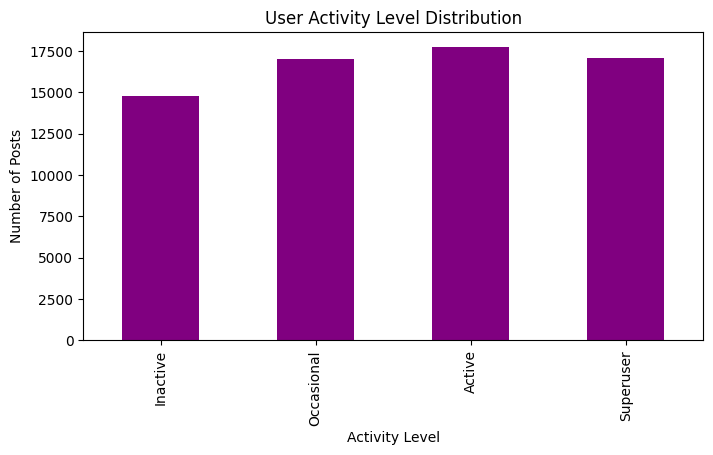

In [ ]:
import matplotlib.pyplot as plt

# User activity distribution
user_activity_counts = df_clean['user_activity_level'].value_counts().sort_index()
print("User Activity Distribution:\n", user_activity_counts)

# Country distribution
country_counts = df_clean['country_name'].value_counts().head(15)  # Top 15
print("\nTop 15 Countries:\n", country_counts)

# Membership type
guest_counts = df_clean['is_guest'].value_counts()
print("\nGuest vs Member Counts:\n", guest_counts)

# Forum category distribution
forum_counts = df_clean['forum_category'].value_counts()
print("\nForum Categories:\n", forum_counts)

# Tenure summary (for members)
print("\nUser Tenure (days) stats:\n", df_clean[~df_clean['is_guest']]['user_tenure_days'].describe())

# Visualizations (Optional)
plt.figure(figsize=(8,4))
user_activity_counts.plot(kind='bar', color='purple')
plt.title('User Activity Level Distribution')
plt.xlabel('Activity Level')
plt.ylabel('Number of Posts')
plt.show()


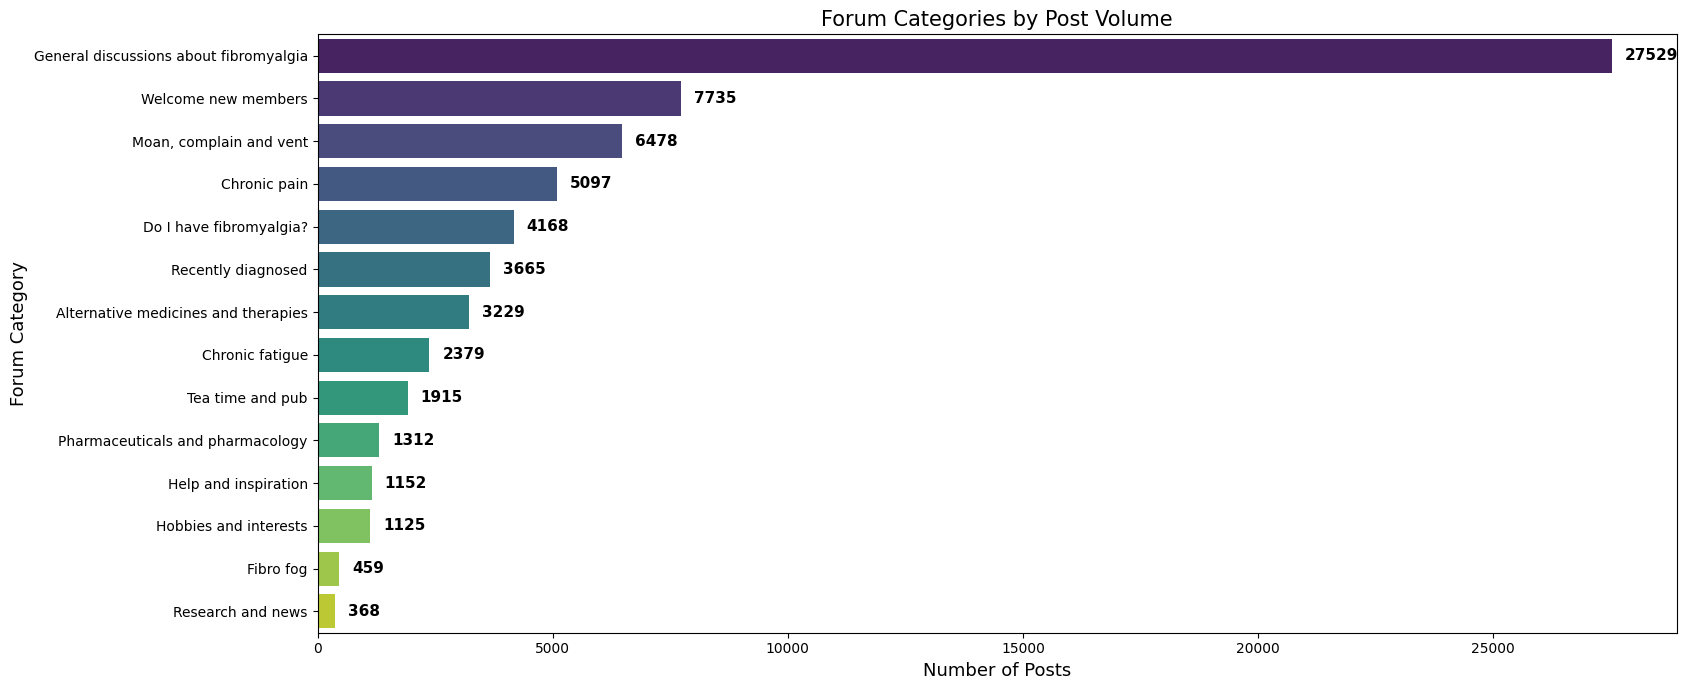

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the full category count DataFrame
forum_category_counts = df_clean['forum_category'].value_counts().reset_index()
forum_category_counts.columns = ['Forum Category', 'Number of Posts']

plt.figure(figsize=(17, 7))
ax = sns.barplot(
    x='Number of Posts',
    y='Forum Category',
    hue='Forum Category',
    data=forum_category_counts,
    palette='viridis',
    legend=False
)

plt.title("Forum Categories by Post Volume", fontsize=15)
plt.xlabel("Number of Posts", fontsize=13)
plt.ylabel("Forum Category", fontsize=13)

# Annotate each bar with the post count
for i, (count) in enumerate(forum_category_counts['Number of Posts']):
    ax.text(count + max(forum_category_counts['Number of Posts']) * 0.01, i,
            f'{int(count)}', va='center', fontsize=11, fontweight='bold', color='black')

plt.tight_layout()

plt.savefig('forum_category_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

A. Calculate Unique Users Per Forum Category

In [ ]:
category_stats = (
    df_clean.groupby('forum_category').agg(
        num_posts=('post_id', 'count'),
        num_users=('username', 'nunique')
    ).sort_values('num_posts', ascending=False)
)
category_stats['posts_per_user'] = category_stats['num_posts'] / category_stats['num_users']
print(category_stats)


                                        num_posts  num_users  posts_per_user
forum_category                                                              
General discussions about fibromyalgia      27529       3047        9.034788
Welcome new members                          7735       2312        3.345588
Moan, complain and vent                      6478        894        7.246085
Chronic pain                                 5097       1012        5.036561
Do I have fibromyalgia?                      4168        969        4.301342
Recently diagnosed                           3665        890        4.117978
Alternative medicines and therapies          3229        735        4.393197
Chronic fatigue                              2379        472        5.040254
Tea time and pub                             1915        184       10.407609
Pharmaceuticals and pharmacology             1312        436        3.009174
Help and inspiration                         1152        153        7.529412

B. Plot Posts & Unique Users by Category

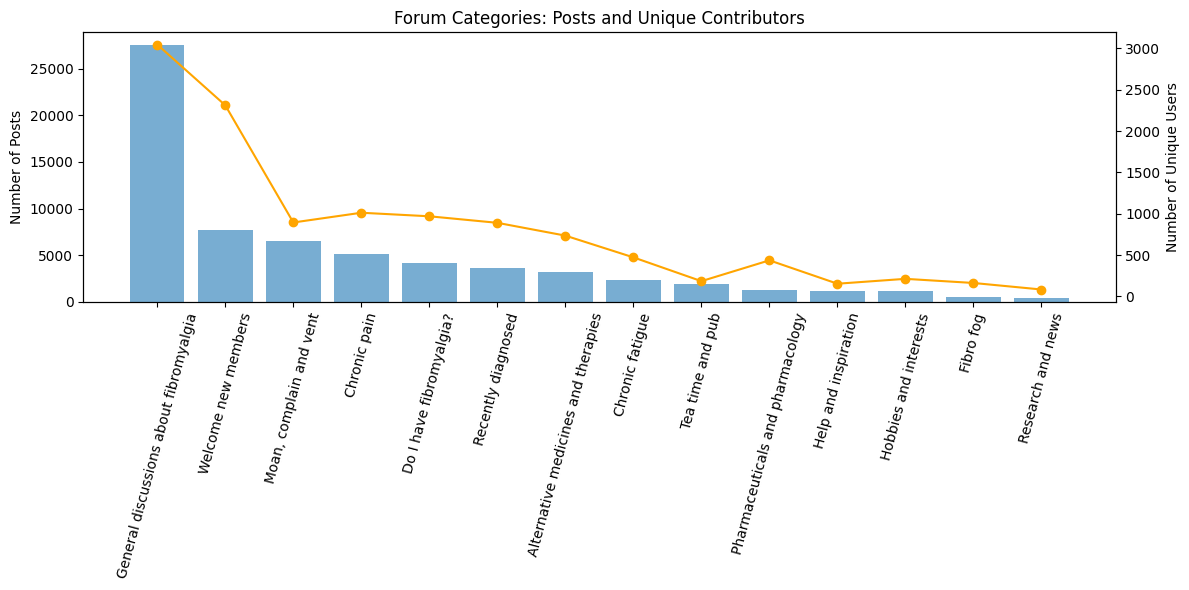

In [ ]:
import matplotlib.pyplot as plt

category_stats = category_stats.reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of posts
ax1.bar(category_stats['forum_category'], category_stats['num_posts'], alpha=0.6, label='Posts')
ax1.set_ylabel('Number of Posts')
ax1.tick_params(axis='x', rotation=75)

# Line plot for number of unique users
ax2 = ax1.twinx()
ax2.plot(category_stats['forum_category'], category_stats['num_users'], color='orange', marker='o', label='Unique Users')
ax2.set_ylabel('Number of Unique Users')

plt.title('Forum Categories: Posts and Unique Contributors')
fig.tight_layout()
plt.show()


/tmp/ipython-input-15-2762507943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['post_year'] = pd.to_datetime(df_top['timestamp_parsed'], errors='coerce').dt.year


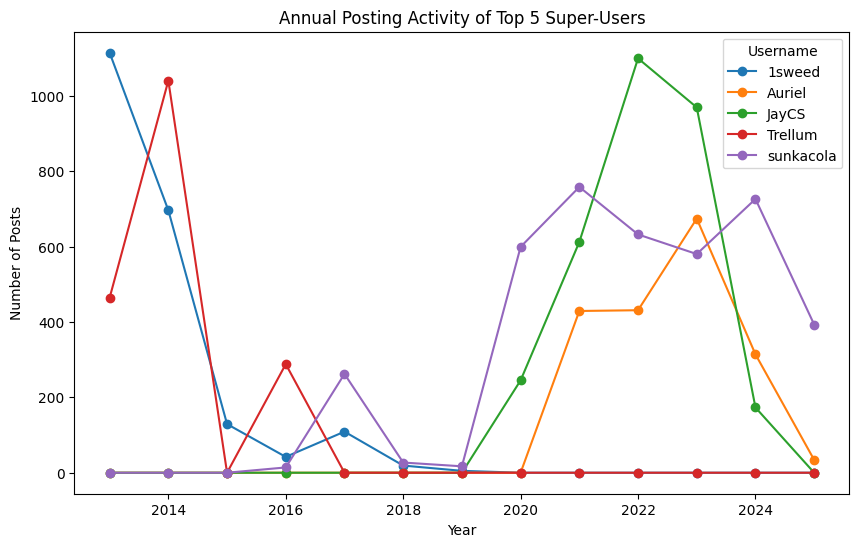

In [ ]:
top_users = df_clean['username'].value_counts().head(5).index
df_top = df_clean[df_clean['username'].isin(top_users)]
df_top['post_year'] = pd.to_datetime(df_top['timestamp_parsed'], errors='coerce').dt.year
pivot = df_top.pivot_table(index='post_year', columns='username', values='post_id', aggfunc='count').fillna(0)
pivot.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Annual Posting Activity of Top 5 Super-Users')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.legend(title='Username')
plt.show()


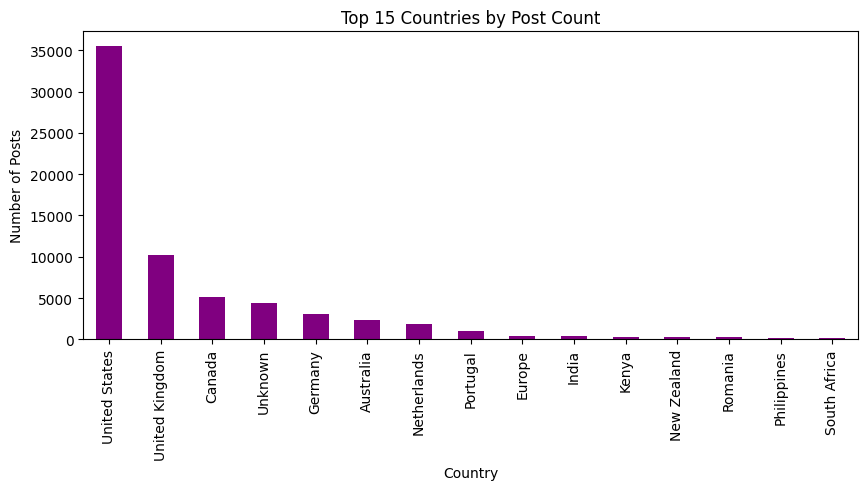

In [ ]:
plt.figure(figsize=(10,4))
country_counts.plot(kind='bar', color='purple')
plt.title('Top 15 Countries by Post Count')
plt.xlabel('Country')
plt.ylabel('Number of Posts')

plt.savefig('top_15_countries_by_post_count.png', dpi=300, bbox_inches='tight')
plt.show()

Threads per Forum Category:
 forum_category
General discussions about fibromyalgia    3264
Welcome new members                       1998
Moan, complain and vent                    645
Do I have fibromyalgia?                    514
Chronic pain                               434
Recently diagnosed                         424
Alternative medicines and therapies        358
Chronic fatigue                            201
Pharmaceuticals and pharmacology           139
Tea time and pub                            83
Help and inspiration                        81
Hobbies and interests                       63
Fibro fog                                   44
Research and news                           32
Name: thread_id, dtype: int64

Replies per Thread - Stats:
 count    8280.000000
mean        7.056643
std        15.054511
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max       776.000000
Name: thread_replies, dtype: float64


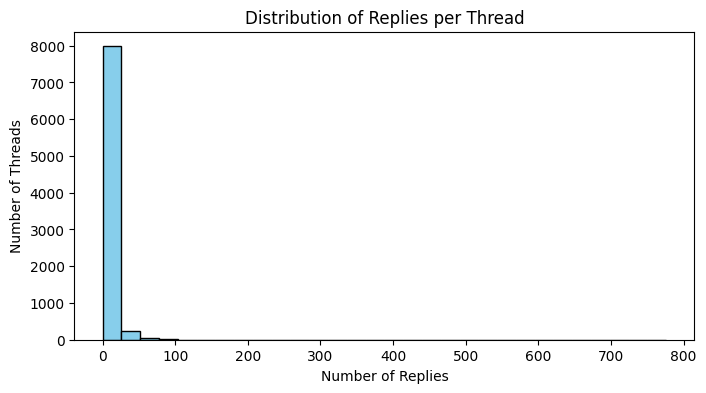


Top 10 Threads by Replies:
 thread_id
how-are-you-today.29484                            776
gday-new-here.29316                                471
gone-potty-plants-gardens-and-lawns.29497          440
good-day-to-you-all.21447                          291
memes-a-touch-of-humor-for-us-fibromites.29200     277
covid-19-vaccination-with-fm-cfs.28480             191
animals-and-guinea-pigs.29173                      177
just-need-to-vent-whine-complain-a-little.29304    143
bad-day.30284                                      136
muscle-twitching.28874                             123
Name: thread_replies, dtype: int64

Top 10 Threads by Views:
 thread_id
common-anxiety-symptoms.20828                            95000
good-day-to-you-all.21447                                79000
weakness-in-both-arms-and-legs-at-the-same-time.15615    77000
extreme-sensitivity-to-cold-air-blowing-on-me.23283      67000
sudden-severe-weakness-fatigue.5865                      57000
foot-pain-barely-walk.21

In [ ]:
import matplotlib.pyplot as plt

# 1. Threads per forum category
threads_per_category = df_clean.groupby('forum_category')['thread_id'].nunique().sort_values(ascending=False)
print("Threads per Forum Category:\n", threads_per_category)

# 2. Distribution of replies per thread
replies_per_thread = df_clean.groupby('thread_id')['thread_replies'].max()
print("\nReplies per Thread - Stats:\n", replies_per_thread.describe())

# Visualize thread depth
plt.figure(figsize=(8,4))
plt.hist(replies_per_thread, bins=30, color='skyblue', edgecolor='k')
plt.title('Distribution of Replies per Thread')
plt.xlabel('Number of Replies')
plt.ylabel('Number of Threads')
plt.show()

# 3. Thread "hotness" (top threads by replies/views)
threads_by_replies = replies_per_thread.sort_values(ascending=False).head(10)
threads_by_views = df_clean.groupby('thread_id')['thread_views'].max().sort_values(ascending=False).head(10)
print("\nTop 10 Threads by Replies:\n", threads_by_replies)
print("\nTop 10 Threads by Views:\n", threads_by_views)

# 4. Proportion of post types (starter vs reply)
post_type_counts = df_clean['post_type'].value_counts()
print("\nPost Type Counts:\n", post_type_counts)
print("Percent Conversation Starters:", 100 * post_type_counts.get('starter', 0) / post_type_counts.sum())

# 5. Average thread length (number of posts per thread)
posts_per_thread = df_clean.groupby('thread_id').size()
print("\nAverage Posts per Thread:", posts_per_thread.mean())

# 6. Users who start the most threads
starters = df_clean[df_clean['post_type'] == 'starter']
top_starters = starters['username'].value_counts().head(10)
print("\nUsers Who Started the Most Threads:\n", top_starters)

# 7. Threads with the most unique contributors
unique_users_per_thread = df_clean.groupby('thread_id')['username'].nunique().sort_values(ascending=False)
print("\nThreads with Most Unique Contributors:\n", unique_users_per_thread.head(10))


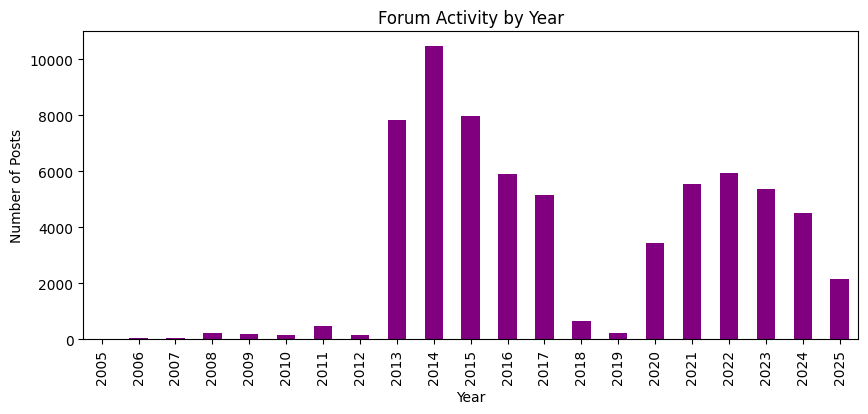

In [ ]:
import pandas as pd

# 8. Forum activity over time (annual trend)
df_clean['timestamp_parsed'] = pd.to_datetime(df_clean['timestamp_parsed'], errors='coerce')
df_clean['year'] = df_clean['timestamp_parsed'].dt.year
posts_per_year = df_clean.groupby('year').size()
plt.figure(figsize=(10,4))
posts_per_year.plot(kind='bar', color='purple')
plt.title('Forum Activity by Year')
plt.xlabel('Year')
plt.ylabel('Number of Posts')

plt.savefig('forum_activity_over_time_bar.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Top 30 Unigrams:
 [('pain', 50554), ('like', 35304), ('get', 34804), ('know', 25614), ('fibro', 25126), ('one', 24988), ('time', 23401), ('also', 22442), ('help', 22057), ('would', 21263), ('said', 21139), ('feel', 21062), ('much', 19685), ('good', 19167), ('really', 18428), ('think', 18285), ('things', 18247), ('day', 17848), ('take', 17298), ('back', 16681), ('people', 16666), ('even', 16339), ('fibromyalgia', 15491), ('well', 15443), ('could', 15243), ('years', 15186), ('go', 15079), ('find', 14609), ('work', 14004), ('doctor', 13892)]


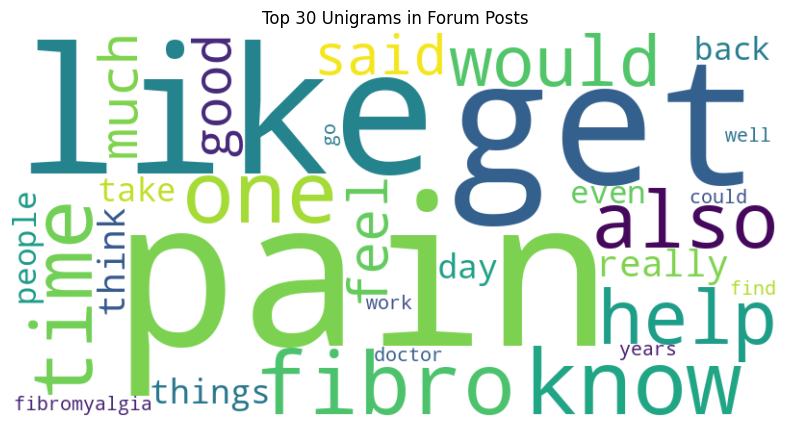

Top 20 Bigrams:
 [(('click', 'expand'), 12607), (('feel', 'like'), 3971), (('years', 'ago'), 2822), (('side', 'effects'), 2584), (('every', 'day'), 1974), (('welcome', 'forum'), 1968), (('anyone', 'else'), 1868), (('good', 'luck'), 1817), (('feel', 'better'), 1772), (('chronic', 'pain'), 1720), (('sounds', 'like'), 1647), (('take', 'care'), 1628), (('feels', 'like'), 1484), (('one', 'thing'), 1308), (('even', 'though'), 1289), (('one', 'day'), 1248), (('long', 'time'), 1232), (('brain', 'fog'), 1222), (('something', 'else'), 1172), (('make', 'sure'), 1155)]
Top 10 Trigrams:
 [(('click', 'expand', 'hi'), 772), (('let', 'us', 'know'), 607), (('advice', 'managing', 'fibromyalgia'), 379), (('click', 'expand', 'thank'), 356), (('managing', 'fibromyalgia', 'especially'), 351), (('fibromyalgia', 'especially', 'newcomers'), 350), (('done', 'lot', 'research'), 336), (('fibromyalgia', 'several', 'years'), 333), (('research', 'trial', 'error'), 323), (('years', 'done', 'lot'), 321)]

Core Symptom

In [ ]:


# # Download stopwords and punkt if not done
# try:
#     nltk.data.find('tokenizers/punkt')
# except nltk.downloader.DownloadError:
#     nltk.download('punkt')

# try:
#     nltk.data.find('corpora/stopwords')
# except nltk.downloader.DownloadError:
#     nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and filter stopwords for unigram analysis
all_words = []
for text in df_clean['content_clean'].dropna():
    tokens = nltk.word_tokenize(str(text).lower())
    all_words += [w for w in tokens if w.isalpha() and w not in stop_words]

# Unigram frequencies
unigram_freq = Counter(all_words).most_common(30)
print("Top 30 Unigrams:\n", unigram_freq)

# Wordcloud for unigrams
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(unigram_freq))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 30 Unigrams in Forum Posts')
plt.show()

# Bigrams
from nltk.util import ngrams
bigram_list = []
for text in df_clean['content_clean'].dropna():
    tokens = [w for w in nltk.word_tokenize(str(text).lower()) if w.isalpha() and w not in stop_words]
    bigram_list += list(ngrams(tokens, 2))
bigram_freq = Counter(bigram_list).most_common(20)
print("Top 20 Bigrams:\n", bigram_freq)

# Trigrams
trigram_list = []
for text in df_clean['content_clean'].dropna():
    tokens = [w for w in nltk.word_tokenize(str(text).lower()) if w.isalpha() and w not in stop_words]
    trigram_list += list(ngrams(tokens, 3))
trigram_freq = Counter(trigram_list).most_common(10)
print("Top 10 Trigrams:\n", trigram_freq)

# (Optional) Symptom and treatment mention frequency
symptoms = ['pain', 'fatigue', 'sleep', 'anxiety', 'stiffness', 'headache', 'memory', 'depression', 'tired', 'flare', 'medication', 'doctor', 'exercise', 'cbd', 'gabapentin', 'lyrica']
symptom_counts = {sym: all_words.count(sym) for sym in symptoms}
print("\nCore Symptom/Treatment Mentions:")
for k,v in symptom_counts.items():
    print(f"{k}: {v}")

In [ ]:
FEW_SHOT_EXAMPLES = [
    {
        "post": "Does anyone have tips for dealing with fibro fog? I really struggle with focus.",
        "label": "Help-Seeking"
    },
    {
        "post": "Is it normal to feel so tired even after sleeping all night? Any advice?",
        "label": "Help-Seeking"
    },
    {
        "post": "Welcome to the group! Make sure you stay hydrated—it helps a lot.",
        "label": "Support-Offering"
    },
    {
        "post": "Hang in there, you’re not alone. It does get better.",
        "label": "Support-Offering"
    },
    {
        "post": "I was diagnosed last summer, just checking in to say hi.",
        "label": "Neutral"
    },
    {
        "post": "My doctor changed my medication last month.",
        "label": "Neutral"
    }
]

def make_few_shot_prompt(post_text):
    instructions = """You are analyzing posts from an online fibromyalgia support forum.
For each post, assign one of these three labels:
- Help-Seeking: The user is asking for advice, support, or information.
- Support-Offering: The user is providing advice, encouragement, or support.
- Neutral: The post is neither clearly seeking nor offering support.

Examples:
"""
    for ex in FEW_SHOT_EXAMPLES:
        instructions += f'Post: "{ex["post"]}"\nLabel: {ex["label"]}\n\n'
    instructions += f'Now, label this post:\nPost: "{post_text}"\nLabel:'
    return instructions


In [ ]:
import openai
from google.colab import userdata

print("--- Securely Setting Up OpenAI API Key ---")

# This is the secure way to handle your API key in Colab
# It will create a prompt for you to paste your key into.
# The key will be stored as a Colab Secret.
try:
    openai_api_key = userdata.get('OPENAI_API_KEY')
    openai.api_key = openai_api_key
    print("✅ OpenAI API key successfully retrieved from Colab Secrets.")
except Exception as e:
    print("⚠️ OpenAI API key not found in Colab Secrets.")
    print("   Please add it by clicking on the '🔑' icon in the left sidebar,")
    print("   then click '+ New secret', name it 'OPENAI_API_KEY', and paste your key.")

--- Securely Setting Up OpenAI API Key ---
✅ OpenAI API key successfully retrieved from Colab Secrets.


In [ ]:
import pandas as pd

# Assume df_clean is your cleaned DataFrame
category_counts = df_clean['forum_category'].value_counts()
n_categories = len(category_counts)

# Desired total sample size (e.g., 2030)
total_sample = 2030

# Evenly divide samples across categories (rounded, but weighted if some are much smaller)
per_cat = max(1, total_sample // n_categories)

# Take min(per_cat, available) from each category
samples = []
for cat in category_counts.index:
    cat_df = df_clean[df_clean['forum_category'] == cat]
    n_cat_sample = min(per_cat, len(cat_df))
    samples.append(cat_df.sample(n_cat_sample, random_state=42))
df_sample = pd.concat(samples).sample(frac=1, random_state=99).reset_index(drop=True)

print("Sample size:", len(df_sample))
print(df_sample['forum_category'].value_counts())


Sample size: 2030
forum_category
Recently diagnosed                        145
Welcome new members                       145
Chronic pain                              145
Hobbies and interests                     145
General discussions about fibromyalgia    145
Do I have fibromyalgia?                   145
Tea time and pub                          145
Research and news                         145
Alternative medicines and therapies       145
Fibro fog                                 145
Help and inspiration                      145
Moan, complain and vent                   145
Chronic fatigue                           145
Pharmaceuticals and pharmacology          145
Name: count, dtype: int64


In [ ]:
df_sample.to_csv('fibro_forum_llm_sample.csv', index=False)


In [ ]:
# import openai
# import pandas as pd
# import time

# # openai.api_key = "YOUR_OPENAI_API_KEY"

# # ... include your FEW_SHOT_EXAMPLES and make_few_shot_prompt here ...

# # Sample your posts to label
# posts_to_label = df['content'].sample(50, random_state=1)  # Or use all posts, or super-users, etc.

# def get_llm_label(post):
#     prompt = make_few_shot_prompt(post)
#     client = openai.OpenAI(api_key=openai.api_key)
#     response = client.chat.completions.create(
#         model="gpt-3.5-turbo",  # or "gpt-4"
#         messages=[{"role": "user", "content": prompt}],
#         temperature=0
#     )
#     # Clean label
#     # label = response['choices'][0]['message']['content'].strip().split('\n')[0]
#     label = response.choices[0].message.content.strip().split('\n')[0]
#     return label

# # Loop through posts and label them
# labels = []
# for post in posts_to_label:
#     try:
#         labels.append(get_llm_label(post))
#     except Exception as e:
#         print(e)
#         labels.append("ERROR")
#     time.sleep(1.5)  # Rate limit

# # Save or merge labels with your data
# labeled_df = posts_to_label.reset_index(drop=True).to_frame()
# labeled_df['llm_label'] = labels
# labeled_df.to_csv('llm_labeled_posts.csv', index=False)


In [ ]:
def make_zero_shot_prompt(post_text):
    return (
        "Classify the following forum post as Help-Seeking, Support-Offering, or Neutral, according to these definitions:\n"
        "- Help-Seeking: The author is asking for help, advice, support, or information.\n"
        "- Support-Offering: The author is giving advice, encouragement, reassurance, or practical suggestions to others.\n"
        "- Neutral: The post does not clearly fit either category (for example, it may be a simple update, casual comment, or does not contain a request for help or an offer of support).\n\n"
        "Please respond with only one of these labels.\n\n"
        f"Post: \"{post_text}\"\nLabel:"
    )


In [ ]:
import openai
import pandas as pd
import time


# Load your full dataset
# df = pd.read_csv('fibromyalgia_forum_cleaned.csv')
contents = df_sample['content_clean']

# -- Insert your FEW_SHOT_EXAMPLES and make_few_shot_prompt function here --

labels = []
for idx, post in enumerate(contents):
    try:
        # prompt = make_few_shot_prompt(post)
        prompt = make_zero_shot_prompt(post)
        client = openai.OpenAI(api_key=openai.api_key)
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",  # or "gpt-4"
            messages=[{"role": "user", "content": prompt}],
            temperature=0
        )
        label = response.choices[0].message.content.strip().split('\n')[0]
        labels.append(label)
        print(f"Post {idx+1}/{len(contents)} labeled as {label}")
    except Exception as e:
        print(f"Error on post {idx+1}: {e}")
        labels.append("ERROR")
    time.sleep(1.2)  # Pause to avoid hitting rate limits

df_sample['support_role_2'] = labels
df_sample.to_csv('fibro_sample_zero_shot_llm_labeled.csv', index=False)


Post 1/2030 labeled as Help-Seeking
Post 2/2030 labeled as Neutral
Post 3/2030 labeled as Support-Offering
Post 4/2030 labeled as Support-Offering
Post 5/2030 labeled as Neutral
Post 6/2030 labeled as Support-Offering
Post 7/2030 labeled as Help-Seeking
Post 8/2030 labeled as Support-Offering
Post 9/2030 labeled as Support-Offering
Post 10/2030 labeled as Neutral
Post 11/2030 labeled as Neutral
Post 12/2030 labeled as Help-Seeking
Post 13/2030 labeled as Neutral
Post 14/2030 labeled as Neutral
Post 15/2030 labeled as Support-Offering
Post 16/2030 labeled as Support-Offering
Post 17/2030 labeled as Support-Offering
Post 18/2030 labeled as Neutral
Post 19/2030 labeled as Help-Seeking
Post 20/2030 labeled as Support-Offering
Post 21/2030 labeled as Support-Offering
Post 22/2030 labeled as Neutral
Post 23/2030 labeled as Support-Offering
Post 24/2030 labeled as Neutral
Post 25/2030 labeled as Support-Offering
Post 26/2030 labeled as Support-Offering
Post 27/2030 labeled as Neutral
Post 28/

In [ ]:
df_sample.to_csv('fibro_sample_zero_shot_llm_labeled.csv', index=False)

In [ ]:
from google.colab import files
files.download('fibro_sample_zero_shot_llm_labeled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_clean.to_csv('fibro_forum_clean.csv', index=False)

In [ ]:
df_sample.to_csv('fibro_sample_llm_labeled.csv', index=False)

In [ ]:
df_sample = pd.read_csv('fibro_zero_shot_llm_labeled.csv')

In [ ]:
df_sample.shape

(66611, 33)

In [ ]:
df_clean = pd.read_csv('fibro_forum_clean.csv')

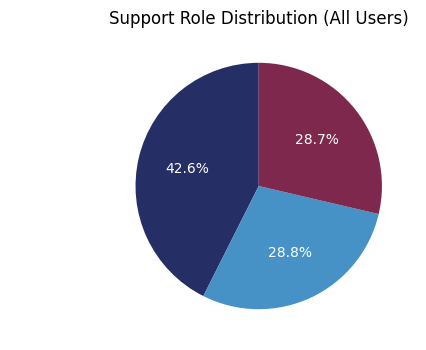

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#252E65', '#4692C7', '#7E284E']

# Remove errors/missing if needed
df_sample_clean = df_sample[df_sample['support_role'].isin(['Help-Seeking', 'Support-Offering', 'Neutral'])]

role_counts = df_sample_clean['support_role'].value_counts(normalize=True)
plt.figure(figsize=(6,4))
role_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ylabel='', colors=colors, textprops={'color':"w"})
plt.title('Support Role Distribution (All Users)')
plt.show()

In [ ]:
df_sample_clean.shape

(65357, 34)

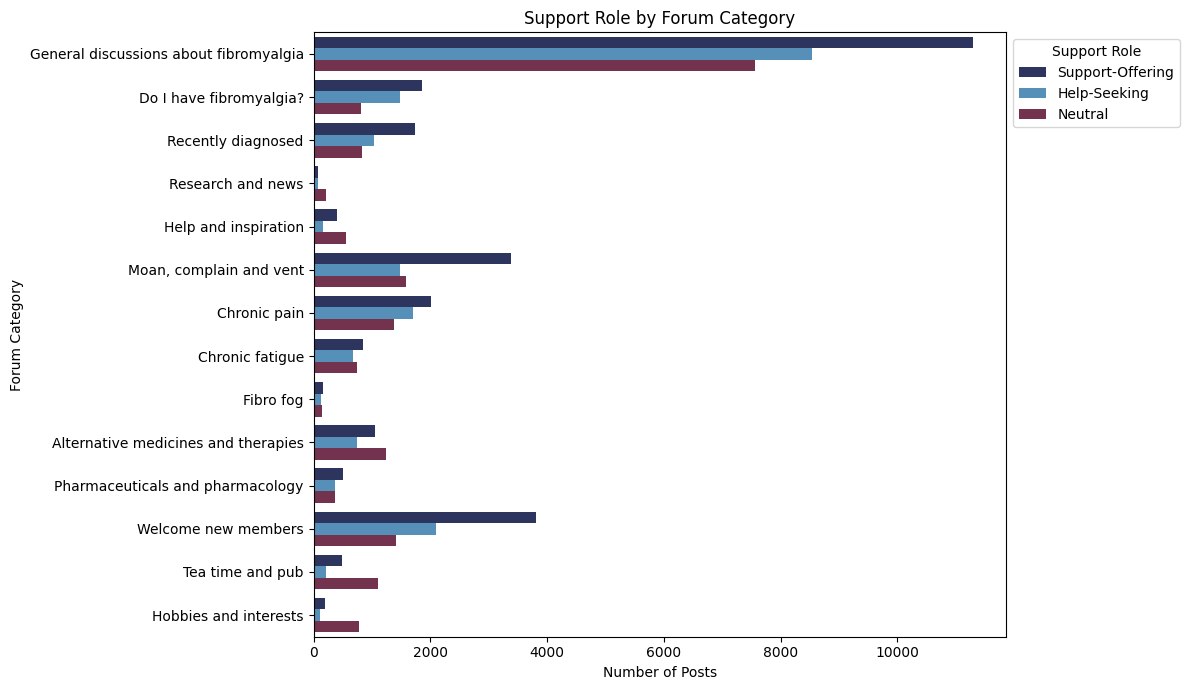

In [ ]:
colors = ['#252E65', '#4692C7', '#7E284E']

plt.figure(figsize=(12,7))
ax = sns.countplot(
    y='forum_category',
    hue='support_role',
    data=df_sample_clean,
    palette=colors
)
plt.title('Support Role by Forum Category')
plt.xlabel('Number of Posts')
plt.ylabel('Forum Category')
plt.legend(title='Support Role', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [ ]:
# df_sample_clean = df_sample_clean[df_sample_clean['forum_category'] != "Tea time and pub"]
# # display(df)
# df_sample_clean.shape

/tmp/ipython-input-3352745282.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_clean['is_super_user'] = df_sample_clean['username'].isin(super_users)


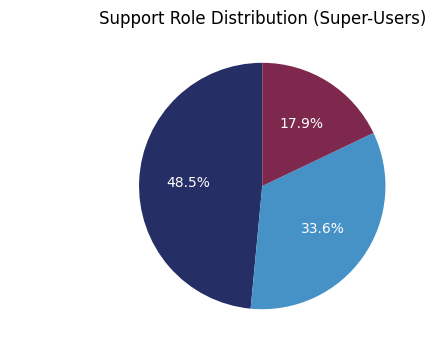

In [ ]:
# Identify top 1% users by post count in the sample
user_counts = df_sample_clean['username'].value_counts()
n_super = max(1, int(0.01 * user_counts.size))
super_users = user_counts.head(n_super).index.tolist()
df_sample_clean['is_super_user'] = df_sample_clean['username'].isin(super_users)

colors = ['#252E65', '#4692C7', '#7E284E']

# Pie chart: support roles for super-users
super_user_posts = df_sample_clean[df_sample_clean['is_super_user']]
su_role_counts = super_user_posts['support_role'].value_counts(normalize=True)
plt.figure(figsize=(6,4))
su_role_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ylabel='', colors=colors, textprops={'color':"w"})
plt.title('Support Role Distribution (Super-Users)')
plt.show()

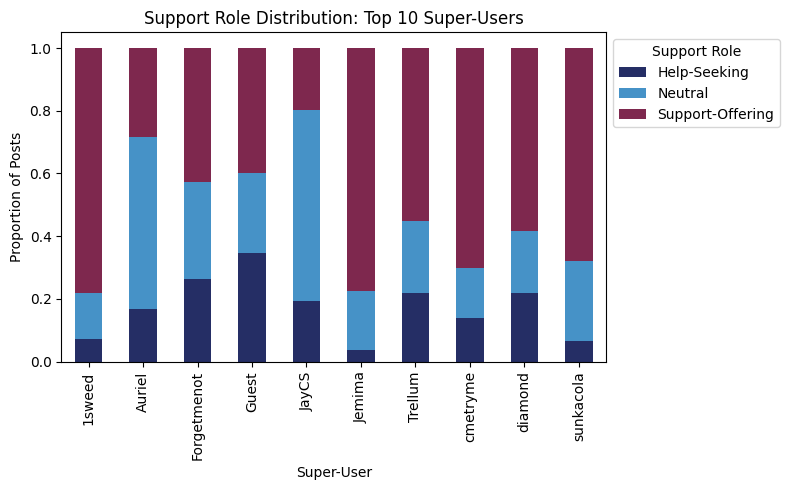

In [ ]:


# Bar plot: support roles for top 10 super-users (by count)
top10 = user_counts.head(10).index.tolist()
top10_data = df_sample_clean[df_sample_clean['username'].isin(top10)]
pivot = pd.crosstab(top10_data['username'], top10_data['support_role'], normalize='index')
pivot.plot(kind='bar', stacked=True, figsize=(8,5), color=colors)
plt.ylabel('Proportion of Posts')
plt.xlabel('Super-User')
plt.title('Support Role Distribution: Top 10 Super-Users')
plt.legend(title='Support Role', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

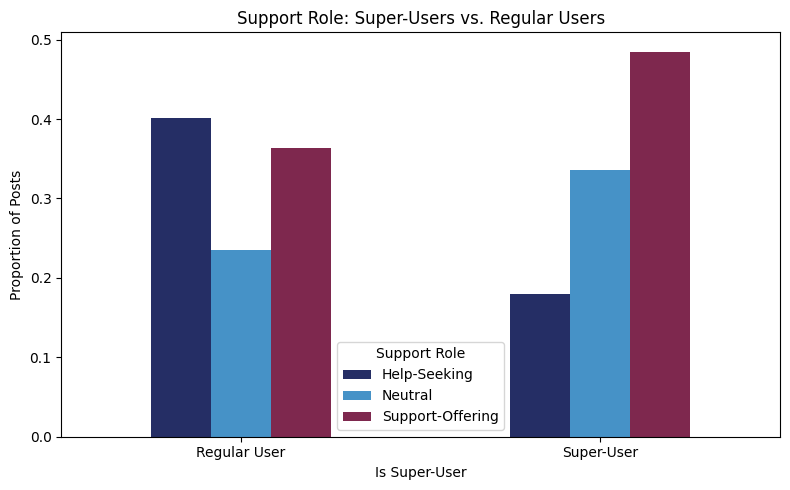

In [ ]:
colors = ['#252E65', '#4692C7', '#7E284E']

role_counts_all = df_sample_clean.groupby('is_super_user')['support_role'].value_counts(normalize=True).unstack()
role_counts_all.plot(kind='bar', figsize=(8,5), color=colors)
plt.xlabel('Is Super-User')
plt.ylabel('Proportion of Posts')
plt.title('Support Role: Super-Users vs. Regular Users')
plt.xticks([0,1], ['Regular User', 'Super-User'], rotation=0)
plt.legend(title='Support Role')
plt.tight_layout()
plt.show()


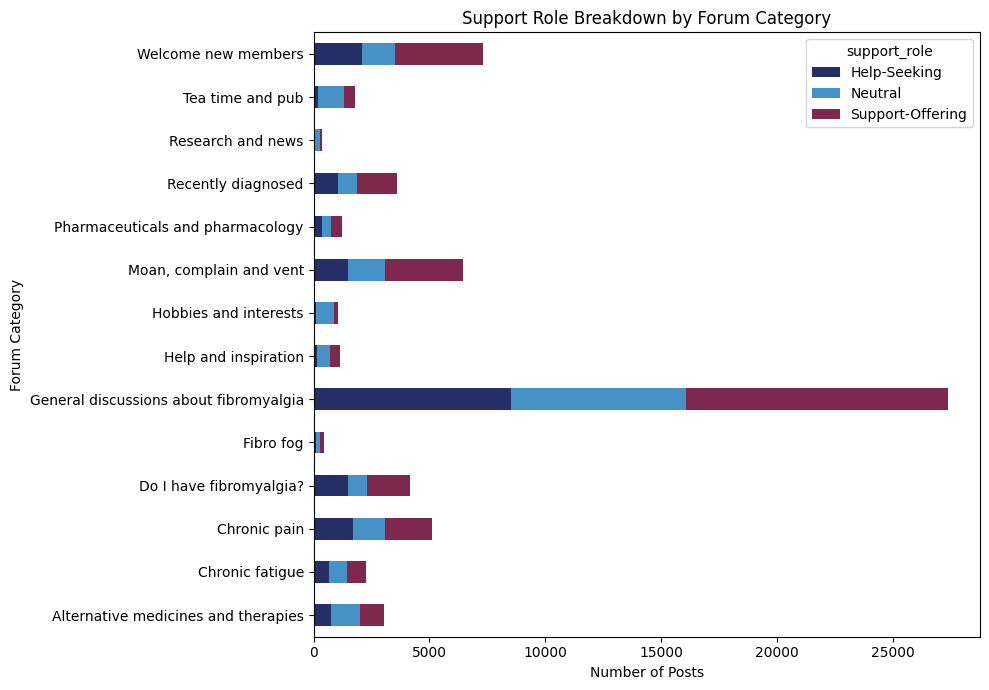

In [ ]:
colors = ['#252E65', '#4692C7', '#7E284E']
cat_role_pivot = pd.crosstab(df_sample_clean['forum_category'], df_sample_clean['support_role'])
cat_role_pivot.plot(kind='barh', stacked=True, figsize=(10,7), color=colors)
plt.xlabel('Number of Posts')
plt.ylabel('Forum Category')
plt.title('Support Role Breakdown by Forum Category')
plt.tight_layout()
plt.show()


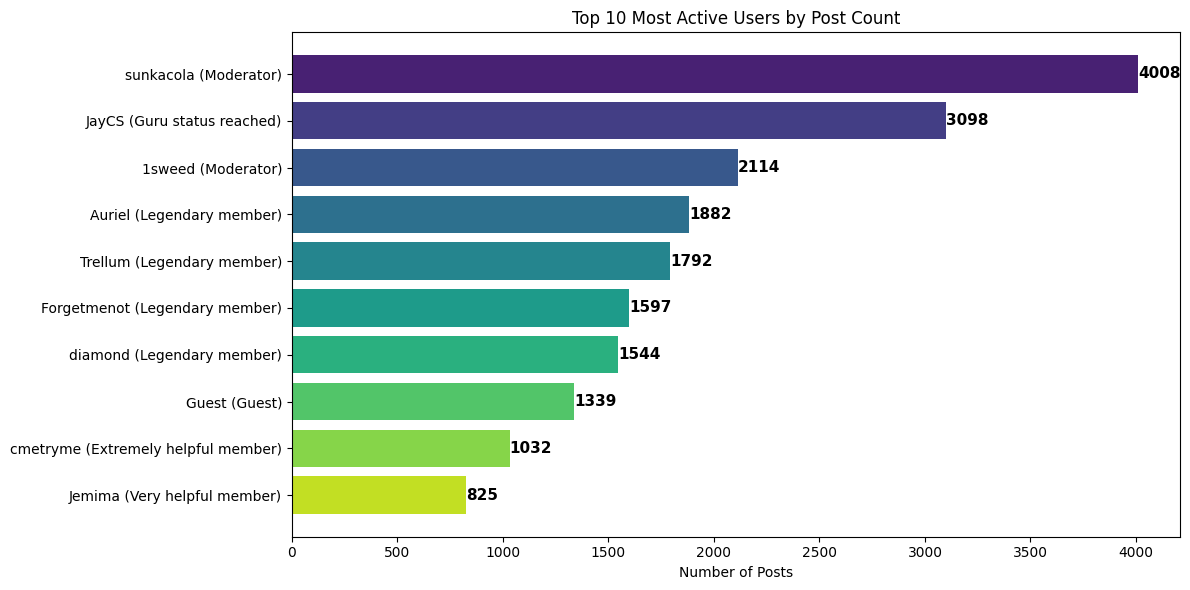

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 users by post count
top10_counts = df_clean['username'].value_counts().head(10)
top10_users = top10_counts.index.tolist()

# Get their titles
user_titles = (
    df_clean[df_clean['username'].isin(top10_users)]
    .groupby('username')['user_title']
    .agg(lambda x: x.value_counts().index[0])  # Most frequent title for each user
)

# Prepare a DataFrame for plotting
plot_df = pd.DataFrame({
    'Username': top10_users,
    'User Title': [user_titles[u] for u in top10_users],
    'Number of Posts': [top10_counts[u] for u in top10_users]
})

# Combine username and title for y-axis labels
plot_df['Label'] = plot_df['Username'] + ' (' + plot_df['User Title'] + ')'

plt.figure(figsize=(12,6))
bars = plt.barh(plot_df['Label'], plot_df['Number of Posts'], color=sns.color_palette("viridis", 10))
plt.xlabel('Number of Posts')
plt.title('Top 10 Most Active Users by Post Count')

# Annotate post counts on bars
for bar, count in zip(bars, plot_df['Number of Posts']):
    plt.text(count + 1, bar.get_y() + bar.get_height()/2, str(count), va='center', fontsize=11, fontweight='bold')

plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()

plt.savefig('top_10_most_active_user_bar.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
if 'is_super_thread' in df_sample_clean.columns:
    thread_role = df_sample_clean.groupby('is_super_thread')['support_role'].value_counts(normalize=True).unstack()
    thread_role.plot(kind='bar', figsize=(8,5))
    plt.xlabel('Is Super-Thread')
    plt.ylabel('Proportion of Posts')
    plt.title('Support Role: Super-Threads vs. Regular Threads')
    plt.xticks([0,1], ['Regular Thread', 'Super-Thread'], rotation=0)
    plt.legend(title='Support Role')
    plt.tight_layout()
    plt.show()


In [ ]:
# import pandas as pd

# pd.set_option('display.max_colwidth', 200)
# df_clean[['post_id', 'content', 'content_clean']].head(50)

In [ ]:
sample_table = df_sample[['content', 'content_clean']].sample(5, random_state=42).reset_index(drop=True)
sample_table.columns = ['Original Content', 'Cleaned Content']
from tabulate import tabulate
print(tabulate(sample_table, headers='keys', tablefmt='psql', showindex=False))


+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# # If you labeled ALL posts:
# df_clean.loc[:, 'support_role'] = df_sample['llm_label']

# # If you labeled only a subset, do a merge (assuming 'post_id' is available)
# # df = df_clean.merge(labeled_df[['post_id', 'llm_label']], on='post_id', how='left')
# # df['support_role'] = df['llm_label']

In [ ]:
df_clean.columns

Index(['thread_id', 'thread_title', 'thread_url', 'forum_category',
       'thread_views', 'thread_replies', 'total_posts', 'post_type',
       'post_index', 'post_id', 'username', 'user_title', 'timestamp',
       'content', 'content_length', 'user_joined', 'user_messages',
       'user_country', 'user_state', 'has_quotes', 'quote_count', 'all_quotes',
       'quoted_users', 'timestamp_parsed', 'country_name', 'is_guest',
       'user_tenure_days', 'content_clean', 'timestamp_parsed_dt', 'post_year',
       'post_month', 'year_joined', 'post_length_bucket',
       'user_activity_level', 'thread_activity_level', 'tokens',
       'processed_text'],
      dtype='object')

In [ ]:
# Define super-users as top 1% posters
user_post_counts = df['username'].value_counts()
super_user_threshold = user_post_counts.quantile(0.99)
super_users = set(user_post_counts[user_post_counts >= super_user_threshold].index)
df_clean.loc[:, 'is_super_user'] = df['username'].isin(super_users)

In [ ]:
# Calculate reply counts
thread_reply_counts = df_clean.groupby('thread_id')['post_id'].count()
super_thread_cutoff = thread_reply_counts.quantile(0.99)
super_thread_ids = set(thread_reply_counts[thread_reply_counts >= super_thread_cutoff].index)
df['is_super_thread'] = df['thread_id'].isin(super_thread_ids)


/tmp/ipython-input-27-37693494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_super_thread'] = df['thread_id'].isin(super_thread_ids)


In [ ]:
role_counts_thread = df_clean.groupby('is_super_thread')['support_role'].value_counts(normalize=True).unstack()
role_counts_thread.plot(kind='bar', figsize=(8,5))
plt.xlabel('Is Super-Thread')
plt.ylabel('Proportion of Posts')
plt.title('Support Role Distribution: Super-Threads vs. Regular Threads')
plt.xticks([0,1], ['Regular Thread', 'Super-Thread'], rotation=0)
plt.legend(title='Support Role')
plt.tight_layout()
plt.show()


KeyError: 'is_super_thread'

In [ ]:

user_post_counts = df['username'].value_counts()
super_user_threshold = user_post_counts.quantile(0.99)
super_users_list = user_post_counts[user_post_counts >= super_user_threshold].index.tolist()
print(super_users_list)


['sunkacola', 'JayCS', '1sweed', 'Auriel', 'Trellum', 'Forgetmenot', 'diamond', 'Guest', 'cmetryme', 'Jemima', 'cookiebaker', 'SBee', 'moe1959', 'Badger', 'Tipnatee N', 'Harpy', 'JamieMarc', 'DK_engineer', 'BlueBells', 'mariposa', 'sweetkamie20', 'terbaer', 'johnsalmon', 'Loftpat', 'twiztc', 'Eyesup', 'vickythecat', 'Ruralchick', 'hope23', 'nascarmike', 'cinderr', 'Siderea', 'Lou38', 'fimi', 'SulaBlue', 'TipBill', 'Cheryl Ann', 'Lana', 'remnant', 'medicmurphy', 'Sagey', 'Creola17', 'katydid', 'rollinloud', 'sureimsore', 'jaminhealth', 'links56', 'Affinity', 'oportosanto', 'sjbrown', 'Dooi', 'Rainbow', 'Takedon', 'trayne91', 'kmpisces', 'Marvis', 'Janet L']


In [ ]:
print("Super-users:", super_users_list)
print("Super-user posts shape:", super_user_posts.shape)
print("Support role counts:", super_user_posts['support_role'].value_counts(dropna=False))


Super-users: ['sunkacola', 'JayCS', '1sweed', 'Auriel', 'Trellum', 'Forgetmenot', 'diamond', 'Guest', 'cmetryme', 'Jemima', 'cookiebaker', 'SBee', 'moe1959', 'Badger', 'Tipnatee N', 'Harpy', 'JamieMarc', 'DK_engineer', 'BlueBells', 'mariposa', 'sweetkamie20', 'terbaer', 'johnsalmon', 'Loftpat', 'twiztc', 'Eyesup', 'vickythecat', 'Ruralchick', 'hope23', 'nascarmike', 'cinderr', 'Siderea', 'Lou38', 'fimi', 'SulaBlue', 'TipBill', 'Cheryl Ann', 'Lana', 'remnant', 'medicmurphy', 'Sagey', 'Creola17', 'katydid', 'rollinloud', 'sureimsore', 'jaminhealth', 'links56', 'Affinity', 'oportosanto', 'sjbrown', 'Dooi', 'Rainbow', 'Takedon', 'trayne91', 'kmpisces', 'Marvis', 'Janet L']
Super-user posts shape: (0, 30)
Support role counts: Series([], Name: count, dtype: int64)


In [ ]:
# df_clean[['content', 'content_clean']].head(50)

In [ ]:
# import pandas as pd

# # pd.set_option('display.max_colwidth', None)
# df_clean[['content', 'content_clean']].head(50)

In [ ]:
# extended list of English stopwords

stopwords_extended = [
"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about",
 "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually",
 "ad", "added", "adj", "ae", "af", "after", "afterwards",
 "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost",
 "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst",
 "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone",
 "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear",
 "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't",
 "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au",
 "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1",
 "b2", "b3", "ba", "bc", "bd", "be", "became", "because", "become", "becomes",
 "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins",
 "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between",
 "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br",
 "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca",
 "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce",
 "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly",
 "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently",
 "consider", "considering", "contain", "containing", "contains", "corresponding",
 "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's",
 "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de",
 "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't",
 "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't",
 "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3",
 "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either",
 "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough",
 "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu",
 "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex",
 "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi",
 "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl",
 "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth",
 "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further",
 "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give",
 "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten",
 "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly",
 "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd",
 "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres",
 "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself",
 "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr",
 "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid",
 "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm",
 "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed",
 "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead",
 "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it",
 "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj",
 "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know",
 "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter",
 "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's",
 "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look",
 "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly",
 "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile",
 "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml",
 "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu",
 "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely",
 "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn",
 "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine",
 "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor",
 "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt",
 "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often",
 "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one",
 "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others",
 "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over",
 "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount",
 "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per",
 "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po",
 "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present",
 "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt",
 "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran",
 "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref",
 "refs", "regarding", "regardless", "regards", "related", "relatively",
 "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn",
 "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say",
 "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem",
 "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously",
 "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's",
 "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side",
 "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl",
 "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something",
 "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically",
 "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly",
 "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure",
 "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td",
 "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that",
 "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves",
 "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein",
 "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've",
 "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv",
 "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though",
 "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus",
 "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top",
 "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying",
 "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d",
 "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike",
 "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used",
 "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va",
 "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol",
 "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was",
 "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll",
 "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what",
 "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's",
 "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon",
 "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever",
 "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi",
 "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder",
 "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www",
 "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv",
 "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your",
 "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt",
 "z", "zero", "zi", "zz"]

In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords

# Download if you haven't already
nltk.download('stopwords')
standard_stopwords = set(stopwords.words('english'))
additional_stopwords = [
    # Common chit-chat
    "reply", "hi", "hello", "welcome", "take", "care", "hope", "Hi",
    "way", "really", "lot", "never", "know", "free", "someone", "else",
    "group", "wish", "could", "idea", "day", "year", "ago", "see", "hear", "glad",
    "feel", "like", "search", "engine", 'lol', 'jaycs', 'said', 'expand', 'sunkacola',
    # Add more based on your bigram/junk output
    "make", "get", "would", "say", "see", "might", "try", "think",
    "link", "thread", "delete", "email", "click", "moderator","mon",

        # Generic verbs and chit-chat
    "like", "know", "think", "say", "use", "get", "make", "try", "want", "need",
    "really", "good", "bad", "sure", "right", "come", "look", "work", "new", "read", "tell", "ask",
    "hope", "start", "lot", "thing", "year", "week", "month", "day", "life", "long", "hard", "see",
    "helps", "things",

    # Social/forum/communication
    "thank", "thanks", "people", "post", "forum", "rule", "message", "member", "link", "quote", "spam",
    "email", "topic", "website", "edit", "user", "link", "button", "profile", "moderator", "new", "members"
]

# full_stopwords = standard_stopwords | set(additional_stopwords) | set(stopwords_extended)
full_stopwords = list(standard_stopwords | set(stopwords_extended) | set(additional_stopwords))

# full_stopwords = list(standard_stopwords | set(additional_stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(standard_stopwords)

{'should', 'than', 'as', 'after', 'can', 'weren', 'did', 'their', 'myself', 'to', "you've", 'him', 'hadn', "weren't", 'up', "mustn't", 'does', 'here', "don't", 'm', "i'd", 's', 've', "he'll", 'themselves', "i'll", "shouldn't", "doesn't", "you'd", 'but', 'hers', 'by', "it'll", 'because', 'hasn', 'am', 'me', 'against', 'don', 'shouldn', 'its', 'just', 'on', 'this', 'couldn', "isn't", 'mightn', 'some', 'a', 'such', 'at', 'were', 'out', 'doing', "we'll", "she's", 'with', "couldn't", 'too', 'both', 'from', 'ours', 'is', 'where', 'isn', "shan't", "i'm", 'her', 'how', 'while', 'won', 'that', 'had', "he'd", "it'd", "he's", "that'll", 'd', 'herself', 'are', "we'd", 'do', 'no', "they're", "hadn't", 'same', "you'll", "wouldn't", 'down', "they'll", 'when', "she'd", 'ain', 'doesn', "they've", 'few', 'into', 'each', 'theirs', 'wouldn', 'then', 'i', 'didn', 'it', 'been', 'wasn', 'itself', 'so', 'an', "it's", 'his', 'until', "wasn't", 'yourself', 'or', 'under', "didn't", 'again', 'what', 'why', 'be', 

In [ ]:


# Load spaCy model for lemmatization (use "en_core_web_sm" or "en_core_web_md")
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in full_stopwords and len(token) > 2]
    return tokens

# Apply to your cleaned post content (may take a few minutes for large datasets)
df_clean['tokens'] = df_clean['content_clean'].apply(preprocess_text)
df_clean['processed_text'] = df_clean['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
# df_clean.to_csv('fibro_forum_preprocessed.csv', index=False)
df_clean = pd.read_csv('fibro_forum_preprocessed.csv')

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['mon'] not in stop_words.
  warnings.warn(


Top 20 unigrams: {'back': np.int64(15379), 'bit': np.int64(5632), 'body': np.int64(10078), 'days': np.int64(10030), 'diagnosed': np.int64(6949), 'doctor': np.int64(12778), 'doctors': np.int64(5796), 'feeling': np.int64(7029), 'fibro': np.int64(23712), 'fibromyalgia': np.int64(13943), 'meds': np.int64(5816), 'pain': np.int64(46302), 'sleep': np.int64(9265), 'started': np.int64(6143), 'symptoms': np.int64(12287), 'time': np.int64(21765), 'times': np.int64(5483), 'understand': np.int64(5892), 'worse': np.int64(6831), 'years': np.int64(13960)}
Top 20 bigrams: {'chronic pain': np.int64(1602), 'brain fog': np.int64(1107), 'diagnosed fibromyalgia': np.int64(1051), 'back pain': np.int64(983), 'pain fatigue': np.int64(908), 'pain meds': np.int64(896), 'chronic fatigue': np.int64(889), 'diagnosed fibro': np.int64(873), 'fibro pain': np.int64(846), 'pain management': np.int64(828), 'lower back': np.int64(826), 'pain pain': np.int64(746), 'fibro symptoms': np.int64(685), 'mental health': np.int64(

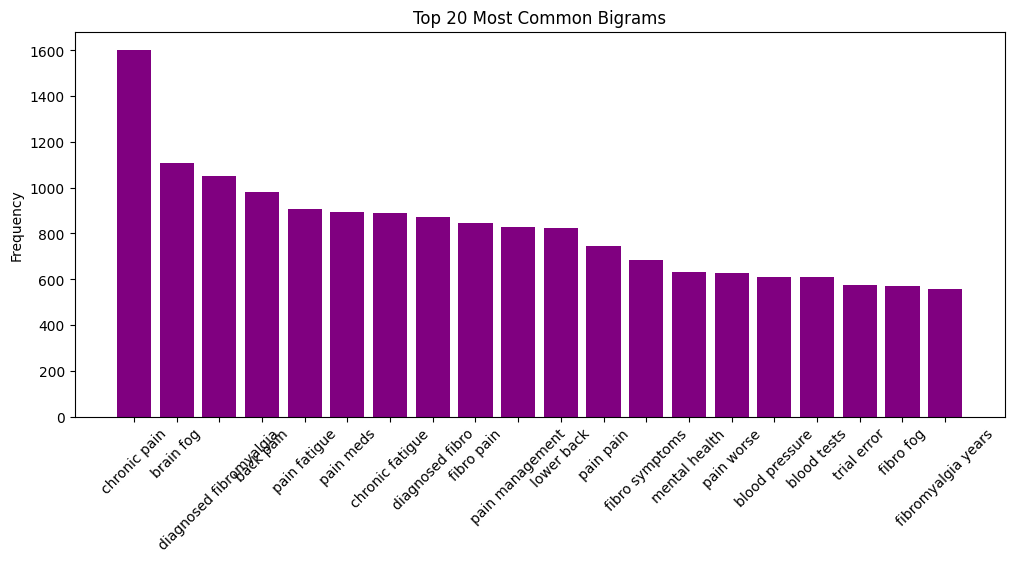

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Unigrams
vectorizer_uni = CountVectorizer(stop_words=full_stopwords, ngram_range=(1,1), max_features=20)
X_uni = vectorizer_uni.fit_transform(df_clean['content_clean'].dropna())
unigram_freq = dict(zip(vectorizer_uni.get_feature_names_out(), X_uni.sum(axis=0).A1))

# Bigrams
vectorizer_bi = CountVectorizer(stop_words=full_stopwords, ngram_range=(2,2), max_features=20)
X_bi = vectorizer_bi.fit_transform(df_clean['content_clean'].dropna())
bigram_freq = dict(zip(vectorizer_bi.get_feature_names_out(), X_bi.sum(axis=0).A1))

# Sort bigrams by frequency
sorted_bigram_freq = sorted(bigram_freq.items(), key=lambda item: item[1], reverse=True)
sorted_bigram_keys = [item[0] for item in sorted_bigram_freq]
sorted_bigram_values = [item[1] for item in sorted_bigram_freq]


print("Top 20 unigrams:", unigram_freq)
print("Top 20 bigrams:", dict(sorted_bigram_freq))



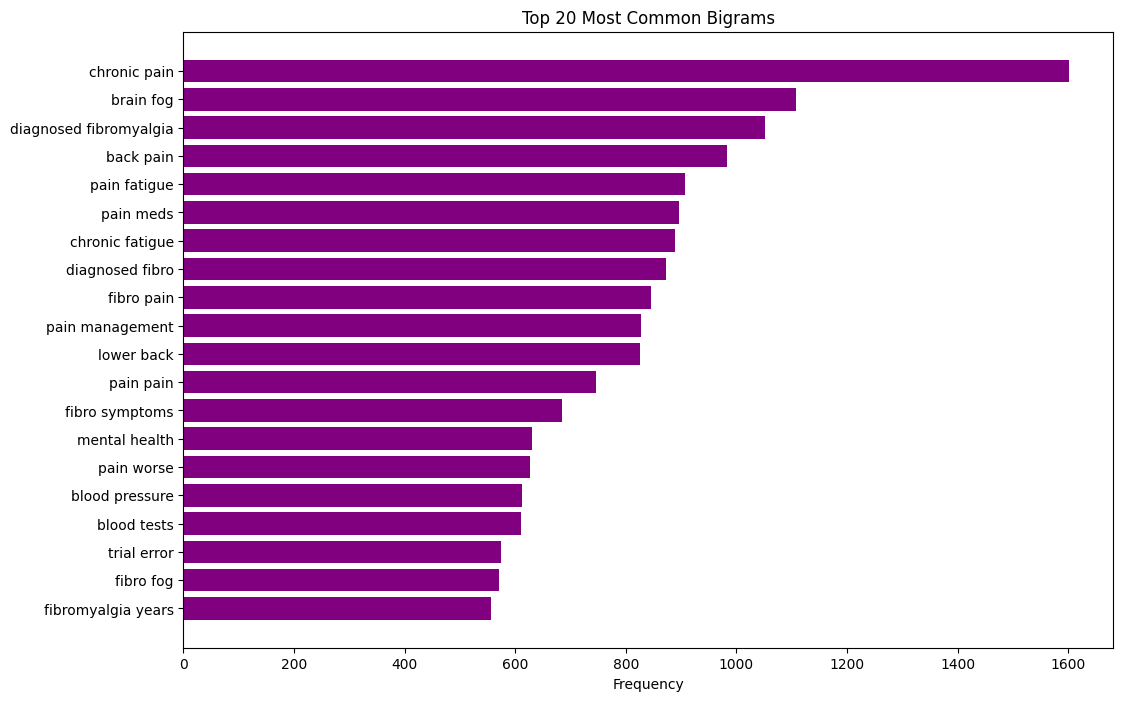

In [ ]:
# Visualize bigrams
plt.figure(figsize=(12, 8))
plt.barh(sorted_bigram_keys, sorted_bigram_values, color='purple')
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.savefig('top_20_most_common_bigrams.png', dpi=300, bbox_inches='tight')
plt.show()

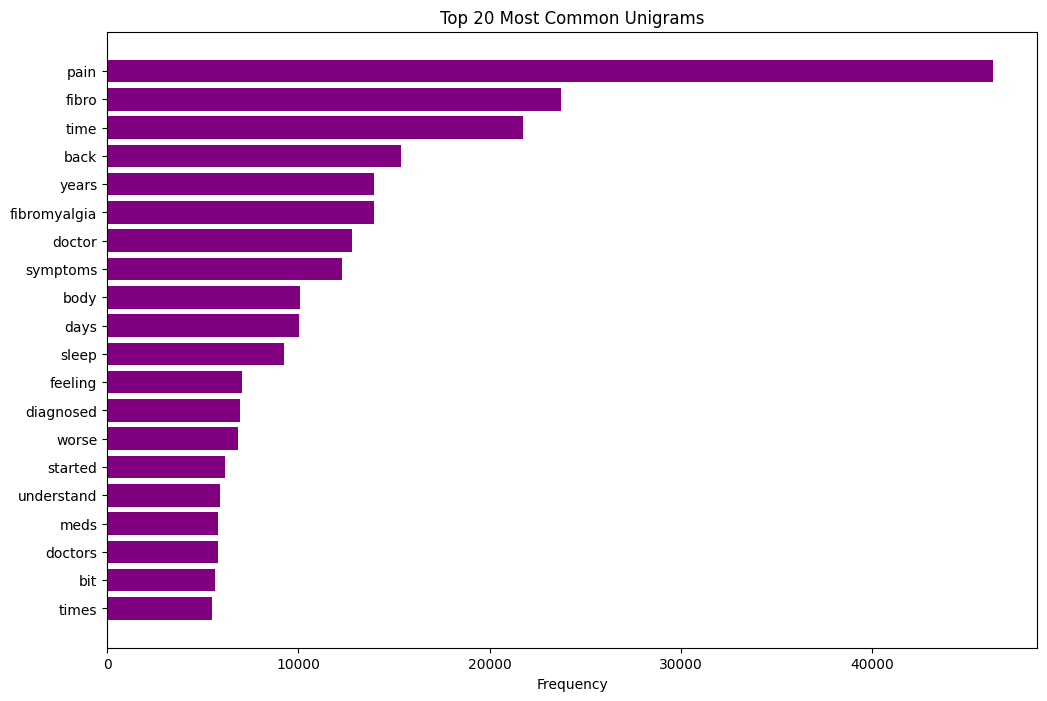

In [ ]:
# Sort unigrams by frequency
sorted_unigram_freq = sorted(unigram_freq.items(), key=lambda item: item[1], reverse=True)
sorted_unigram_keys = [item[0] for item in sorted_unigram_freq]
sorted_unigram_values = [item[1] for item in sorted_unigram_freq]

# Visualize Unigrams
plt.figure(figsize=(12, 8))
plt.barh(sorted_unigram_keys, sorted_unigram_values, color='purple')
plt.title('Top 20 Most Common Unigrams')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.savefig('top_20_most_common_unigrams.png', dpi=300, bbox_inches='tight')
plt.show()

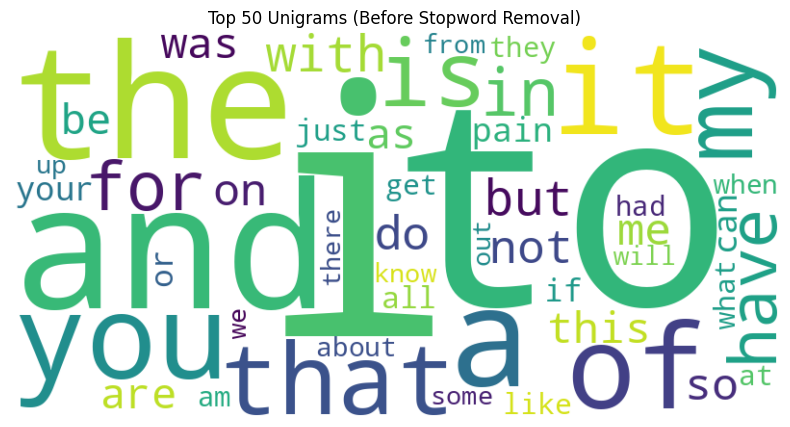

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk

# --- Word Cloud BEFORE Stopword Removal ---

# Tokenize without removing stopwords
all_words_before = []
for text in df_clean['content_clean'].dropna():
    tokens = nltk.word_tokenize(str(text).lower())
    all_words_before += [w for w in tokens if w.isalpha()]

# Unigram frequencies before stopword removal
unigram_freq_before = Counter(all_words_before).most_common(50)

# Generate and display the word cloud
wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(unigram_freq_before))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.title('Top 50 Unigrams (Before Stopword Removal)')
plt.savefig('top_50_unigrams_before_stopwords.png', dpi=300, bbox_inches='tight')
plt.show()

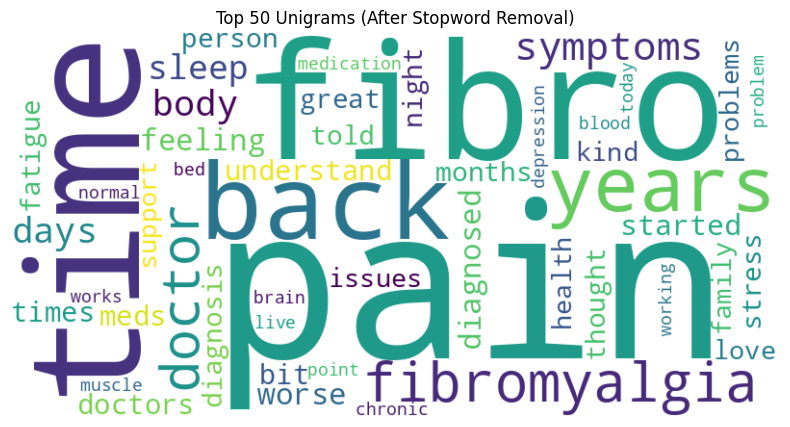

In [ ]:
# --- Word Cloud AFTER Stopword Removal ---

# Tokenize and filter with your full_stopwords list
all_words_after = []
for text in df_clean['content_clean'].dropna():
    tokens = nltk.word_tokenize(str(text).lower())
    all_words_after += [w for w in tokens if w.isalpha() and w not in full_stopwords]

# Unigram frequencies after stopword removal
unigram_freq_after = Counter(all_words_after).most_common(50)

# Generate and display the word cloud
wordcloud_after = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(unigram_freq_after))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis('off')
plt.title('Top 50 Unigrams (After Stopword Removal)')
plt.savefig('top_50_unigrams_after_stopwords.png', dpi=300, bbox_inches='tight')
plt.show()

##1. User Activity and Posting Patterns

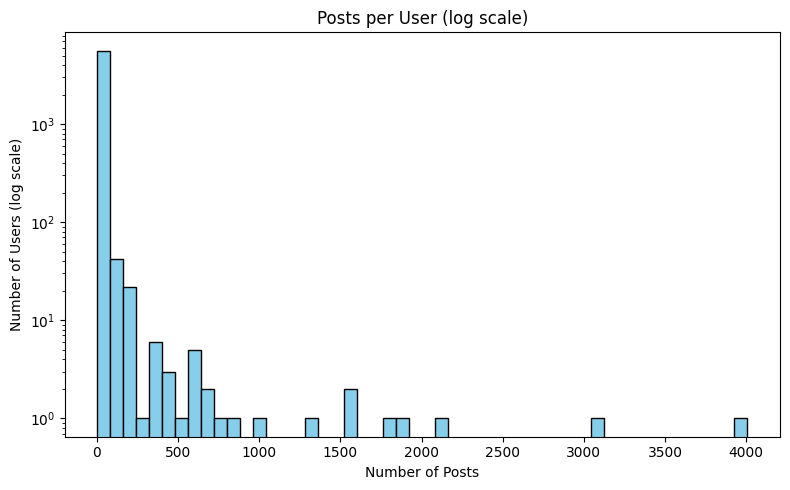

In [ ]:
import matplotlib.pyplot as plt

user_post_counts = df_clean['username'].value_counts()

plt.figure(figsize=(8,5))
plt.hist(user_post_counts, bins=50, color='skyblue', edgecolor='k', log=True)
plt.title('Posts per User (log scale)')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Users (log scale)')
plt.tight_layout()

plt.savefig('posts_per_user_log_scale.png', dpi=300, bbox_inches='tight')
plt.show()


##2. Thread Engagement and Reply Analysis

Histogram of replies per thread

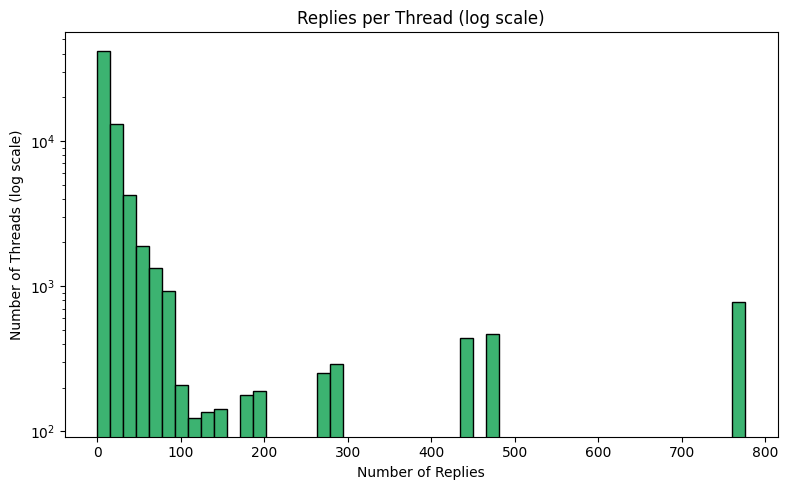

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_clean['thread_replies'], bins=50, color='mediumseagreen', edgecolor='k', log=True)
plt.title('Replies per Thread (log scale)')
plt.xlabel('Number of Replies')
plt.ylabel('Number of Threads (log scale)')
plt.tight_layout()

plt.savefig('replies_per_thread_log_scale.png', dpi=300, bbox_inches='tight')
plt.show()

Top 10 most replied-to threads

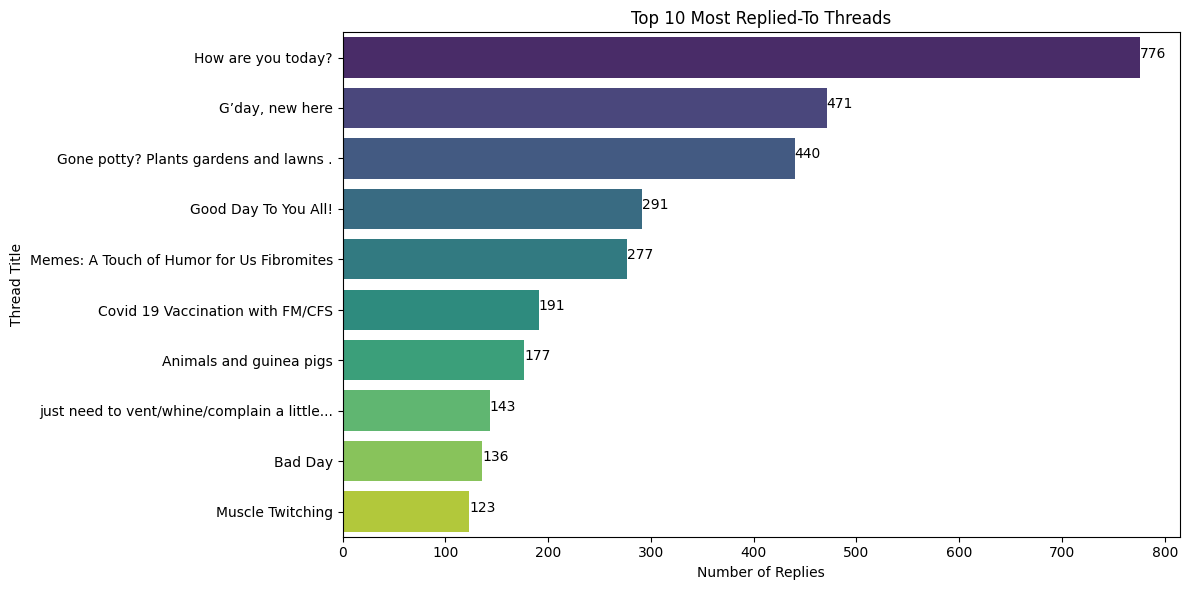

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_threads = df_clean.drop_duplicates(subset='thread_id', keep='last').sort_values(by='thread_replies', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='thread_replies', y='thread_title', hue='thread_title', data=top_10_threads, palette='viridis', legend=False)
plt.xlabel('Number of Replies')
plt.ylabel('Thread Title')
plt.title('Top 10 Most Replied-To Threads')
plt.tight_layout()

for index, value in enumerate(top_10_threads['thread_replies']):
    plt.text(value, index, str(value))

plt.savefig('top_10_most_replied_to_threads.png', dpi=300, bbox_inches='tight')
plt.show()

Top 10 most viewed threads

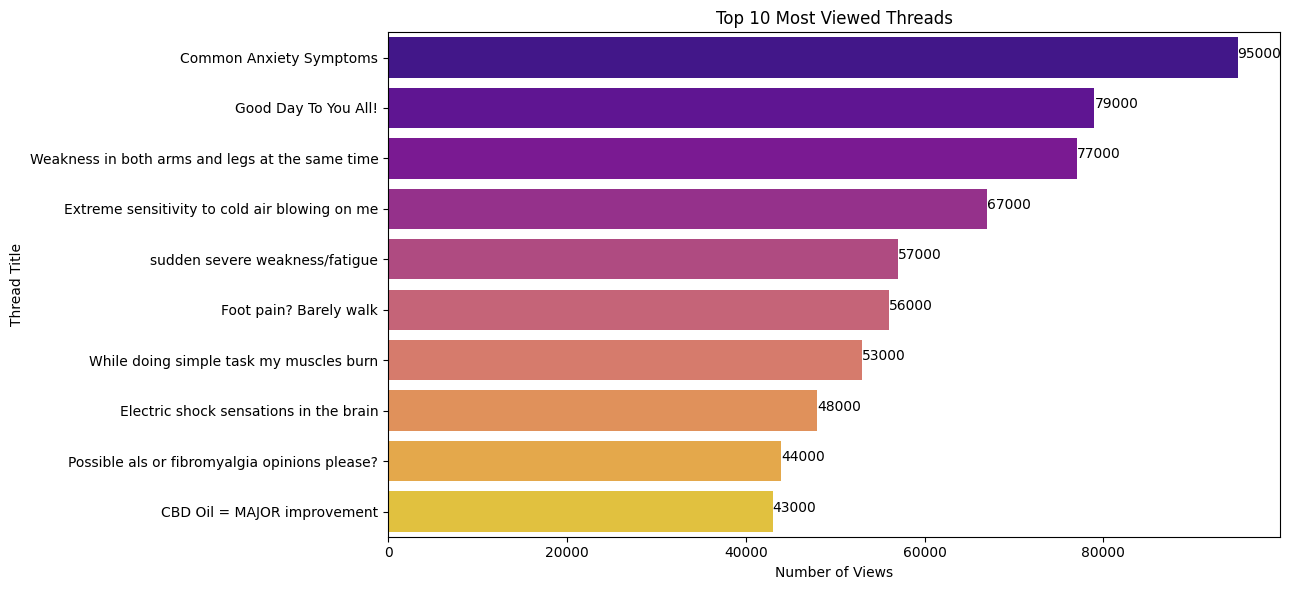

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_threads_by_views = df_clean.drop_duplicates(subset='thread_id', keep='last').sort_values(by='thread_views', ascending=False).head(10)

plt.figure(figsize=(13, 6))
bars = sns.barplot(x='thread_views', y='thread_title', hue='thread_title', data=top_10_threads_by_views, palette='plasma', legend=False)
plt.xlabel('Number of Views')
plt.ylabel('Thread Title')
plt.title('Top 10 Most Viewed Threads')
plt.tight_layout()

for index, value in enumerate(top_10_threads_by_views['thread_views']):
    plt.text(value, index, str(value))

plt.savefig('top_10_most_viewed_threads.png', dpi=300, bbox_inches='tight')
plt.show()

##3. Post Length Distribution
Histogram of post lengths

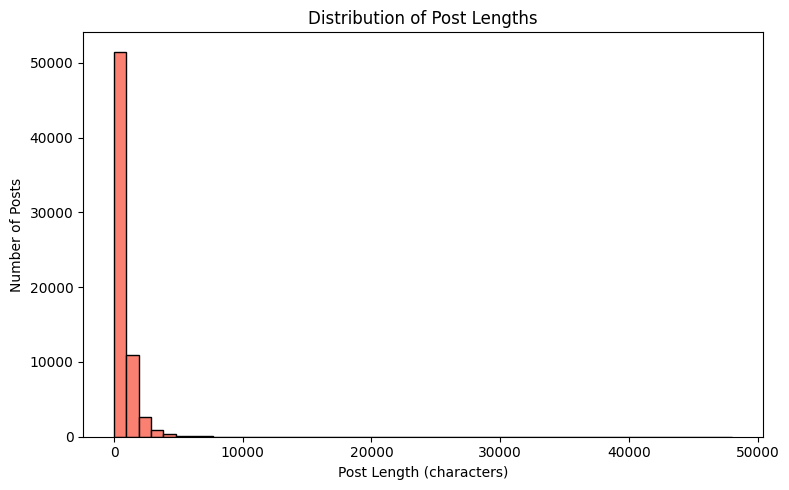

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_clean['content_length'], bins=50, color='salmon', edgecolor='k')
plt.title('Distribution of Post Lengths')
plt.xlabel('Post Length (characters)')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()


##4. Outlier Analysis: Super-Users and Super-Threads

Bar plot of Top 10 Super-Users (by post count)

Bar plot of Top 10 Super-Threads

/tmp/ipython-input-16-275411105.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




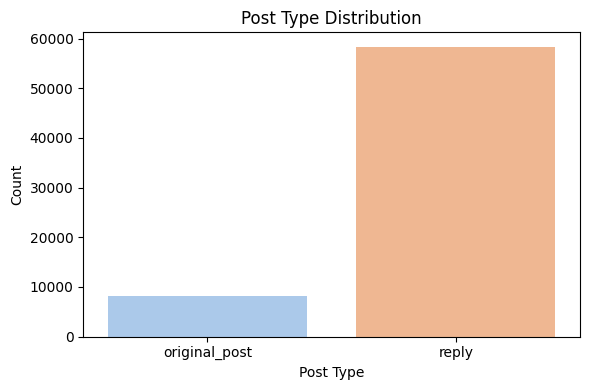

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x="post_type", palette="pastel")
plt.title("Post Type Distribution")
plt.xlabel("Post Type")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig('post_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-27-3490764530.py:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



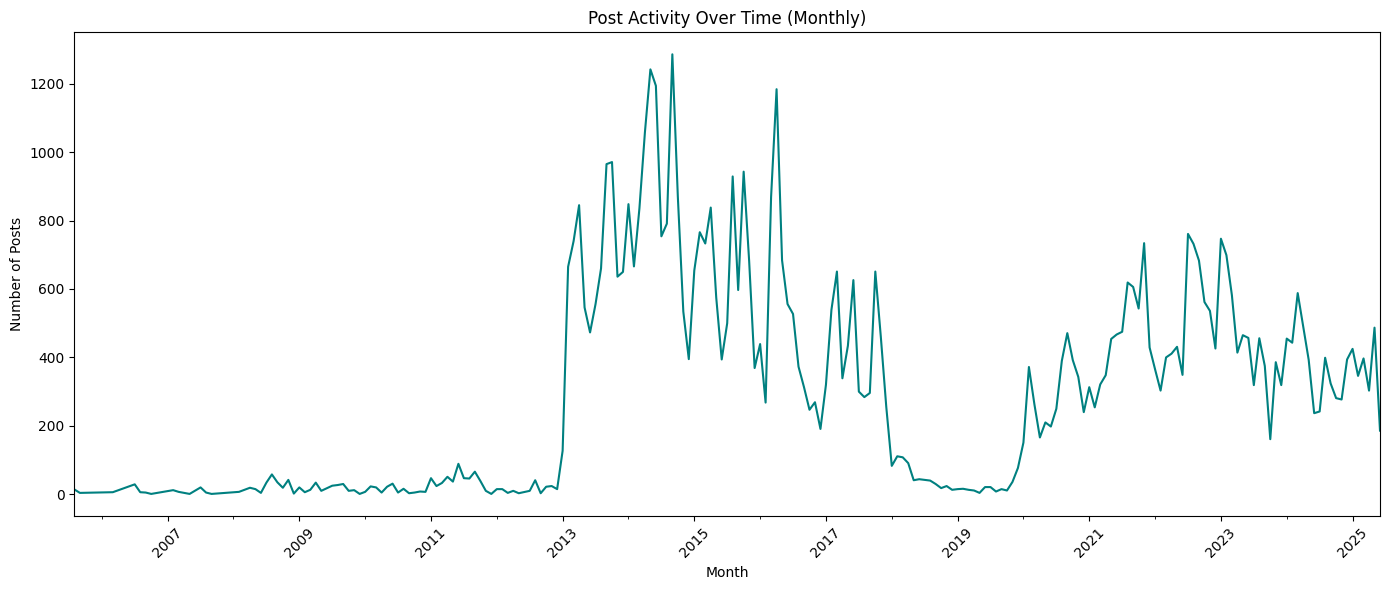

In [ ]:
# Convert timestamp to datetime objects
df_clean["timestamp"] = pd.to_datetime(df_clean["timestamp"], errors='coerce')

# Extract the month from timestamp
df_clean["month"] = df_clean["timestamp"].dt.to_period("M")

# Count posts per month
monthly_post_counts = df_clean.groupby("month").size().sort_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
monthly_post_counts.plot(kind="line", color="teal")
plt.title("Post Activity Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('post_activity_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

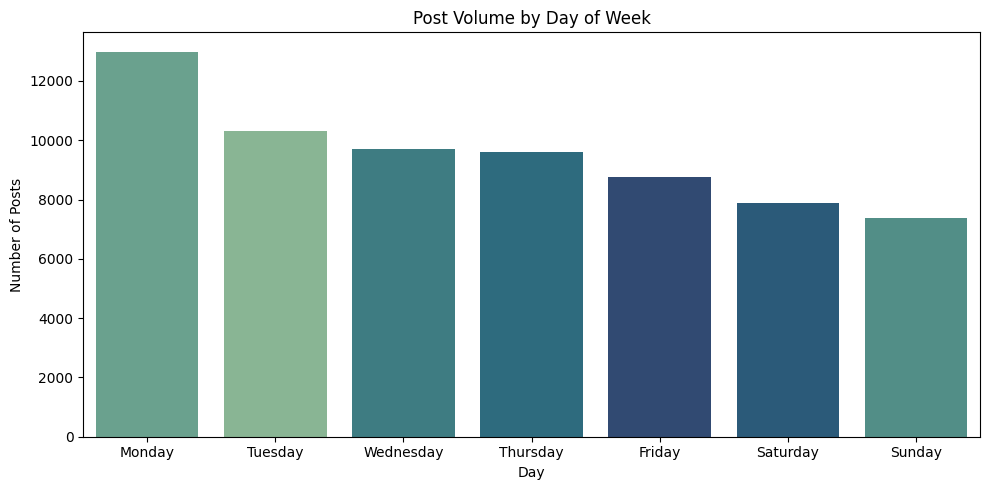

In [ ]:
# Extract day of week and hour of day
df_clean["day_of_week"] = df_clean["timestamp"].dt.day_name()
df_clean["hour_of_day"] = df_clean["timestamp"].dt.hour

# Plot post volume by day of week
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x="day_of_week", hue="day_of_week", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="crest", legend=False)
plt.title("Post Volume by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Posts")
plt.tight_layout()

plt.savefig('post_by_day_of_week.png', dpi=300, bbox_inches='tight')
plt.show()


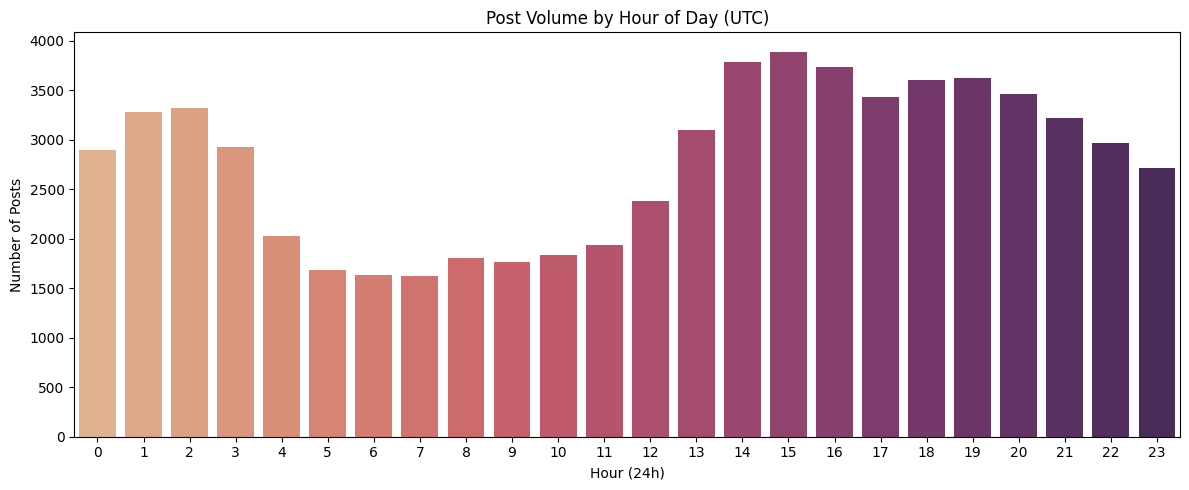

In [ ]:
# Plot post volume by hour of day
plt.figure(figsize=(12, 5))
sns.countplot(data=df_clean, x="hour_of_day", palette="flare", hue="hour_of_day", legend=False)
plt.title("Post Volume by Hour of Day (UTC)")
plt.xlabel("Hour (24h)")
plt.ylabel("Number of Posts")
plt.tight_layout()

plt.savefig('post_by_hour_of_day.png', dpi=300, bbox_inches='tight')
plt.show()

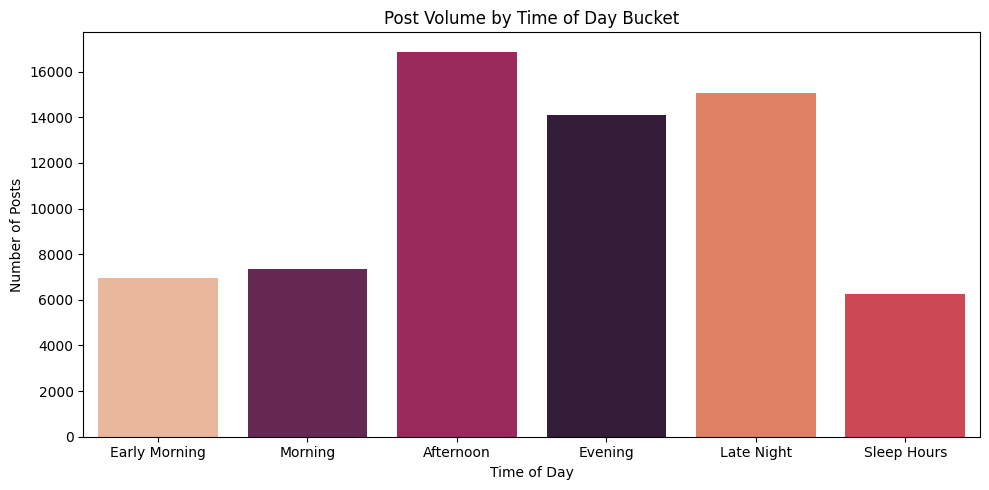

In [ ]:
def time_of_day_bucket(hour):
    if 4 <= hour < 8:
        return "Early Morning"
    elif 8 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    elif 21 <= hour <= 23 or 0 <= hour < 2:
        return "Late Night"
    else:
        return "Sleep Hours"

# Create column
df_clean["time_bucket"] = df_clean["hour_of_day"].apply(time_of_day_bucket)

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x="time_bucket", hue="time_bucket", order=["Early Morning", "Morning", "Afternoon", "Evening", "Late Night", "Sleep Hours"], palette="rocket", legend=False)
plt.title("Post Volume by Time of Day Bucket")
plt.xlabel("Time of Day")
plt.ylabel("Number of Posts")
plt.tight_layout()

plt.savefig('post_volume_by_time_of_the_day_bucket.png', dpi=300, bbox_inches='tight')
plt.show()


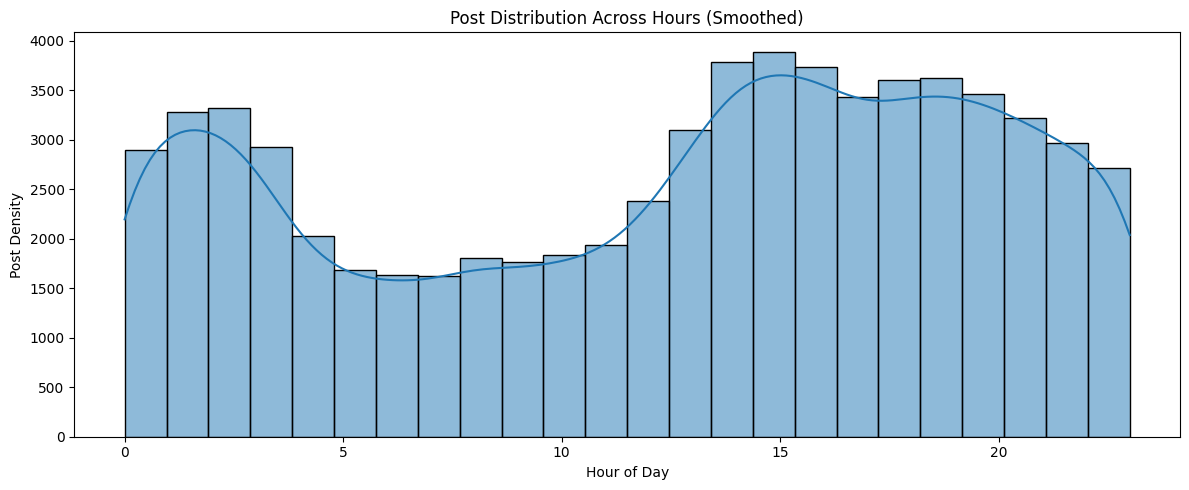

In [ ]:
# Optional smoothing using histogram
plt.figure(figsize=(12, 5))
sns.histplot(df_clean["hour_of_day"], bins=24, kde=True)
plt.title("Post Distribution Across Hours (Smoothed)")
plt.xlabel("Hour of Day")
plt.ylabel("Post Density")
plt.tight_layout()

plt.savefig('post_distribution_across_hours_smoothed.png', dpi=300, bbox_inches='tight')
plt.show()

user_join_month
2025-02    21
2025-03    20
2025-04    25
2025-05    27
2025-06     7
Freq: M, Name: count, dtype: int64


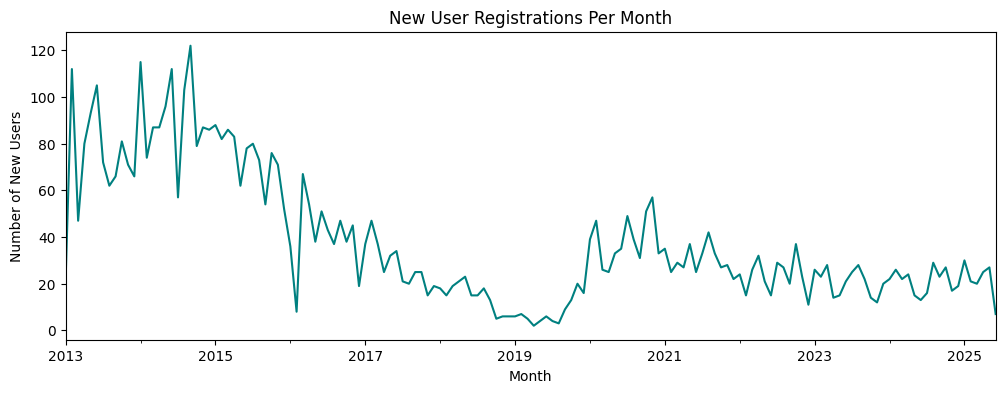

In [ ]:
# Convert 'user_joined' to datetime
df_clean['user_joined'] = pd.to_datetime(df_clean['user_joined'], errors='coerce')

user_join_month = df_clean.drop_duplicates('username')
user_join_month = user_join_month[user_join_month['user_joined'].notnull()]
user_join_month['user_join_month'] = user_join_month['user_joined'].dt.to_period('M')
join_counts = user_join_month['user_join_month'].value_counts().sort_index()

print(join_counts.tail())

# Visualization: Line plot
join_counts.plot(figsize=(12,4), color="teal")
plt.title('New User Registrations Per Month')
plt.xlabel('Month')
plt.ylabel('Number of New Users')
# plt.xticks(rotation=45)
# plt.tight_layout()

plt.savefig('new_user_registrations_per_month.png', dpi=300, bbox_inches='tight')
plt.show()

##OUTLIERS ON POSTS

In [ ]:
import plotly.express as px
import numpy as np

# Sort posts by length
sorted_lengths = post_lengths.sort_values().reset_index(drop=True)

# Define outlier threshold (e.g., 99th percentile)
outlier_thresh = np.percentile(sorted_lengths, 99)

# Flag outliers for color-coding
outlier_flag = sorted_lengths > outlier_thresh

fig = px.scatter(
    x=sorted_lengths.index,
    y=sorted_lengths,
    color=outlier_flag.map({False: "Normal", True: "Outlier"}),
    title="Post Lengths for All Posts (Outliers Highlighted)",
    labels={'x': 'Post Rank', 'y': 'Post Length (Words)', 'color': 'Type'},
    template="plotly_white"
)
fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.update_layout(
    showlegend=True,
    font=dict(family="Arial", size=14)
)
fig.show()

In [ ]:
# df_clean.drop_duplicates(subset='thread_id', keep='last').sort_values(by='thread_replies', ascending=False).head(10)

In [ ]:
# df_clean.drop_duplicates(subset='thread_id', keep='last').sort_values(by='thread_views', ascending=False).head(10)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# top_10_threads = df_clean.drop_duplicates(subset='thread_id', keep='last').sort_values(by='thread_replies', ascending=False).head(10)

# # Create a new column with the combined title and category
# top_10_threads['thread_label'] = top_10_threads['thread_title'] + ' (' + top_10_threads['forum_category'] + ')'

# plt.figure(figsize=(10, 6))
# sns.barplot(x='thread_replies', y='thread_label', data=top_10_threads, palette='viridis')
# plt.xlabel('Number of Replies')
# plt.ylabel('Thread Title')
# plt.title('Top 10 Most Replied-To Threads')
# plt.tight_layout()
# plt.show()

In [ ]:
# top_threads = thread_reply_counts.sort_values(ascending=False).head(10)
# top_thread_titles = df_clean.drop_duplicates('thread_id').set_index('thread_id').loc[top_threads.index]['thread_title']

# top_threads_df = pd.DataFrame({
#     'Thread Title': top_thread_titles.values,
#     'Replies': top_threads.values
# }).reset_index(drop=True)

# print(top_threads_df)

# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 6))
# sns.barplot(x='Replies', y='Thread Title', data=top_threads_df, palette='viridis')
# plt.xlabel('Number of Replies')
# plt.ylabel('Thread Title')
# plt.title('Top 10 Most Replied-To Threads')
# plt.tight_layout()

# plt.savefig('top_10_most_replied_to_threads.png', dpi=300, bbox_inches='tight')
# plt.show()

##OUTLIERS ON POSTS

In [ ]:
import plotly.express as px
import pandas as pd

# Fill NaN values with an empty string
df_clean['content_clean'] = df_clean['content_clean'].fillna('')

# If not already present
post_lengths = df_clean['content_clean'].str.split().apply(len)

fig = px.histogram(
    post_lengths,
    nbins=100,
    title="Distribution of Post Lengths (Words)",
    labels={'value': 'Number of Words', 'count': 'Number of Posts'},
    opacity=0.7,
    marginal="box",  # Adds a boxplot above
    template="plotly_white"
)
fig.update_traces(marker_color='teal')
fig.update_layout(
    xaxis_title="Post Length (Words)",
    yaxis_title="Number of Posts",
    showlegend=False,
    font=dict(family="Arial", size=14),
)

fig.write_image('distributions_of_post_lengths.png', scale=2)
fig.show()

In [ ]:


# import plotly.express as px
# import pandas as pd

# df_clean['content_clean'] = df_clean['content_clean'].fillna('')
# post_lengths = df_clean['content_clean'].str.split().apply(len)

# fig = px.histogram(
#     post_lengths,
#     nbins=100,
#     title="Distribution of Post Lengths (Words)",
#     labels={'value': 'Number of Words', 'count': 'Number of Posts'},
#     opacity=0.7,
#     marginal="box",
#     template="plotly_white"
# )

# fig.update_traces(marker_color='teal')

# # --- This is the updated section ---
# fig.update_layout(
#     xaxis_title="Post Length (Words)",
#     yaxis_title="Number of Posts",
#     showlegend=False,
#     font=dict(family="Arial", size=14),

#     # Add grid properties here
#     xaxis=dict(
#         showgrid=True,
#         gridwidth=1,  # --- Increase grid line thickness ---
#         gridcolor='LightGrey'
#     ),
#     yaxis=dict(
#         showgrid=True,
#         gridwidth=1,  # --- Increase grid line thickness ---
#         gridcolor='LightGrey'
#     )
# )
# # --- End of update ---

# # Saving the image with a higher DPI can also improve quality in a document
# fig.write_image('distributions_of_post_lengths.png', scale=3) # Increased scale for better resolution
# fig.show()

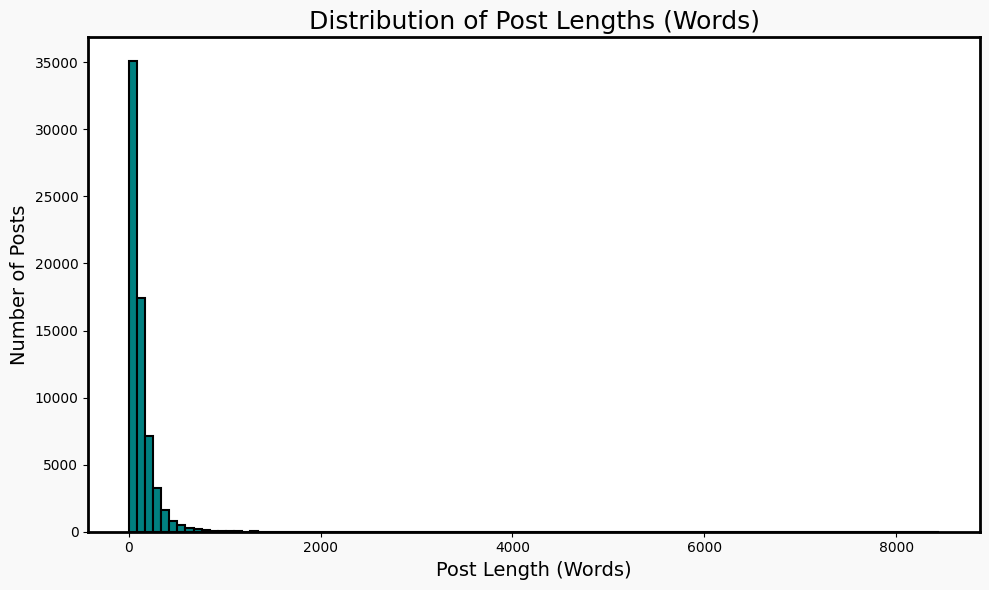

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), facecolor="#f9f9f9")  # Change background
ax = plt.gca()
ax.set_facecolor("#ffffff")  # Inner plot background
plt.hist(post_lengths, bins=100, color='teal', edgecolor='black', linewidth=1.5)
plt.xlabel('Post Length (Words)', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Distribution of Post Lengths (Words)', fontsize=18)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
plt.tight_layout()
plt.savefig('distributions_of_post_lengths_bordered.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np
import plotly.express as px

# Assume 'post_lengths' is your Series of post length data

# 1. Calculate the Interquartile Range (IQR)
Q1 = post_lengths.quantile(0.25)
Q3 = post_lengths.quantile(0.75)
IQR = Q3 - Q1

# 2. Define the outlier boundaries
# Any point 1.5 times the IQR above Q3 or below Q1 is an outlier.
outlier_boundary_upper = Q3 + 1.5 * IQR
outlier_boundary_lower = Q1 - 1.5 * IQR

# 3. Flag the outliers
# In our case, we only care about posts that are too long (upper outliers)
iqr_outlier_flag = post_lengths > outlier_boundary_upper

# 4. Report the findings
print(f"--- Outlier Detection using IQR Method ---")
print(f"Lower Quartile (Q1): {Q1:.2f} words")
print(f"Upper Quartile (Q3): {Q3:.2f} words")
print(f"Outlier Threshold (Upper Boundary): > {outlier_boundary_upper:.2f} words")
print(f"Number of outliers found: {iqr_outlier_flag.sum()}")

# 5. Visualize the results
fig_iqr = px.scatter(
    x=post_lengths.sort_values().reset_index(drop=True).index,
    y=post_lengths.sort_values().reset_index(drop=True),
    color=iqr_outlier_flag[post_lengths.sort_values().index].map({False: "Normal", True: "Outlier"}),
    title="Post Length Outliers (IQR Method)",
    labels={'x': 'Post Rank', 'y': 'Post Length (Words)', 'color': 'Type'}
)
fig_iqr.add_hline(y=outlier_boundary_upper, line_dash="dash", line_color="red", annotation_text="Outlier Threshold")

fig_iqr.write_image('post_lengths_with_outliers.png', scale=2)
fig_iqr.show()

--- Outlier Detection using IQR Method ---
Lower Quartile (Q1): 38.00 words
Upper Quartile (Q3): 150.00 words
Outlier Threshold (Upper Boundary): > 318.00 words
Number of outliers found: 4260


In [ ]:
# You already created 'iqr_outlier_flag' in your outlier detection script.
# It is TRUE for every post with a length > 318.05 words.
# We can use this to filter df_clean directly.

outlier_posts_df = df_clean[iqr_outlier_flag].copy()

# Verify the number of posts matches your outlier detection output
print(f"Successfully isolated {len(outlier_posts_df)} outlier posts for analysis.")

Successfully isolated 4260 outlier posts for analysis.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# You should already have your 'full_stopwords' list
vectorizer = CountVectorizer(stop_words=full_stopwords, ngram_range=(2, 2))

# --- Get top bigrams for the ENTIRE dataset (your baseline) ---
all_posts_matrix = vectorizer.fit_transform(df_clean['content_clean'].astype(str))
sum_words_all = all_posts_matrix.sum(axis=0)
words_freq_all = [(word, sum_words_all[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq_all = sorted(words_freq_all, key=lambda x: x[1], reverse=True)
top_bigrams_all = pd.DataFrame(words_freq_all[:15], columns=['Bigram', 'Frequency_All'])

# --- Get top bigrams for the OUTLIER dataset ---
outlier_matrix = vectorizer.fit_transform(outlier_posts_df['content_clean'].astype(str))
sum_words_outlier = outlier_matrix.sum(axis=0)
words_freq_outlier = [(word, sum_words_outlier[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq_outlier = sorted(words_freq_outlier, key=lambda x: x[1], reverse=True)
top_bigrams_outlier = pd.DataFrame(words_freq_outlier[:15], columns=['Bigram', 'Frequency_Outlier'])

# --- Display the comparison ---
print("--- Top 15 Bigrams: Overall Dataset vs. Outlier Posts ---")
print("\n--- Overall Dataset ---")
print(top_bigrams_all)
print("\n--- Outlier Posts Only ---")
print(top_bigrams_outlier)

--- Top 15 Bigrams: Overall Dataset vs. Outlier Posts ---

--- Overall Dataset ---
                    Bigram  Frequency_All
0             chronic pain           1602
1                brain fog           1107
2   diagnosed fibromyalgia           1051
3                back pain            983
4             pain fatigue            908
5                pain meds            896
6          chronic fatigue            889
7          diagnosed fibro            873
8               fibro pain            846
9          pain management            828
10              lower back            826
11               pain pain            746
12          fibro symptoms            685
13           mental health            631
14              pain worse            626

--- Outlier Posts Only ---
                    Bigram  Frequency_Outlier
0             chronic pain                418
1                brain fog                312
2                back pain                291
3               lower back       

In [ ]:
# top_bigrams_outlier.head(100)

/tmp/ipython-input-3789690666.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3789690666.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Comparative bar chart saved as 'bigram_comparison_chart.png'


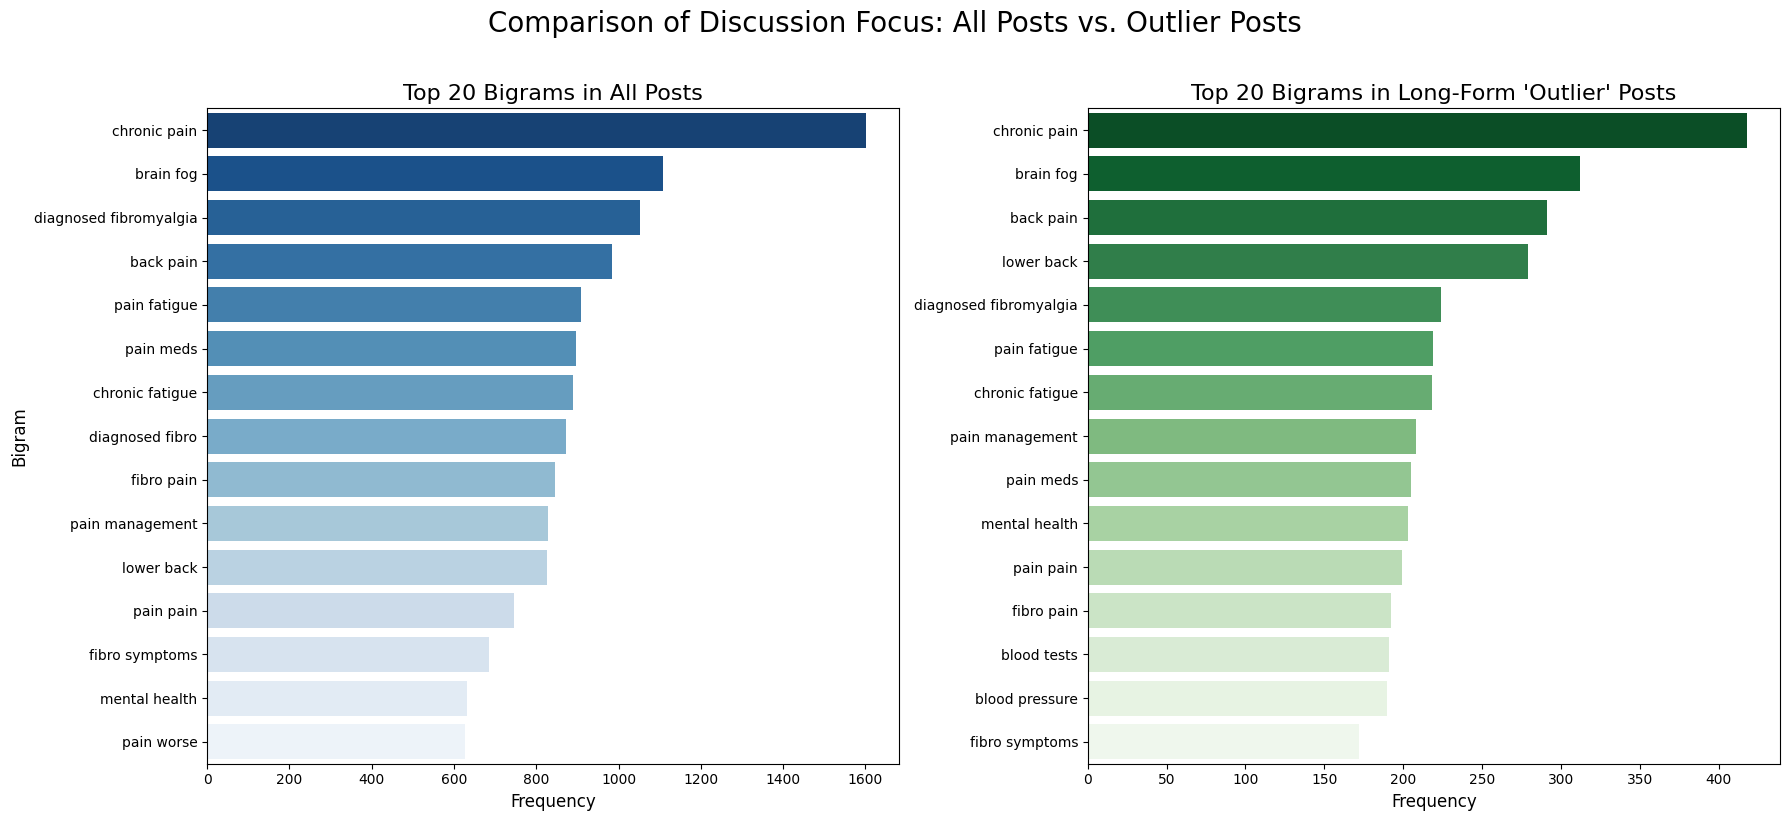

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'top_bigrams_all' and 'top_bigrams_outlier' are your dataframes

# --- Create a figure with two subplots, side-by-side ---
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # 1 row, 2 columns

# --- Plot 1: Top Bigrams from the Overall Dataset ---
sns.barplot(
    x="Frequency_All",
    y="Bigram",
    data=top_bigrams_all,
    ax=axes[0], # Plot on the first subplot
    palette="Blues_r"
)
axes[0].set_title("Top 20 Bigrams in All Posts", fontsize=16)
axes[0].set_xlabel("Frequency", fontsize=12)
axes[0].set_ylabel("Bigram", fontsize=12)


# --- Plot 2: Top Bigrams from the Outlier Posts Only ---
sns.barplot(
    x="Frequency_Outlier",
    y="Bigram",
    data=top_bigrams_outlier,
    ax=axes[1], # Plot on the second subplot
    palette="Greens_r"
)
axes[1].set_title("Top 20 Bigrams in Long-Form 'Outlier' Posts", fontsize=16)
axes[1].set_xlabel("Frequency", fontsize=12)
axes[1].set_ylabel("") # Hide y-label to avoid repetition


# --- Final Touches ---
plt.suptitle("Comparison of Discussion Focus: All Posts vs. Outlier Posts", fontsize=20, y=1.02)
plt.tight_layout() # Adjust layout to prevent overlap

# Save the figure
output_path = "bigram_comparison_chart.png"
plt.savefig(output_path, bbox_inches='tight')

print(f"Comparative bar chart saved as '{output_path}'")

# Show the plot
plt.show()

In [ ]:
outlier_posts_df.sample(10)

Unnamed: 0                                          thread_id  \
37466       37466                        arguing-with-yourself.30375   
31529       31529  possible-als-or-fibromyalgia-opinions-please.1...   
27646       27646  advice-please-for-1st-rheumatology-appointment...   
1986         1986             visual-disturbance-and-head-pain.30455   
1992         1992             visual-disturbance-and-head-pain.30455   
60309       60309                                   hi-my-life.24782   
26181       26181       sick-and-tired-of-being-sick-and-tired.21667   
56169       56169                     different-life-style-now.30588   
55594       55594  gabapentin-neurontin-as-a-treatment-for-fms.23736   
6058         6058  how-to-grieve-self-motivate-track-symptoms-hun...   

                                            thread_title  \
37466                              Arguing with yourself   
31529      Possible als or fibromyalgia opinions please?   
27646     Advice please for 1st rheumatology appointment   
1986                    Visual Disturbance and Head Pain   
1992                    Visual Disturbance and Head Pain   
60309                                         hi my life   
26181             Sick and tired of being sick and tired   
56169                           different life style now   
55594     Gabapentin (Neurontin) as a treatment for FMS?   
6058   How to grieve, self-motivate, track symptoms, ...   

                                              thread_url  \
37466  https://www.fibromyalgiaforums.org/community/t...   
31529  https://www.fibromyalgiaforums.org/community/t...   
27646  https://www.fibromyalgiaforums.org/community/t...   
1986   https://www.fibromyalgiaforums.org/community/t...   
1992   https://www.fibromyalgiaforums.org/community/t...   
60309  https://www.fibromyalgiaforums.org/community/t...   
26181  https://www.fibromyalgiaforums.org/community/t...   
56169  https://www.fibromyalgiaforums.org/community/t...   
55594  https://www.fibromyalgiaforums.org/community/t...   
6058   https://www.fibromyalgiaforums.org/community/t...   

                               forum_category  thread_views  thread_replies  \
37466                 Moan, complain and vent          2000              55   
31529                 Do I have fibromyalgia?         44000              68   
27646                 Do I have fibromyalgia?           292               8   
1986   General discussions about fibromyalgia           821              11   
1992   General discussions about fibromyalgia           821              11   
60309                     Welcome new members          2000               7   
26181  General discussions about fibromyalgia          2000               4   
56169                     Welcome new members           539              25   
55594        Pharmaceuticals and pharmacology          4000               8   
6058   General discussions about fibromyalgia          4000              26   

       total_posts      post_type  post_index  ... post_month year_joined  \
37466           56          reply          26  ...          5        2016   
31529           69          reply          34  ...          6          -1   
27646            9          reply           3  ...          2        2024   
1986            12  original_post           0  ...          7        2022   
1992            12          reply           6  ...          7        2022   
60309            8  original_post           0  ...          4        2015   
26181            5  original_post           0  ...          5        2013   
56169           26          reply          13  ...         12        2024   
55594            9  original_post           0  ...          8        2014   
6058            27  original_post           0  ...         11        2020   

      post_length_bucket user_activity_level thread_activity_level  \
37466               Long           Superuser                  High   
31529               Long          

In [ ]:
!pip install -U kaleido

In [ ]:
!plotly_get_chrome


Plotly will install a copy of Google Chrome to be used for generating static images of plots.
Chrome will be installed at: /usr/local/lib/python3.11/dist-packages/choreographer/cli/browser_exe
Do you want to proceed? [y/n] y
Installing Chrome for Plotly...
Chrome installed successfully.
The Chrome executable is now located at: /usr/local/lib/python3.11/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome


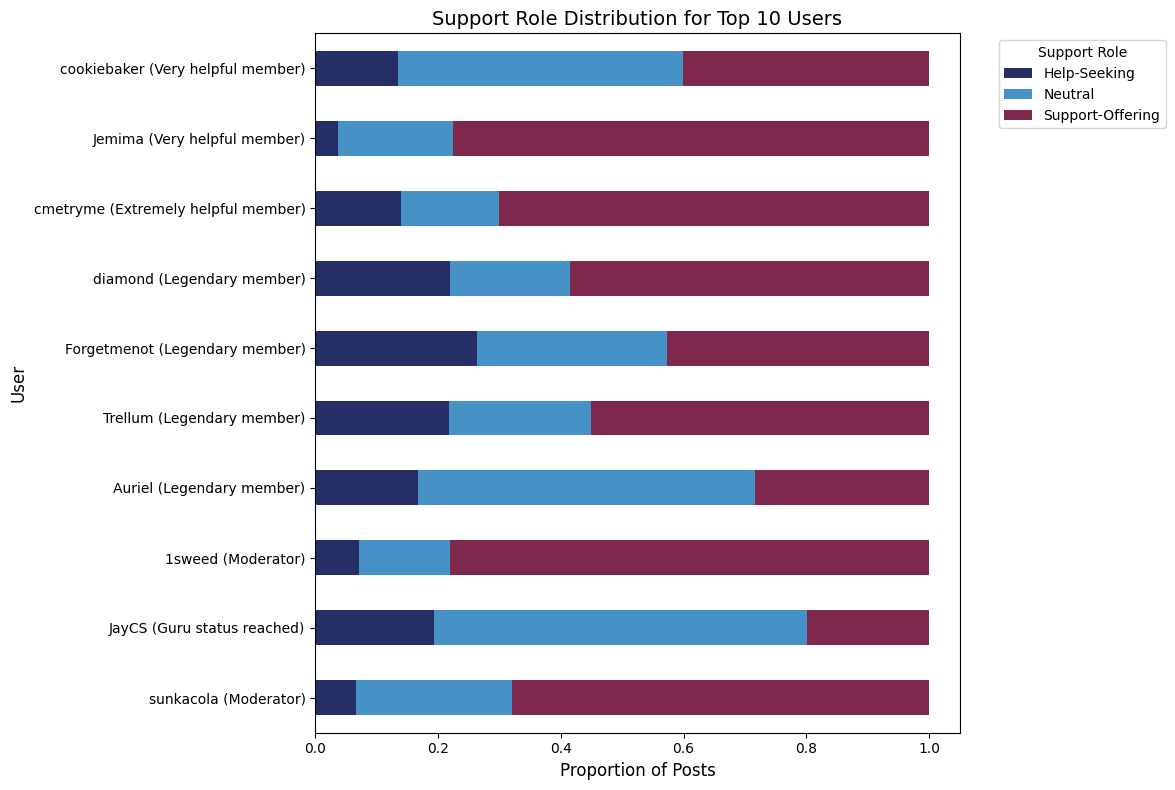

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get top 10 users by post count from the sample
user_counts_sample = df_sample_clean[df_sample_clean['username'] != "Guest"]['username'].value_counts().head(10)
top10_users_sample = user_counts_sample.index.tolist()

# Get their titles from the sample
user_titles_sample = (
    df_sample_clean[df_sample_clean['username'].isin(top10_users_sample)]
    .groupby('username')['user_title']
    .agg(lambda x: x.value_counts().index[0])  # Most frequent title for each user
)

# Prepare a DataFrame for plotting
plot_df_sample = pd.DataFrame({
    'Username': top10_users_sample,
    'User Title': [user_titles_sample.get(u, 'N/A') for u in top10_users_sample],
    'Number of Posts': [user_counts_sample.get(u, 0) for u in top10_users_sample]
})

# Combine username and title for y-axis labels
plot_df_sample['Label'] = plot_df_sample['Username'] + ' (' + plot_df_sample['User Title'] + ')'

# Create a pivot table for the support role distribution
pivot_sample = pd.crosstab(
    df_sample_clean[df_sample_clean['username'].isin(top10_users_sample)]['username'],
    df_sample_clean[df_sample_clean['username'].isin(top10_users_sample)]['support_role'],
    normalize='index'
)

# Reorder the pivot table to match the order of the top 10 users
pivot_sample = pivot_sample.reindex(top10_users_sample)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
pivot_sample.plot(kind='barh', stacked=True, ax=ax, color=colors)

# Set the y-tick labels to the combined 'Label'
ax.set_yticklabels(plot_df_sample['Label'])

# Customize the plot
ax.set_xlabel('Proportion of Posts', fontsize=12)
ax.set_ylabel('User', fontsize=12)
ax.set_title('Support Role Distribution for Top 10 Users', fontsize=14)
ax.legend(title='Support Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and show the plot
plt.savefig('top_10_users_support_role_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

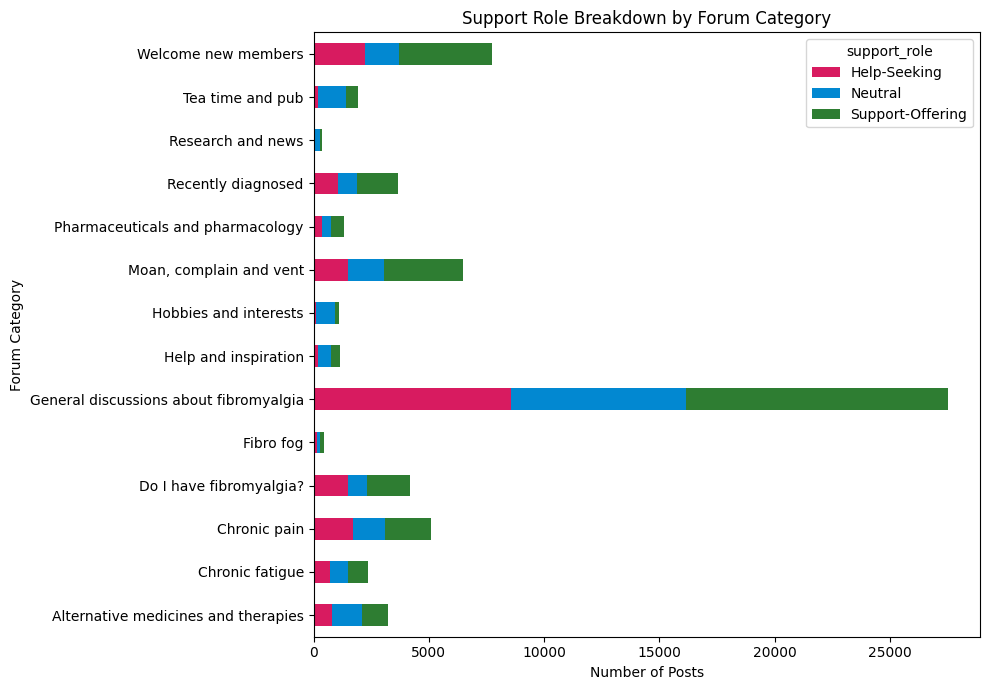

In [ ]:
colors = ['#D81B60', '#0288D1', '#2E7D32'] # Help-Seeking, Neutral, Support-Offering
cat_role_pivot = pd.crosstab(df_clean['forum_category'], df_clean['support_role'])
cat_role_pivot.plot(kind='barh', stacked=True, figsize=(10,7), color=colors)
plt.xlabel('Number of Posts')
plt.ylabel('Forum Category')
plt.title('Support Role Breakdown by Forum Category')
plt.tight_layout()
plt.show()


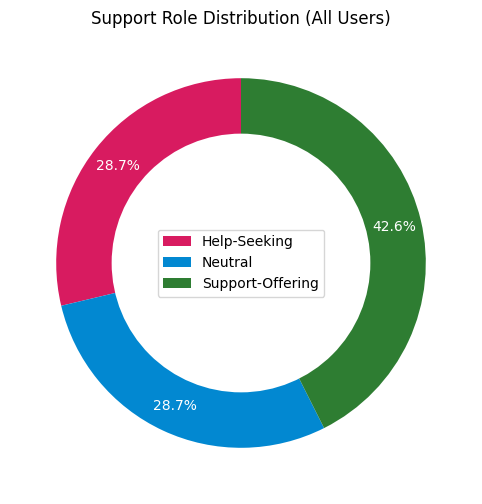

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#D81B60', '#0288D1', '#2E7D32'] # Help-Seeking, Neutral, Support-Offering

role_counts = df_clean['support_role'].value_counts(normalize=True).sort_index()
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(role_counts, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'color':"w"}, pctdistance=0.85)
plt.title('Support Role Distribution (All Users)')
plt.legend(patches, role_counts.index, loc="center")

# draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.savefig('support_role_distribution_all_users.png', dpi=300, bbox_inches='tight')
plt.show()

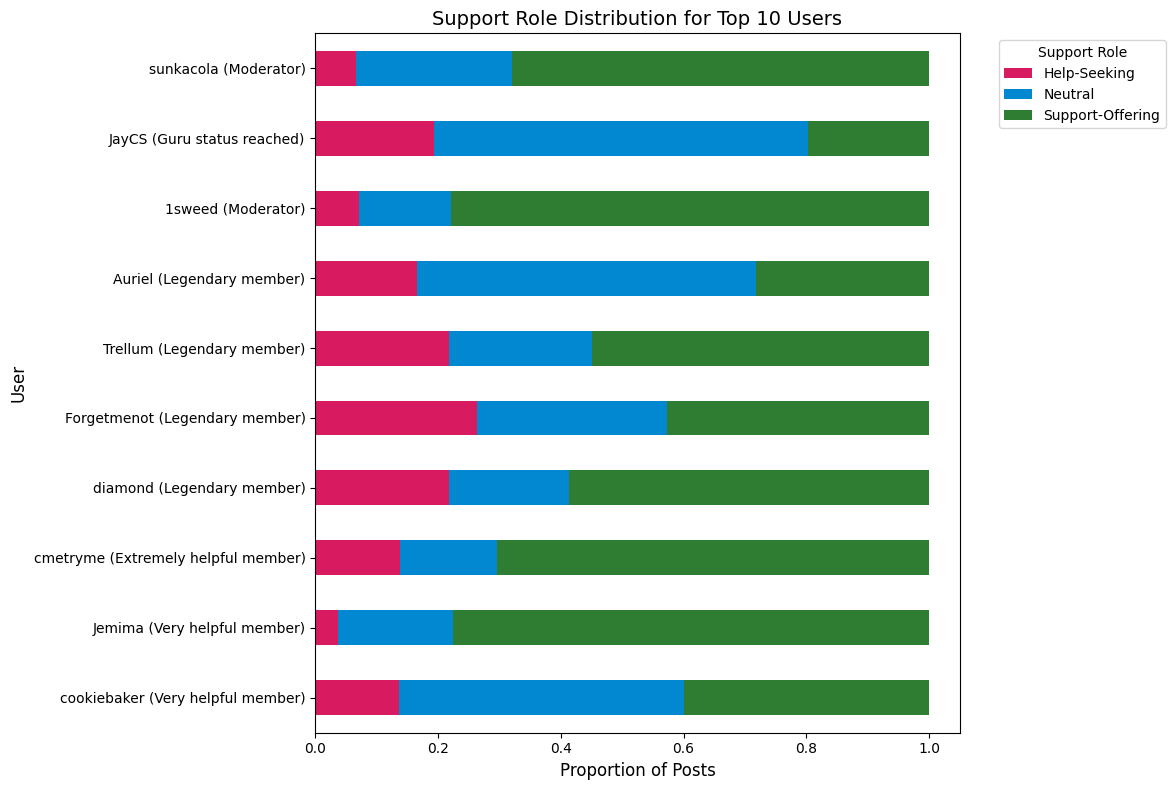

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# colors = ['#2E7D32', '#0288D1', '#D81B60']  # Help-Seeking, Neutral-Offering, Support-Offering
# pivot_sample.plot(kind='barh', stacked=True, ax=ax, color=colors)

# Get top 10 users by post count from the sample
user_counts_sample = df_clean[df_clean['username'] != "Guest"]['username'].value_counts().head(10)
top10_users_sample = user_counts_sample.index.tolist()

# Reverse the order to display from top to bottom based on value_counts (highest to lowest)
top10_users_sample = top10_users_sample[::-1]

# Get their titles from the sample
user_titles_sample = (
    df_clean[df_clean['username'].isin(top10_users_sample)]
    .groupby('username')['user_title']
    .agg(lambda x: x.value_counts().index[0])  # Most frequent title for each user
)

# Prepare a DataFrame for plotting
plot_df_clean = pd.DataFrame({
    'Username': top10_users_sample,
    'User Title': [user_titles_sample.get(u, 'N/A') for u in top10_users_sample],
    'Number of Posts': [user_counts_sample.get(u, 0) for u in top10_users_sample]
})

# Combine username and title for y-axis labels
plot_df_clean['Label'] = plot_df_clean['Username'] + ' (' + plot_df_clean['User Title'] + ')'

# Create a pivot table for the support role distribution
pivot_sample = pd.crosstab(
    df_clean[df_clean['username'].isin(top10_users_sample)]['username'],
    df_clean[df_clean['username'].isin(top10_users_sample)]['support_role'],
    normalize='index'
)

# Reorder the pivot table to match the reversed order of the top 10 users
pivot_sample = pivot_sample.reindex(top10_users_sample)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
pivot_sample.plot(kind='barh', stacked=True, ax=ax, color=colors)

# Set the y-tick labels to the combined 'Label'
ax.set_yticklabels(plot_df_clean['Label'])

# Customize the plot
ax.set_xlabel('Proportion of Posts', fontsize=12)
ax.set_ylabel('User', fontsize=12)
ax.set_title('Support Role Distribution for Top 10 Users', fontsize=14)
ax.legend(title='Support Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and show the plot
plt.savefig('top_10_users_support_role_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# --- Assume 'df_final_merged' is your complete, cleaned, and labeled DataFrame ---

# --- Identify the Top 10 Users ---
top_10_usernames = df_clean[df_clean['username'] != "Guest"]['username'].value_counts().head(10).index.tolist()
super_users_df = df_clean[df_clean['username'].isin(top_10_usernames)].copy()

print(f"--- Isolating {len(super_users_df):,} posts from the top 10 super users for analysis ---")


# --- Calculate Behavioral Metrics ---
super_user_analysis = super_users_df.groupby('username').agg(
    user_title=('user_title', lambda x: x.mode()[0]),
    total_posts=('post_id', 'count'),
    # Calculate the number of original posts vs. replies
    original_posts=('post_type', lambda x: (x == 'original_post').sum()),
    replies=('post_type', lambda x: (x == 'reply').sum()),
    # Find their most frequent forum category
    top_category=('forum_category', lambda x: x.mode()[0])
).reset_index()

# Calculate the ratio of replies to original posts
# We add 1 to the denominator to avoid division by zero for users with no original posts
super_user_analysis['reply_to_op_ratio'] = super_user_analysis['replies'] / (super_user_analysis['original_posts'] + 1)

# Sort by total posts
super_user_analysis = super_user_analysis.sort_values(by='total_posts', ascending=False)

print("\n--- Behavioral Metrics for Top 10 Super Users ---")
display(super_user_analysis)

--- Isolating 18,669 posts from the top 10 super users for analysis ---

--- Behavioral Metrics for Top 10 Super Users ---


username                user_title  total_posts  original_posts  \
9    sunkacola                 Moderator         4008              36   
3        JayCS       Guru status reached         3098               9   
0       1sweed                 Moderator         2114              44   
1       Auriel          Legendary member         1882               3   
5      Trellum          Legendary member         1792              46   
2  Forgetmenot          Legendary member         1597             164   
8      diamond          Legendary member         1544              71   
6     cmetryme  Extremely helpful member         1032              20   
4       Jemima       Very helpful member          825               5   
7  cookiebaker       Very helpful member          777               8   

   replies                            top_category  reply_to_op_ratio  
9     3972  General discussions about fibromyalgia         107.351351  
3     3089  General discussions about fibromyalgia         308.900000  
0     2070                     Welcome new members          46.000000  
1     1879  General discussions about fibromyalgia         469.750000  
5     1746  General discussions about fibromyalgia          37.148936  
2     1433  General discussions about fibromyalgia           8.684848  
8     1473  General discussions about fibromyalgia          20.458333  
6     1012  General discussions about fibromyalgia          48.190476  
4      820  General discussions about fibromyalgia         136.666667  
7      769  General discussions about fibromyalgia          85.444444

In [ ]:
# --- Visualize Posting Style ---
fig = px.bar(
    super_user_analysis,
    x='username',
    y=['original_posts', 'replies'],
    title='<b>Posting Style of Super Users: Initiators vs. Responders</b>',
    labels={'value': 'Number of Posts', 'username': 'Username', 'variable': 'Post Type'},
    template='plotly_white'
)

fig.write_image('posting_style_of_super_users.png', scale=2)
fig.show()

In [ ]:
# --- Analyze the distribution of support roles for super users ---
super_user_role_counts = super_users_df['support_role'].value_counts(normalize=True).mul(100).rename('percentage').reset_index().sort_values(by='support_role')

# --- Analyze the distribution for the rest of the users for comparison ---
normal_users_df = df_clean[~df_clean['username'].isin(top_10_usernames)]
normal_user_role_counts = normal_users_df['support_role'].value_counts(normalize=True).mul(100).rename('percentage').reset_index().sort_values(by='support_role')

# --- Visualize the Comparison ---
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=('<b>Super User Post Types</b>', '<b>Normal User Post Types</b>'))

fig.add_trace(
    go.Bar(x=super_user_role_counts['support_role'], y=super_user_role_counts['percentage'], name='Super Users', marker_color=['#D81B60', '#0288D1', '#2E7D32']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=normal_user_role_counts['support_role'], y=normal_user_role_counts['percentage'], name='Normal Users', marker_color=['#D81B60', '#0288D1', '#2E7D32']),
    row=1, col=2
)

fig.update_layout(
    title_text='<b>Functional Role Comparison: Super Users vs. Normal Users</b>',
    showlegend=False,
    template='plotly_white'
)

fig.write_image('functional_role_analysis.png', scale=2)
fig.show()

In [ ]:
import pandas as pd

# --- Define the columns you want to extract ---
# Using 'content_clean' as the main text column based on our previous work.
columns_to_extract = ['post_id', 'content_clean', 'concept_text']

# --- Create the new subset dataframe ---
df_for_extraction = df_clean[columns_to_extract].copy()

# --- Save the new dataframe to a CSV file ---
output_filename = 'posts_for_medication_extraction.csv'
df_for_extraction.to_csv(output_filename, index=False)

print(f"Successfully created '{output_filename}' with {len(df_for_extraction)} posts.")

# --- Download the file from your Colab environment ---
try:
    from google.colab import files
    files.download(output_filename)
    print(f"Downloading '{output_filename}'...")
except ImportError:
    print("\nTo download, right-click the file in the file browser on the left and select 'Download'.")

Successfully created 'posts_for_medication_extraction.csv' with 66611 posts.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
medications_content_clean = [
    'acetaminophen', 'advil', 'alcohol', 'aloe vera', 'amino acid', 'amitriptyline',
    'arnica cream', 'baclofen', 'buprenorphine', 'caffeine', 'calcium', 'cannabis',
    'capsaicin', 'cbd', 'celecoxib', 'chondroitin', 'codeine', 'coenzyme q10', 'coq10',
    'cyclobenzaprine', 'cymbalta', 'desipramine', 'diclofenac', 'duloxetine', 'effexor',
    'etoricoxib', 'fentanyl', 'fish oil', 'flexeril', 'fluoxetine', 'folic acid',
    'gabapentin', 'ginger tea', 'glucosamine', 'grape seed', 'green tea', 'hydrocodone',
    'hydromorphone', 'ibuprofen', 'imipramine', 'indomethacin', 'iron', 'ketamine',
    'ketoprofen', 'lamotrigine', 'ldn', 'lidocaine', 'lyrica', 'magnesium',
    'magnesium citrate', 'magnesium glycinate', 'magnesium malate', 'marijuana',
    'melatonin', 'meloxicam', 'meperidine', 'metaxalone', 'methadone', 'methocarbamol',
    'milnacipran', 'morphine', 'naltrexone', 'naproxen', 'neurontin', 'nicotine',
    'nortriptyline', 'omega 3', 'oxycodone', 'paracetamol', 'piroxicam', 'pregabalin',
    'prozac', 'robaxin', 'savella', 'seed extract', 'sertraline', 'steroid', 'steroids',
    'tapentadol', 'thc', 'tizanidine', 'topiramate', 'tramadol', 'tylenol', 'venlafaxine',
    'vitamin a', 'vitamin b', 'vitamin b1', 'vitamin b12', 'vitamin b6', 'vitamin c',
    'vitamin d', 'vitamin d3', 'vitamin e', 'zinc', 'zoloft'
]


In [ ]:
# Given list
medications_content_clean = [
    'acetaminophen', 'advil', 'alcohol', 'aloe vera', 'amino acid', 'amitriptyline',
    'arnica cream', 'baclofen', 'buprenorphine', 'caffeine', 'calcium', 'cannabis',
    'capsaicin', 'cbd', 'celecoxib', 'chondroitin', 'codeine', 'coenzyme q10', 'coq10',
    'cyclobenzaprine', 'cymbalta', 'desipramine', 'diclofenac', 'duloxetine', 'effexor',
    'etoricoxib', 'fentanyl', 'fish oil', 'flexeril', 'fluoxetine', 'folic acid',
    'gabapentin', 'ginger tea', 'glucosamine', 'grape seed', 'green tea', 'hydrocodone',
    'hydromorphone', 'ibuprofen', 'imipramine', 'indomethacin', 'iron', 'ketamine',
    'ketoprofen', 'lamotrigine', 'ldn', 'lidocaine', 'lyrica', 'magnesium',
    'magnesium citrate', 'magnesium glycinate', 'magnesium malate', 'marijuana',
    'melatonin', 'meloxicam', 'meperidine', 'metaxalone', 'methadone', 'methocarbamol',
    'milnacipran', 'morphine', 'naltrexone', 'naproxen', 'neurontin', 'nicotine',
    'nortriptyline', 'omega 3', 'oxycodone', 'paracetamol', 'piroxicam', 'pregabalin',
    'prozac', 'robaxin', 'savella', 'seed extract', 'sertraline', 'steroid', 'steroids',
    'tapentadol', 'thc', 'tizanidine', 'topiramate', 'tramadol', 'tylenol', 'venlafaxine',
    'vitamin a', 'vitamin b', 'vitamin b1', 'vitamin b12', 'vitamin b6', 'vitamin c',
    'vitamin d', 'vitamin d3', 'vitamin e', 'zinc', 'zoloft'
]

# Define categories
categories = {
    "Painkillers / NSAIDs / Analgesics": [
        'acetaminophen', 'advil', 'celecoxib', 'codeine', 'diclofenac', 'etoricoxib',
        'fentanyl', 'ibuprofen', 'indomethacin', 'ketoprofen', 'meloxicam', 'meperidine',
        'morphine', 'naproxen', 'oxycodone', 'paracetamol', 'piroxicam', 'tapentadol',
        'tramadol', 'tylenol'
    ],
    "Antidepressants": [
        'amitriptyline', 'cymbalta', 'desipramine', 'duloxetine', 'effexor',
        'fluoxetine', 'imipramine', 'milnacipran', 'nortriptyline', 'prozac',
        'sertraline', 'venlafaxine', 'zoloft', 'savella'
    ],
    "Muscle Relaxants": [
        'baclofen', 'cyclobenzaprine', 'flexeril', 'methocarbamol', 'robaxin',
        'tizanidine', 'metaxalone'
    ],
    "Anticonvulsants / Neuropathic Pain": [
        'gabapentin', 'lamotrigine', 'lyrica', 'neurontin', 'pregabalin',
        'topiramate'
    ],
    "Opioids / Narcotics": [
        'buprenorphine', 'hydrocodone', 'hydromorphone', 'methadone'
    ],
    "Topical / Local Treatments": [
        'capsaicin', 'ketamine', 'lidocaine', 'arnica cream'
    ],
    "Vitamins / Minerals / Supplements": [
        'vitamin a', 'vitamin b', 'vitamin b1', 'vitamin b6', 'vitamin b12',
        'vitamin c', 'vitamin d', 'vitamin d3', 'vitamin e', 'calcium',
        'iron', 'magnesium', 'magnesium malate', 'magnesium glycinate',
        'magnesium citrate', 'zinc', 'folic acid', 'omega 3', 'coq10',
        'coenzyme q10', 'glucosamine', 'chondroitin', 'melatonin',
        'fish oil', 'amino acid', 'green tea', 'ginger tea', 'aloe vera',
        'grape seed', 'seed extract'
    ],
    "Other / Recreational / Stimulants": [
        'alcohol', 'caffeine', 'cannabis', 'cbd', 'marijuana', 'nicotine', 'thc'
    ],
    "Steroids": [
        'steroid', 'steroids'
    ]
}

# Group medications into the categories
grouped_meds_for_analysis = {
    cat: sorted(set(medications_content_clean) & set(meds))
    for cat, meds in categories.items()
}

grouped_meds_for_analysis


{'Painkillers / NSAIDs / Analgesics': ['acetaminophen',
  'advil',
  'celecoxib',
  'codeine',
  'diclofenac',
  'etoricoxib',
  'fentanyl',
  'ibuprofen',
  'indomethacin',
  'ketoprofen',
  'meloxicam',
  'meperidine',
  'morphine',
  'naproxen',
  'oxycodone',
  'paracetamol',
  'piroxicam',
  'tapentadol',
  'tramadol',
  'tylenol'],
 'Antidepressants': ['amitriptyline',
  'cymbalta',
  'desipramine',
  'duloxetine',
  'effexor',
  'fluoxetine',
  'imipramine',
  'milnacipran',
  'nortriptyline',
  'prozac',
  'savella',
  'sertraline',
  'venlafaxine',
  'zoloft'],
 'Muscle Relaxants': ['baclofen',
  'cyclobenzaprine',
  'flexeril',
  'metaxalone',
  'methocarbamol',
  'robaxin',
  'tizanidine'],
 'Anticonvulsants / Neuropathic Pain': ['gabapentin',
  'lamotrigine',
  'lyrica',
  'neurontin',
  'pregabalin',
  'topiramate'],
 'Opioids / Narcotics': ['buprenorphine',
  'hydrocodone',
  'hydromorphone',
  'methadone'],
 'Topical / Local Treatments': ['arnica cream',
  'capsaicin',
 

In [ ]:
import pandas as pd

# Assuming df is your dataset with 'country_name' and 'content_clean'
results = []

for med in medications_content_clean:
    temp = df_clean[df_clean['content_clean'].str.contains(rf'\b{med}\b', case=False, na=False)]
    counts = temp['country_name'].value_counts().reset_index()
    counts.columns = ['country_name', 'count']
    counts['medication'] = med
    results.append(counts)

med_country_df = pd.concat(results)

# Normalize by total posts per country
total_posts = df_clean['country_name'].value_counts().reset_index()
total_posts.columns = ['country_name', 'total_posts']
med_country_df = med_country_df.merge(total_posts, on='country_name')
med_country_df['mention_rate'] = med_country_df['count'] / med_country_df['total_posts']


In [ ]:
# Final master list from your extraction (drugs, meds, supplements, etc.)
medications_content_clean = [
    'acetaminophen','advil','alcohol','aloe vera','amino acid','amitriptyline',
    'arnica cream','baclofen','buprenorphine','caffeine','calcium','cannabis',
    'capsaicin','cbd','celecoxib','chondroitin','codeine','coenzyme q10','coq10',
    'cyclobenzaprine','cymbalta','desipramine','diclofenac','duloxetine','effexor',
    'etoricoxib','fentanyl','fish oil','flexeril','fluoxetine','folic acid',
    'gabapentin','ginger tea','glucosamine','grape seed','green tea','hydrocodone',
    'hydromorphone','ibuprofen','imipramine','indomethacin','iron','ketamine',
    'ketoprofen','lamotrigine','ldn','lidocaine','lyrica','magnesium',
    'magnesium citrate','magnesium glycinate','magnesium malate','marijuana',
    'melatonin','meloxicam','meperidine','metaxalone','methadone','methocarbamol',
    'milnacipran','morphine','naltrexone','naproxen','neurontin','nicotine',
    'nortriptyline','omega 3','oxycodone','paracetamol','piroxicam','pregabalin',
    'prozac','robaxin','savella','seed extract','sertraline','steroid','steroids',
    'tapentadol','thc','tizanidine','topiramate','tramadol','tylenol','venlafaxine',
    'vitamin a','vitamin b','vitamin b1','vitamin b12','vitamin b6','vitamin c',
    'vitamin d','vitamin d3','vitamin e','zinc','zoloft'
]

# Category map
categories = {
    "Painkillers / NSAIDs / Analgesics": [
        'acetaminophen','advil','celecoxib','codeine','diclofenac','etoricoxib',
        'fentanyl','ibuprofen','indomethacin','ketoprofen','meloxicam','meperidine',
        'morphine','naproxen','oxycodone','paracetamol','piroxicam','tapentadol',
        'tramadol','tylenol'
    ],
    "Antidepressants": [
        'amitriptyline','cymbalta','desipramine','duloxetine','effexor',
        'fluoxetine','imipramine','milnacipran','nortriptyline','prozac',
        'sertraline','venlafaxine','zoloft','savella'
    ],
    "Muscle Relaxants": [
        'baclofen','cyclobenzaprine','flexeril','methocarbamol','robaxin',
        'tizanidine','metaxalone'
    ],
    "Anticonvulsants / Neuropathic Pain": [
        'gabapentin','lamotrigine','lyrica','neurontin','pregabalin','topiramate'
    ],
    "Opioids / Narcotics": [
        'buprenorphine','hydrocodone','hydromorphone','methadone'
    ],
    "Topical / Local Treatments": [
        'arnica cream','capsaicin','ketamine','lidocaine'
    ],
    "Vitamins / Minerals / Supplements": [
        'vitamin a','vitamin b','vitamin b1','vitamin b6','vitamin b12',
        'vitamin c','vitamin d','vitamin d3','vitamin e','calcium','iron',
        'magnesium','magnesium malate','magnesium glycinate','magnesium citrate',
        'zinc','folic acid','omega 3','coq10','coenzyme q10','glucosamine',
        'chondroitin','melatonin','fish oil','amino acid','green tea','ginger tea',
        'aloe vera','grape seed','seed extract'
    ],
    "Other / Recreational / Stimulants": [
        'alcohol','caffeine','cannabis','cbd','marijuana','nicotine','thc'
    ],
    "Steroids": [
        'steroid','steroids'
    ]
}


In [ ]:
# Precompile a single regex to detect any item in one scan (word boundaries; case-insensitive)
# Sort by length desc to avoid partial overlaps like 'coq10' inside 'coenzyme q10'
terms_sorted = sorted(medications_content_clean, key=len, reverse=True)
pattern = re.compile(r'\b(?:' + '|'.join(re.escape(t) for t in terms_sorted) + r')\b', flags=re.IGNORECASE)

# Detect mentions per row
def find_mentions(text):
    return list(set(m.group(0).lower() for m in pattern.finditer(text)))

df_clean['content_clean'] = df_clean['content_clean'].fillna('')
df_clean["mentions"] = df_clean["content_clean"].apply(find_mentions)

# Expand to a long format table (one row per post-medication)
exploded = (
    df_clean.explode("mentions")
      .dropna(subset=["mentions"])
      .rename(columns={"mentions": "medication"})
      .loc[:, ["medication", "country_name"]]
)

# Global counts
global_counts_df = (exploded["medication"]
                    .value_counts()
                    .rename_axis("medication")
                    .reset_index(name="mention_count"))

# Per-country counts
med_country_df = (exploded
                  .groupby(["country_name", "medication"])
                  .size()
                  .reset_index(name="count"))

# Normalize by total posts per country (to get mention rates)
country_totals = df_clean["country_name"].value_counts().rename_axis("country_name").reset_index(name="total_posts")
med_country_df = med_country_df.merge(country_totals, on="country_name", how="left")
med_country_df["mention_rate"] = med_country_df["count"] / med_country_df["total_posts"]

# Category-level counts (global)
med_to_cat = {}
for cat, meds in categories.items():
    for m in meds:
        med_to_cat[m] = cat

exploded["category"] = exploded["medication"].map(med_to_cat).fillna("Uncategorised")
category_counts_df = (exploded.groupby("category").size().reset_index(name="mention_count")
                      .sort_values("mention_count", ascending=False))

# Category-level by country (normalized)
cat_country_df = (exploded
                  .groupby(["country_name","category"])
                  .size()
                  .reset_index(name="count"))
cat_country_df = cat_country_df.merge(country_totals, on="country_name", how="left")
cat_country_df["mention_rate"] = cat_country_df["count"] / cat_country_df["total_posts"]

In [ ]:
# Top 15 globally
global_counts_df.head(15)

# Top 10 per country for a given medication (example: 'duloxetine')
target_med = "duloxetine"
(med_country_df[med_country_df["medication"].eq(target_med)]
 .sort_values("mention_rate", ascending=False)
 .head(10))

# Top categories globally
category_counts_df

# Top categories by country (largest 10 countries by post volume)
top_countries = country_totals.head(10)["country_name"].tolist()
(cat_country_df[cat_country_df["country_name"].isin(top_countries)]
 .sort_values(["country_name","mention_rate"], ascending=[True,False])
 .head(50))


country_name                            category  count  total_posts  \
6      Australia   Painkillers / NSAIDs / Analgesics     81         2379   
10     Australia   Vitamins / Minerals / Supplements     74         2379   
5      Australia   Other / Recreational / Stimulants     68         2379   
1      Australia  Anticonvulsants / Neuropathic Pain     66         2379   
2      Australia                     Antidepressants     54         2379   
7      Australia                            Steroids     12         2379   
4      Australia                 Opioids / Narcotics      4         2379   
9      Australia                       Uncategorised      3         2379   
3      Australia                    Muscle Relaxants      2         2379   
8      Australia          Topical / Local Treatments      2         2379   
16        Canada                     Antidepressants    305         5092   
20        Canada   Painkillers / NSAIDs / Analgesics    287         5092   
19        Canada   Other / Recreational / Stimulants    260         5092   
15        Canada  Anticonvulsants / Neuropathic Pain    227         5092   
24        Canada   Vitamins / Minerals / Supplements    170         5092   
17        Canada                    Muscle Relaxants     37         5092   
22        Canada          Topical / Local Treatments     29         5092   
23        Canada                       Uncategorised     18         5092   
18        Canada                 Opioids / Narcotics     10         5092   
21        Canada                            Steroids      8         5092   
30        Europe   Painkillers / NSAIDs / Analgesics     38          374   
29        Europe   Other / Recreational / Stimulants     11          374   
27        Europe                     Antidepressants      9          374   
32        Europe   Vitamins / Minerals / Supplements      9          374   
26        Europe  Anticonvulsants / Neuropathic Pain      7          374   
28        Europe                    Muscle Relaxants      4          374   
31        Europe          Topical / Local Treatments      3          374   
50       Germany   Vitamins / Minerals / Supplements    492         3125   
43       Germany                     Antidepressants    255         3125   
42       Germany  Anticonvulsants / Neuropathic Pain    184         3125   
45       Germany   Other / Recreational / Stimulants    102         3125   
48       Germany          Topical / Local Treatments     39         3125   
46       Germany   Painkillers / NSAIDs / Analgesics     29         3125   
49       Germany                       Uncategorised     28         3125   
47       Germany                            Steroids      6         3125   
44       Germany                    Muscle Relaxants      3         3125   
62         India   Vitamins / Minerals / Supplements     38          351   
58         India  Anticonvulsants / Neuropathic Pain     10          351   
60         India   Other / Recreational / Stimulants      9          351   
61         India   Painkillers / NSAIDs / Analgesics      6          351   
59         India                     Antidepressants      4          351   
101  Netherlands   Vitamins / Minerals / Supplements     50         1827   
97   Netherlands   Other / Recreational / Stimulants     43         1827   
96   Netherlands                     Antidepressants     17         1827   
98   Netherlands   Painkillers / NSAIDs / Analgesics     16         1827   
95   Netherlands  Anticonvulsants / Neuropathic Pain      8         1827   
100  Netherlands                       Uncategorised      2         1827   
99   Netherlands                            Steroids      1         1827   
126     Portugal   Vitamins / Minerals / Supplements    130         1016   
120     Portugal                     Antidepressants     43         1016   

     mention_rate  
6        0.034048  
10       0.031106  
5        0.028583  
1        0.027743  
2        0.022699  
7      

In [ ]:
# Build co-occurrence counts (per post, count pairs once)
# If you have a post_id column, use it; otherwise we use the index
df_clean["_post_id"] = np.arange(len(df_clean))
pairs = Counter()

for _, row in df_clean.iterrows():
    items = list(set(row["mentions"]))  # unique mentions in this post
    items.sort()
    for i in range(len(items)):
        for j in range(i+1, len(items)):
            pairs[(items[i], items[j])] += 1

co_pairs = (pd.DataFrame([{"med_a": a, "med_b": b, "count": c} for (a,b), c in pairs.items()])
            .sort_values("count", ascending=False))

# Example: top 25 co-mentions
co_pairs.head(25)


med_a       med_b  count
91        cymbalta      lyrica    448
90        cymbalta  gabapentin    239
9       gabapentin      lyrica    208
40             cbd         thc    202
209       cymbalta    tramadol    154
152     gabapentin    tramadol    133
229       cymbalta     savella    118
54        cannabis         cbd    116
155         lyrica    tramadol    114
51       magnesium   vitamin d    106
181        calcium   magnesium    104
233         lyrica     savella     90
681    paracetamol    tramadol     81
161  amitriptyline  gabapentin     76
140       cannabis         thc     75
36      gabapentin  pregabalin     72
82        cymbalta  duloxetine     72
204         lyrica   neurontin     67
39             cbd   marijuana     66
0          alcohol    caffeine     65
231     gabapentin     savella     64
168         lyrica  pregabalin     61
6       duloxetine  gabapentin     59
159  amitriptyline    cymbalta     59
203     gabapentin   neurontin     58

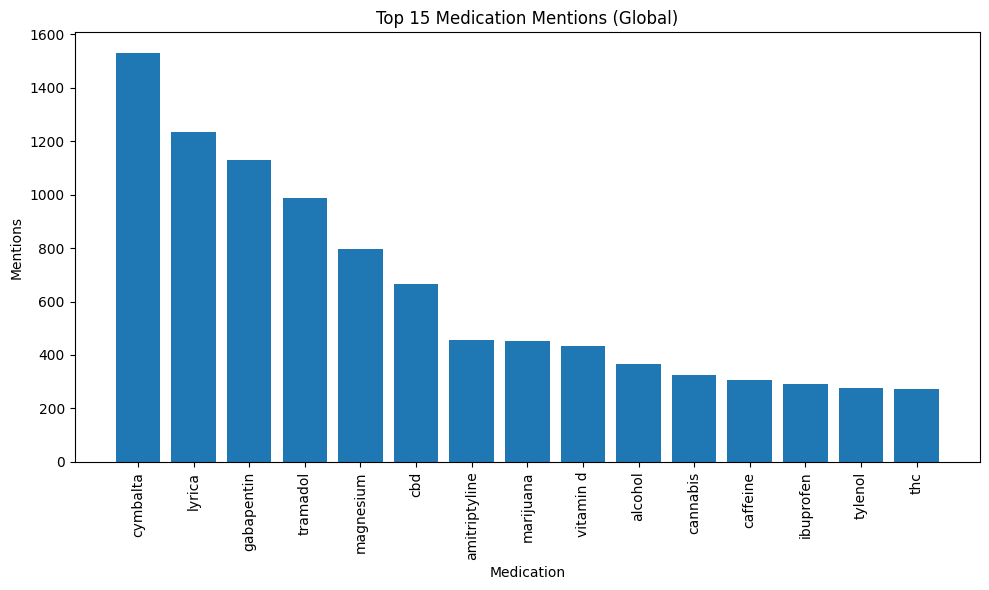

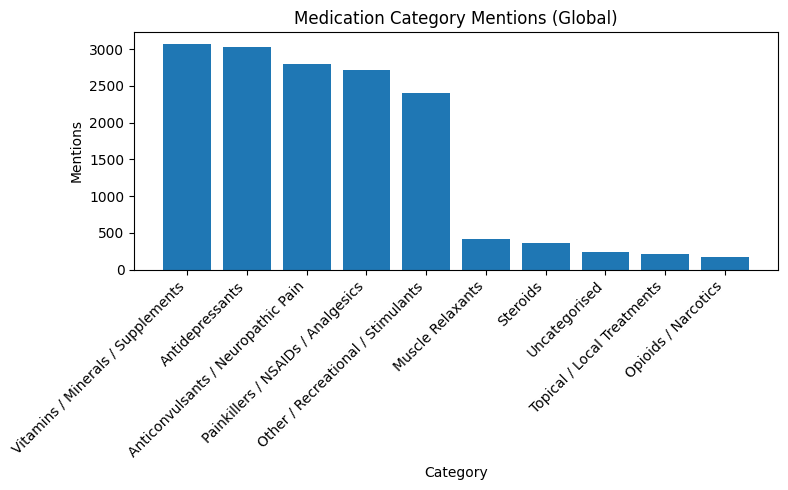

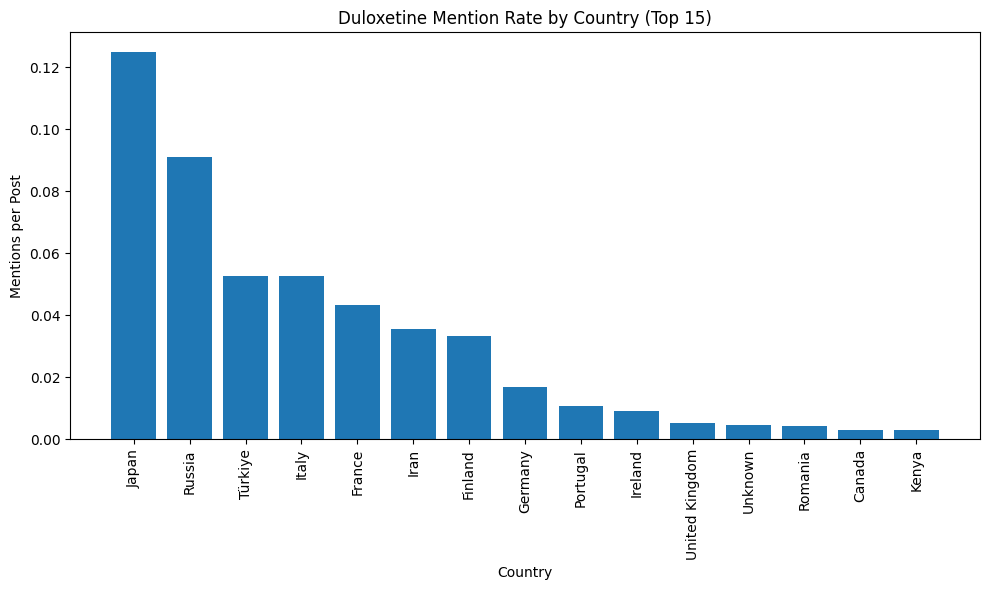

In [ ]:
# Top 15 medications globally (bar chart)
topN = 15
subset = global_counts_df.head(topN)

plt.figure(figsize=(10,6))
plt.bar(subset["medication"], subset["mention_count"])
plt.xticks(rotation=90)
plt.title(f"Top {topN} Medication Mentions (Global)")
plt.xlabel("Medication")
plt.ylabel("Mentions")
plt.tight_layout()
plt.show()

# Category distribution globally (bar chart)
plt.figure(figsize=(8,5))
plt.bar(category_counts_df["category"], category_counts_df["mention_count"])
plt.xticks(rotation=45, ha="right")
plt.title("Medication Category Mentions (Global)")
plt.xlabel("Category")
plt.ylabel("Mentions")
plt.tight_layout()
plt.show()

# Country normalized rates for a target medication (top 15)
target_med = "duloxetine"  # change as needed
sub = (med_country_df[med_country_df["medication"].eq(target_med)]
       .sort_values("mention_rate", ascending=False)
       .head(15))

plt.figure(figsize=(10,6))
plt.bar(sub["country_name"], sub["mention_rate"])
plt.xticks(rotation=90)
plt.title(f"{target_med.title()} Mention Rate by Country (Top 15)")
plt.xlabel("Country")
plt.ylabel("Mentions per Post")
plt.tight_layout()
plt.show()


In [ ]:
# Assuming 'df_clean' has a 'country' column
# The .str.contains() method handles variations and is case-insensitive by default with na=False
df_us = df_clean[df_clean['country_name'].str.contains("United States", case=False, na=False)].copy()
df_uk = df_clean[df_clean['country_name'].str.contains("United Kingdom", case=False, na=False)].copy()

print(f"Created subsets: {len(df_us)} posts from the US and {len(df_uk)} posts from the UK.")

Created subsets: 35523 posts from the US and 10173 posts from the UK.


In [ ]:
import pandas as pd
import plotly.express as px

# --- Prerequisite: Your 'df_clean', 'df_us', 'df_uk', and 'grouped_meds_for_analysis' ---

# Step 1: Create a flattened dictionary for easy lookup: med -> category
med_to_cat = {med: cat for cat, meds in grouped_meds_for_analysis.items() for med in meds}

def find_med_categories(text):
    """Finds all unique medication categories mentioned in a text."""
    found_categories = set()
    for med, cat in med_to_cat.items():
        if med in text:
            found_categories.add(cat)
    return list(found_categories)

# Apply this function to your main dataframe
df_clean['med_categories'] = df_clean['content_clean'].str.lower().apply(find_med_categories)


# Step 2: Recalculate proportions for US and UK subsets
# Explode the lists so each mentioned category gets its own row
us_cats = df_us.explode('med_categories')
uk_cats = df_uk.explode('med_categories')

# Calculate the percentage of posts in each country that mention each category
us_dist = us_cats['med_categories'].value_counts(normalize=True).mul(100).rename('US')
uk_dist = uk_cats['med_categories'].value_counts(normalize=True).mul(100).rename('UK')

# Step 3: Combine and prepare for plotting
location_comparison_df = pd.concat([us_dist, uk_dist], axis=1).fillna(0).reset_index()
df_for_plotting = location_comparison_df.rename(columns={'index': 'Medication Category'})
df_for_plotting = df_for_plotting.melt(
    id_vars='Medication Category',
    var_name='Country',
    value_name='Percentage of Mentions'
)


# Step 4: Visualize the comparison
fig = px.bar(
    df_for_plotting,
    x="Medication Category",
    y="Percentage of Mentions",
    color="Country",
    barmode="group",
    title="Comparison of Medication Category Discussions: US vs. UK",
    labels={'Percentage of Mentions': '% of Posts Mentioning Category'}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

KeyError: 'med_categories'

In [ ]:
import networkx as nx
import plotly.graph_objects as go

# Take the top 50 co-occurring pairs for a clearer graph
top_pairs = co_pairs.head(50)

# Create a graph from the pairs
G = nx.from_pandas_edgelist(top_pairs, 'med_a', 'med_b', ['count'])

# Create positions for each node
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Create edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create node traces
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            title_side='right'
        ),
        line_width=2))

# Add node information
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f'{adjacencies[0]} ({len(adjacencies[1])} connections)')

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Medication Co-occurrence Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Network graph of the top 50 most co-mentioned medications.",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Layout: 'titlefont'

Did you mean "title"?

    Valid properties:
        activeselection
            :class:`plotly.graph_objects.layout.Activeselection`
            instance or dict with compatible properties
        activeshape
            :class:`plotly.graph_objects.layout.Activeshape`
            instance or dict with compatible properties
        annotations
            A tuple of
            :class:`plotly.graph_objects.layout.Annotation`
            instances or dicts with compatible properties
        annotationdefaults
            When used in a template (as
            layout.template.layout.annotationdefaults), sets the
            default property values to use for elements of
            layout.annotations
        autosize
            Determines whether or not a layout width or height that
            has been left undefined by the user is initialized on
            each relayout. Note that, regardless of this attribute,
            an undefined layout width or height is always
            initialized on the first call to plot.
        autotypenumbers
            Using "strict" a numeric string in trace data is not
            converted to a number. Using *convert types* a numeric
            string in trace data may be treated as a number during
            automatic axis `type` detection. This is the default
            value; however it could be overridden for individual
            axes.
        barcornerradius
            Sets the rounding of bar corners. May be an integer
            number of pixels, or a percentage of bar width (as a
            string ending in %).
        bargap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        bargroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        barmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "relative", the bars
            are stacked on top of one another, with negative values
            below the axis, positive values above With "group", the
            bars are plotted next to one another centered around
            the shared location. With "overlay", the bars are
            plotted over one another, you might need to reduce
            "opacity" to see multiple bars.
        barnorm
            Sets the normalization for bar traces on the graph.
            With "fraction", the value of each bar is divided by
            the sum of all values at that location coordinate.
            "percent" is the same but multiplied by 100 to show
            percentages.
        boxgap
            Sets the gap (in plot fraction) between boxes of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        boxgroupgap
            Sets the gap (in plot fraction) between boxes of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        boxmode
            Determines how boxes at the same location coordinate
            are displayed on the graph. If "group", the boxes are
            plotted next to one another centered around the shared
            location. If "overlay", the boxes are plotted over one
            another, you might need to set "opacity" to see them
            multiple boxes. Has no effect on traces that have
            "width" set.
        calendar
            Sets the default calendar system to use for
            interpreting and displaying dates throughout the plot.
        clickmode
            Determines the mode of single click interactions.
            "event" is the default value and emits the
            `plotly_click` event. In addition this mode emits the
            `plotly_selected` event in drag modes "lasso" and
            "select", but with no event data attached (kept for
            compatibility reasons). The "select" flag enables
            selecting single data points via click. This mode also
            supports persistent selections, meaning that pressing
            Shift while clicking, adds to / subtracts from an
            existing selection. "select" with `hovermode`: "x" can
            be confusing, consider explicitly setting `hovermode`:
            "closest" when using this feature. Selection events are
            sent accordingly as long as "event" flag is set as
            well. When the "event" flag is missing, `plotly_click`
            and `plotly_selected` events are not fired.
        coloraxis
            :class:`plotly.graph_objects.layout.Coloraxis` instance
            or dict with compatible properties
        colorscale
            :class:`plotly.graph_objects.layout.Colorscale`
            instance or dict with compatible properties
        colorway
            Sets the default trace colors.
        computed
            Placeholder for exporting automargin-impacting values
            namely `margin.t`, `margin.b`, `margin.l` and
            `margin.r` in "full-json" mode.
        datarevision
            If provided, a changed value tells `Plotly.react` that
            one or more data arrays has changed. This way you can
            modify arrays in-place rather than making a complete
            new copy for an incremental change. If NOT provided,
            `Plotly.react` assumes that data arrays are being
            treated as immutable, thus any data array with a
            different identity from its predecessor contains new
            data.
        dragmode
            Determines the mode of drag interactions. "select" and
            "lasso" apply only to scatter traces with markers or
            text. "orbit" and "turntable" apply only to 3D scenes.
        editrevision
            Controls persistence of user-driven changes in
            `editable: true` configuration, other than trace names
            and axis titles. Defaults to `layout.uirevision`.
        extendfunnelareacolors
            If `true`, the funnelarea slice colors (whether given
            by `funnelareacolorway` or inherited from `colorway`)
            will be extended to three times its original length by
            first repeating every color 20% lighter then each color
            20% darker. This is intended to reduce the likelihood
            of reusing the same color when you have many slices,
            but you can set `false` to disable. Colors provided in
            the trace, using `marker.colors`, are never extended.
        extendiciclecolors
            If `true`, the icicle slice colors (whether given by
            `iciclecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendpiecolors
            If `true`, the pie slice colors (whether given by
            `piecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendsunburstcolors
            If `true`, the sunburst slice colors (whether given by
            `sunburstcolorway` or inherited from `colorway`) will
            be extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendtreemapcolors
            If `true`, the treemap slice colors (whether given by
            `treemapcolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        font
            Sets the global font. Note that fonts used in traces
            and other layout components inherit from the global
            font.
        funnelareacolorway
            Sets the default funnelarea slice colors. Defaults to
            the main `colorway` used for trace colors. If you
            specify a new list here it can still be extended with
            lighter and darker colors, see
            `extendfunnelareacolors`.
        funnelgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        funnelgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        funnelmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "group", the bars
            are plotted next to one another centered around the
            shared location. With "overlay", the bars are plotted
            over one another, you might need to reduce "opacity" to
            see multiple bars.
        geo
            :class:`plotly.graph_objects.layout.Geo` instance or
            dict with compatible properties
        grid
            :class:`plotly.graph_objects.layout.Grid` instance or
            dict with compatible properties
        height
            Sets the plot's height (in px).
        hiddenlabels
            hiddenlabels is the funnelarea & pie chart analog of
            visible:'legendonly' but it can contain many labels,
            and can simultaneously hide slices from several
            pies/funnelarea charts
        hiddenlabelssrc
            Sets the source reference on Chart Studio Cloud for
            `hiddenlabels`.
        hidesources
            Determines whether or not a text link citing the data
            source is placed at the bottom-right cored of the
            figure. Has only an effect only on graphs that have
            been generated via forked graphs from the Chart Studio
            Cloud (at https://chart-studio.plotly.com or on-
            premise).
        hoverdistance
            Sets the default distance (in pixels) to look for data
            to add hover labels (-1 means no cutoff, 0 means no
            looking for data). This is only a real distance for
            hovering on point-like objects, like scatter points.
            For area-like objects (bars, scatter fills, etc)
            hovering is on inside the area and off outside, but
            these objects will not supersede hover on point-like
            objects in case of conflict.
        hoverlabel
            :class:`plotly.graph_objects.layout.Hoverlabel`
            instance or dict with compatible properties
        hovermode
            Determines the mode of hover interactions. If
            "closest", a single hoverlabel will appear for the
            "closest" point within the `hoverdistance`. If "x" (or
            "y"), multiple hoverlabels will appear for multiple
            points at the "closest" x- (or y-) coordinate within
            the `hoverdistance`, with the caveat that no more than
            one hoverlabel will appear per trace. If *x unified*
            (or *y unified*), a single hoverlabel will appear
            multiple points at the closest x- (or y-) coordinate
            within the `hoverdistance` with the caveat that no more
            than one hoverlabel will appear per trace. In this
            mode, spikelines are enabled by default perpendicular
            to the specified axis. If false, hover interactions are
            disabled.
        hoversubplots
            Determines expansion of hover effects to other subplots
            If "single" just the axis pair of the primary point is
            included without overlaying subplots. If "overlaying"
            all subplots using the main axis and occupying the same
            space are included. If "axis", also include stacked
            subplots using the same axis when `hovermode` is set to
            "x", *x unified*, "y" or *y unified*.
        iciclecolorway
            Sets the default icicle slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendiciclecolors`.
        images
            A tuple of :class:`plotly.graph_objects.layout.Image`
            instances or dicts with compatible properties
        imagedefaults
            When used in a template (as
            layout.template.layout.imagedefaults), sets the default
            property values to use for elements of layout.images
        legend
            :class:`plotly.graph_objects.layout.Legend` instance or
            dict with compatible properties
        map
            :class:`plotly.graph_objects.layout.Map` instance or
            dict with compatible properties
        mapbox
            :class:`plotly.graph_objects.layout.Mapbox` instance or
            dict with compatible properties
        margin
            :class:`plotly.graph_objects.layout.Margin` instance or
            dict with compatible properties
        meta
            Assigns extra meta information that can be used in
            various `text` attributes. Attributes such as the
            graph, axis and colorbar `title.text`, annotation
            `text` `trace.name` in legend items, `rangeselector`,
            `updatemenus` and `sliders` `label` text all support
            `meta`. One can access `meta` fields using template
            strings: `%{meta[i]}` where `i` is the index of the
            `meta` item in question. `meta` can also be an object
            for example `{key: value}` which can be accessed
            %{meta[key]}.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        minreducedheight
            Minimum height of the plot with margin.automargin
            applied (in px)
        minreducedwidth
            Minimum width of the plot with margin.automargin
            applied (in px)
        modebar
            :class:`plotly.graph_objects.layout.Modebar` instance
            or dict with compatible properties
        newselection
            :class:`plotly.graph_objects.layout.Newselection`
            instance or dict with compatible properties
        newshape
            :class:`plotly.graph_objects.layout.Newshape` instance
            or dict with compatible properties
        paper_bgcolor
            Sets the background color of the paper where the graph
            is drawn.
        piecolorway
            Sets the default pie slice colors. Defaults to the main
            `colorway` used for trace colors. If you specify a new
            list here it can still be extended with lighter and
            darker colors, see `extendpiecolors`.
        plot_bgcolor
            Sets the background color of the plotting area in-
            between x and y axes.
        polar
            :class:`plotly.graph_objects.layout.Polar` instance or
            dict with compatible properties
        scattergap
            Sets the gap (in plot fraction) between scatter points
            of adjacent location coordinates. Defaults to `bargap`.
        scattermode
            Determines how scatter points at the same location
            coordinate are displayed on the graph. With "group",
            the scatter points are plotted next to one another
            centered around the shared location. With "overlay",
            the scatter points are plotted over one another, you
            might need to reduce "opacity" to see multiple scatter
            points.
        scene
            :class:`plotly.graph_objects.layout.Scene` instance or
            dict with compatible properties
        selectdirection
            When `dragmode` is set to "select", this limits the
            selection of the drag to horizontal, vertical or
            diagonal. "h" only allows horizontal selection, "v"
            only vertical, "d" only diagonal and "any" sets no
            limit.
        selectionrevision
            Controls persistence of user-driven changes in selected
            points from all traces.
        selections
            A tuple of
            :class:`plotly.graph_objects.layout.Selection`
            instances or dicts with compatible properties
        selectiondefaults
            When used in a template (as
            layout.template.layout.selectiondefaults), sets the
            default property values to use for elements of
            layout.selections
        separators
            Sets the decimal and thousand separators. For example,
            *. * puts a '.' before decimals and a space between
            thousands. In English locales, dflt is ".," but other
            locales may alter this default.
        shapes
            A tuple of :class:`plotly.graph_objects.layout.Shape`
            instances or dicts with compatible properties
        shapedefaults
            When used in a template (as
            layout.template.layout.shapedefaults), sets the default
            property values to use for elements of layout.shapes
        showlegend
            Determines whether or not a legend is drawn. Default is
            `true` if there is a trace to show and any of these: a)
            Two or more traces would by default be shown in the
            legend. b) One pie trace is shown in the legend. c) One
            trace is explicitly given with `showlegend: true`.
        sliders
            A tuple of :class:`plotly.graph_objects.layout.Slider`
            instances or dicts with compatible properties
        sliderdefaults
            When used in a template (as
            layout.template.layout.sliderdefaults), sets the
            default property values to use for elements of
            layout.sliders
        smith
            :class:`plotly.graph_objects.layout.Smith` instance or
            dict with compatible properties
        spikedistance
            Sets the default distance (in pixels) to look for data
            to draw spikelines to (-1 means no cutoff, 0 means no
            looking for data). As with hoverdistance, distance does
            not apply to area-like objects. In addition, some
            objects can be hovered on but will not generate
            spikelines, such as scatter fills.
        sunburstcolorway
            Sets the default sunburst slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendsunburstcolors`.
        template
            Default attributes to be applied to the plot. This
            should be a dict with format: `{'layout':
            layoutTemplate, 'data': {trace_type: [traceTemplate,
            ...], ...}}` where `layoutTemplate` is a dict matching
            the structure of `figure.layout` and `traceTemplate` is
            a dict matching the structure of the trace with type
            `trace_type` (e.g. 'scatter'). Alternatively, this may
            be specified as an instance of
            plotly.graph_objs.layout.Template.  Trace templates are
            applied cyclically to traces of each type. Container
            arrays (eg `annotations`) have special handling: An
            object ending in `defaults` (eg `annotationdefaults`)
            is applied to each array item. But if an item has a
            `templateitemname` key we look in the template array
            for an item with matching `name` and apply that
            instead. If no matching `name` is found we mark the
            item invisible. Any named template item not referenced
            is appended to the end of the array, so this can be
            used to add a watermark annotation or a logo image, for
            example. To omit one of these items on the plot, make
            an item with matching `templateitemname` and `visible:
            false`.
        ternary
            :class:`plotly.graph_objects.layout.Ternary` instance
            or dict with compatible properties
        title
            :class:`plotly.graph_objects.layout.Title` instance or
            dict with compatible properties
        transition
            Sets transition options used during Plotly.react
            updates.
        treemapcolorway
            Sets the default treemap slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendtreemapcolors`.
        uirevision
            Used to allow user interactions with the plot to
            persist after `Plotly.react` calls that are unaware of
            these interactions. If `uirevision` is omitted, or if
            it is given and it changed from the previous
            `Plotly.react` call, the exact new figure is used. If
            `uirevision` is truthy and did NOT change, any
            attribute that has been affected by user interactions
            and did not receive a different value in the new figure
            will keep the interaction value. `layout.uirevision`
            attribute serves as the default for `uirevision`
            attributes in various sub-containers. For finer control
            you can set these sub-attributes directly. For example,
            if your app separately controls the data on the x and y
            axes you might set `xaxis.uirevision=*time*` and
            `yaxis.uirevision=*cost*`. Then if only the y data is
            changed, you can update `yaxis.uirevision=*quantity*`
            and the y axis range will reset but the x axis range
            will retain any user-driven zoom.
        uniformtext
            :class:`plotly.graph_objects.layout.Uniformtext`
            instance or dict with compatible properties
        updatemenus
            A tuple of
            :class:`plotly.graph_objects.layout.Updatemenu`
            instances or dicts with compatible properties
        updatemenudefaults
            When used in a template (as
            layout.template.layout.updatemenudefaults), sets the
            default property values to use for elements of
            layout.updatemenus
        violingap
            Sets the gap (in plot fraction) between violins of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        violingroupgap
            Sets the gap (in plot fraction) between violins of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        violinmode
            Determines how violins at the same location coordinate
            are displayed on the graph. If "group", the violins are
            plotted next to one another centered around the shared
            location. If "overlay", the violins are plotted over
            one another, you might need to set "opacity" to see
            them multiple violins. Has no effect on traces that
            have "width" set.
        waterfallgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        waterfallgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        waterfallmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "group", the bars are
            plotted next to one another centered around the shared
            location. With "overlay", the bars are plotted over one
            another, you might need to reduce "opacity" to see
            multiple bars.
        width
            Sets the plot's width (in px).
        xaxis
            :class:`plotly.graph_objects.layout.XAxis` instance or
            dict with compatible properties
        yaxis
            :class:`plotly.graph_objects.layout.YAxis` instance or
            dict with compatible properties
        
Did you mean "title"?

Bad property path:
titlefont_size
^^^^^^^^^

In [ ]:
import pandas as pd
import plotly.express as px
from tqdm.auto import tqdm

# --- Prerequisite: Your 'df_clean', 'df_us', 'df_uk', and 'medications_content_clean' list ---
medications_list = medications_content_clean

# --- Step 1: Find the overall Top 15 most discussed medications ---
tqdm.pandas(desc="Counting Overall Frequencies")
overall_counts = pd.Series({med: df_clean['content_clean'].str.contains(med, case=False).sum() for med in tqdm(medications_list, desc="Processing Meds")})
top_15_meds = overall_counts.nlargest(15).index.tolist()

print("--- Top 15 Most Discussed Medications (Overall) ---")
print(overall_counts.nlargest(15))


# --- Step 2: Calculate mention percentage for the Top 15 in US and UK ---
us_percentages = {med: (df_us['content_clean'].str.contains(med, case=False).sum() / len(df_us)) * 100 for med in top_15_meds}
uk_percentages = {med: (df_uk['content_clean'].str.contains(med, case=False).sum() / len(df_uk)) * 100 for med in top_15_meds}

# --- Step 3: Combine results and prepare for plotting ---
us_df = pd.DataFrame(list(us_percentages.items()), columns=['Medication', 'Percentage']).assign(Country='US')
uk_df = pd.DataFrame(list(uk_percentages.items()), columns=['Medication', 'Percentage']).assign(Country='UK')
location_comparison_df = pd.concat([us_df, uk_df])


# --- Step 4: Visualize the comparison ---
fig = px.bar(
    location_comparison_df,
    x="Medication",
    y="Percentage",
    color="Country",
    barmode="group",
    title="Prevalence of Top 15 Medication Discussions: US vs. UK",
    labels={'Percentage': '% of Posts Mentioning Medication', 'Medication': ''}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Processing Meds:   0%|          | 0/96 [00:00<?, ?it/s]

--- Top 15 Most Discussed Medications (Overall) ---
ldn              3977
cymbalta         1531
lyrica           1237
gabapentin       1150
tramadol          992
magnesium         911
iron              693
cbd               673
vitamin d         513
amitriptyline     455
marijuana         454
thc               446
alcohol           412
steroid           348
cannabis          326
dtype: int64


In [ ]:
df_emotion_sample = pd.read_csv('merged_emotion_analysis_result.csv')

In [ ]:
# Assume 'df_emotion_sample' is your 99-row dataframe with emotion labels
# and 'top_15_meds' is the list from the previous step.

# 1. Get a smaller list of the Top 5-7 drugs for a clearer chart
top_drugs_for_emotion = top_15_meds[:7]

emotion_per_drug = {}

# 2. Loop through each drug to find posts in the sample and aggregate emotions
for drug in top_drugs_for_emotion:
    drug_posts_in_sample = df_emotion_sample[df_emotion_sample['full_text'].str.contains(drug, case=False)]

    if not drug_posts_in_sample.empty:
        emotion_counts = drug_posts_in_sample.assign(emotion=drug_posts_in_sample['emotions'].str.split(', '))\
                                             .explode('emotion')['emotion'].str.strip().value_counts()
        emotion_per_drug[drug] = emotion_counts

# 3. Convert results for analysis and plotting
emotion_per_drug_df = pd.DataFrame(emotion_per_drug).fillna(0).astype(int)

print("\n--- Emotion Counts for Top Medications (from 99-post sample) ---")
print(emotion_per_drug_df)

# 4. Visualize as a normalized stacked bar chart
if not emotion_per_drug_df.empty:
    emotion_per_drug_percent = emotion_per_drug_df.div(emotion_per_drug_df.sum(axis=0), axis=1) * 100

    fig_emotions = px.bar(
        emotion_per_drug_percent.T,
        title='Emotional Profile of Top Discussed Medications',
        labels={'value': '% of Emotions Mentioned', 'index': 'Medication'}
    )
    fig_emotions.show()


--- Emotion Counts for Top Medications (from 99-post sample) ---
                       ldn  tramadol  iron
emotion                                   
Acceptance/Resilience    4         1     2
Anxiety/Worry            5         1     1
Despair/Hopelessness     3         1     0
Empathy                  5         1     2
Frustration              4         1     0
Gratitude                4         1     0
Hope/Optimism            6         1     1
Isolation/Loneliness     2         1     0
Pain-Related Distress    3         1     0
Relief                   2         1     1
Support-Offering         9         1     2
Support-Seeking          3         0     0


In [ ]:
# Final master list from your extraction (drugs, meds, supplements, etc.)
medications_content_clean = [
    'acetaminophen','advil','alcohol','aloe vera','amino acid','amitriptyline',
    'arnica cream','baclofen','buprenorphine','caffeine','calcium','cannabis',
    'capsaicin','cbd','celecoxib','chondroitin','codeine','coenzyme q10','coq10',
    'cyclobenzaprine','cymbalta','desipramine','diclofenac','duloxetine','effexor',
    'etoricoxib','fentanyl','fish oil','flexeril','fluoxetine','folic acid',
    'gabapentin','ginger tea','glucosamine','grape seed','green tea','hydrocodone',
    'hydromorphone','ibuprofen','imipramine','indomethacin','iron','ketamine',
    'ketoprofen','lamotrigine','ldn','lidocaine','lyrica','magnesium',
    'magnesium citrate','magnesium glycinate','magnesium malate','marijuana',
    'melatonin','meloxicam','meperidine','metaxalone','methadone','methocarbamol',
    'milnacipran','morphine','naltrexone','naproxen','neurontin','nicotine',
    'nortriptyline','omega 3','oxycodone','paracetamol','piroxicam','pregabalin',
    'prozac','robaxin','savella','seed extract','sertraline','steroid','steroids',
    'tapentadol','thc','tizanidine','topiramate','tramadol','tylenol','venlafaxine',
    'vitamin a','vitamin b','vitamin b1','vitamin b12','vitamin b6','vitamin c',
    'vitamin d','vitamin d3','vitamin e','zinc','zoloft'
]

In [ ]:
import pandas as pd
import numpy as np

def analyze_medications_by_country(df, medications_list):
    results = []

    # Get unique countries from your country_name column, excluding "Unknown"
    for country in df['country_name'].unique():
        if pd.isna(country) or country == "Unknown":  # Skip NaN and "Unknown" countries
            continue

        country_data = df[df['country_name'] == country]['content_clean'].dropna()
        country_med_counts = {}

        for med in medications_list:
            count = country_data.str.lower().str.contains(med, na=False).sum()
            if count > 0:
                country_med_counts[med] = count

        for med, count in country_med_counts.items():
            results.append({
                'Country': country,
                'Medication': med,
                'Count': count,
                'Total_Posts': len(country_data),
                'Mention_Rate': (count / len(country_data)) * 100 if len(country_data) > 0 else 0
            })

    return pd.DataFrame(results)

# Run the analysis with your medications list
medications_content_clean = [ 'acetaminophen','advil','alcohol','aloe vera','amino acid','amitriptyline', 'arnica cream','baclofen','buprenorphine','caffeine','calcium','cannabis', 'capsaicin','cbd','celecoxib','chondroitin','codeine','coenzyme q10','coq10', 'cyclobenzaprine','cymbalta','desipramine','diclofenac','duloxetine','effexor', 'etoricoxib','fentanyl','fish oil','flexeril','fluoxetine','folic acid', 'gabapentin','ginger tea','glucosamine','grape seed','green tea','hydrocodone', 'hydromorphone','ibuprofen','imipramine','indomethacin','iron','ketamine', 'ketoprofen','lamotrigine','ldn','lidocaine','lyrica','magnesium', 'magnesium citrate','magnesium glycinate','magnesium malate','marijuana', 'melatonin','meloxicam','meperidine','metaxalone','methadone','methocarbamol', 'milnacipran','morphine','naltrexone','naproxen','neurontin','nicotine', 'nortriptyline','omega 3','oxycodone','paracetamol','piroxicam','pregabalin', 'prozac','robaxin','savella','seed extract','sertraline','steroid','steroids', 'tapentadol','thc','tizanidine','topiramate','tramadol','tylenol','venlafaxine', 'vitamin a','vitamin b','vitamin b1','vitamin b12','vitamin b6','vitamin c', 'vitamin d','vitamin d3','vitamin e','zinc','zoloft' ]

# Perform the analysis
df_med_country = analyze_medications_by_country(df_clean, medications_content_clean)

# Display results
print("Medication mentions by country analysis (excluding 'Unknown'):")
print(df_med_country.head(20))

# Summary by country
print("\nCountry summary (excluding 'Unknown'):")
country_summary = df_med_country.groupby('Country').agg({
    'Count': 'sum',
    'Medication': 'count',
    'Total_Posts': 'first'
}).rename(columns={'Medication': 'Unique_Medications'}).reset_index()
country_summary['Medications_per_Post'] = country_summary['Count'] / country_summary['Total_Posts']
print(country_summary.sort_values('Count', ascending=False))


Medication mentions by country analysis (excluding 'Unknown'):
          Country       Medication  Count  Total_Posts  Mention_Rate
0   United States    acetaminophen     34        35479      0.095831
1   United States            advil     97        35479      0.273401
2   United States          alcohol    234        35479      0.659545
3   United States        aloe vera      9        35479      0.025367
4   United States       amino acid     24        35479      0.067646
5   United States    amitriptyline    113        35479      0.318498
6   United States     arnica cream      8        35479      0.022549
7   United States         baclofen     42        35479      0.118380
8   United States    buprenorphine      1        35479      0.002819
9   United States         caffeine    171        35479      0.481975
10  United States          calcium    117        35479      0.329773
11  United States         cannabis    219        35479      0.617267
12  United States        capsaicin     1

In [ ]:
# --- Find and display posts containing 'ldn' ---

# Filter your main dataframe for posts where 'content_clean' contains 'ldn'
# We use case=False to catch both 'ldn' and 'LDN'
ldn_posts = df_clean[df_clean['content_clean'].str.contains(r'\bldn\b', case=False, na=False)].copy()

print(f"Found {len(ldn_posts)} posts that mention 'ldn'.")
print("--- Here are 3 random examples: ---")


# Display 3 random samples from the results
# The 'full_text' column contains the original, readable post content
# min(3, len(ldn_posts)) prevents an error if fewer than 3 posts are found
for index, row in ldn_posts.sample(min(3, len(ldn_posts))).iterrows():
    print(f"\n==================== Post ID: {row['post_id']} ====================")
    print(row['content_clean'])

Found 129 posts that mention 'ldn'.
--- Here are 3 random examples: ---

==================== Post ID: post-294106 ====================
i have been doing a lot of reading about new breakthroughs in fibro treatment. some of them include using a medication that is for alcoholics and opiate users to help block the effects of the drug in their brain so they can stop using them. it's called ldn or naltrexone. people have had great success with that for fibro and ms. it works similarly to nmda inhibitors, which help change the way we process pain in the brain. there drugs work well on a subset of fibro patients, because i think everyone's cause of fibromyalgia is different. has anyone else read about these? when i see my doc after i move, i am going to ask to be put on one of these. i'm curious about safety, because nmda inhibitors can be risky. these include ketamine, mematine, dextromethorphan, etc. dextromethorphan is a common ingredient in cough medicine, and form what i've read, you sho

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# First, get the top 20 medications overall
top_20_medications = df_med_country.groupby('Medication')['Count'].sum().nlargest(20).index.tolist()

# Get the top 20 countries by total medication mentions
top_20_countries = df_med_country.groupby('Country')['Count'].sum().nlargest(20).index.tolist()

# Filter the data to include only top 20 medications and top 20 countries
df_top_20_filtered = df_med_country[
    (df_med_country['Medication'].isin(top_20_medications)) &
    (df_med_country['Country'].isin(top_20_countries))
]

print("Top 20 Medications:")
print(df_med_country.groupby('Medication')['Count'].sum().nlargest(20))

print("\nTop 20 Countries:")
print(df_med_country.groupby('Country')['Count'].sum().nlargest(20))

print(f"\nFiltered dataset size: {len(df_top_20_filtered)} rows")


Top 20 Medications:
Medication
ldn              3977
cymbalta         1531
lyrica           1237
gabapentin       1150
tramadol          992
magnesium         911
iron              693
cbd               673
vitamin d         513
amitriptyline     455
marijuana         454
thc               446
alcohol           412
steroid           348
cannabis          326
caffeine          307
ibuprofen         293
tylenol           281
savella           268
duloxetine        251
Name: Count, dtype: int64

Top 20 Countries:
Country
United States     11754
United Kingdom     2340
Canada             1717
Germany            1683
Unknown            1278
Australia           476
Portugal            327
Netherlands         265
Kenya               125
Europe               98
New Zealand          88
India                82
Türkiye              44
Greece               30
South Africa         28
France               24
Romania              24
Finland              21
Russia               21
Singapore           

In [ ]:
count_series.head(20)

ldn              3977
cymbalta         1531
lyrica           1237
gabapentin       1150
tramadol          992
magnesium         911
iron              693
cbd               673
vitamin d         513
amitriptyline     455
marijuana         454
thc               446
alcohol           412
steroid           348
cannabis          326
caffeine          307
ibuprofen         293
tylenol           281
savella           268
duloxetine        251
dtype: int64


Horizontal bar plot of top 20 medications saved as 'medication_bar_plot_top20.png'. Open it to view the visualization.


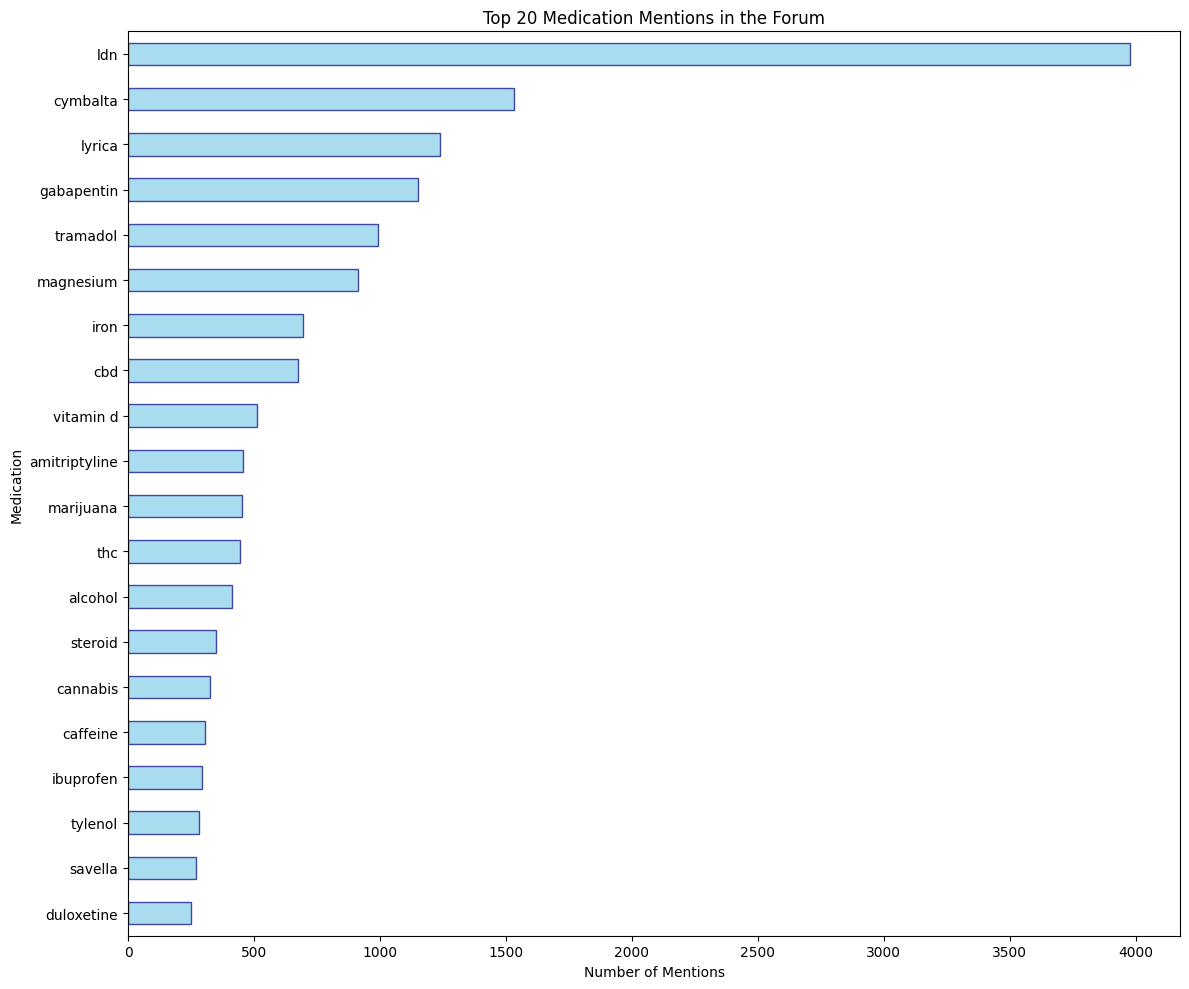

In [ ]:
# Bar Plot: Visualize top 20 medications horizontally
top_20_counts = count_series[count_series > 0].head(20)  # Filter to top 20 with mentions
plt.figure(figsize=(12, 10))
top_20_counts.sort_values().plot(kind='barh', color='skyblue', edgecolor='navy', alpha=0.7)  # Horizontal bar
plt.title('Top 20 Medication Mentions in the Forum')
plt.xlabel('Number of Mentions')
plt.ylabel('Medication')
plt.tight_layout()
plt.savefig('medication_bar_plot_top20.png')  # Save as image
print("\nHorizontal bar plot of top 20 medications saved as 'medication_bar_plot_top20.png'. Open it to view the visualization.")

Word cloud saved as 'medication_wordcloud.png'. Open it to view the visualization.


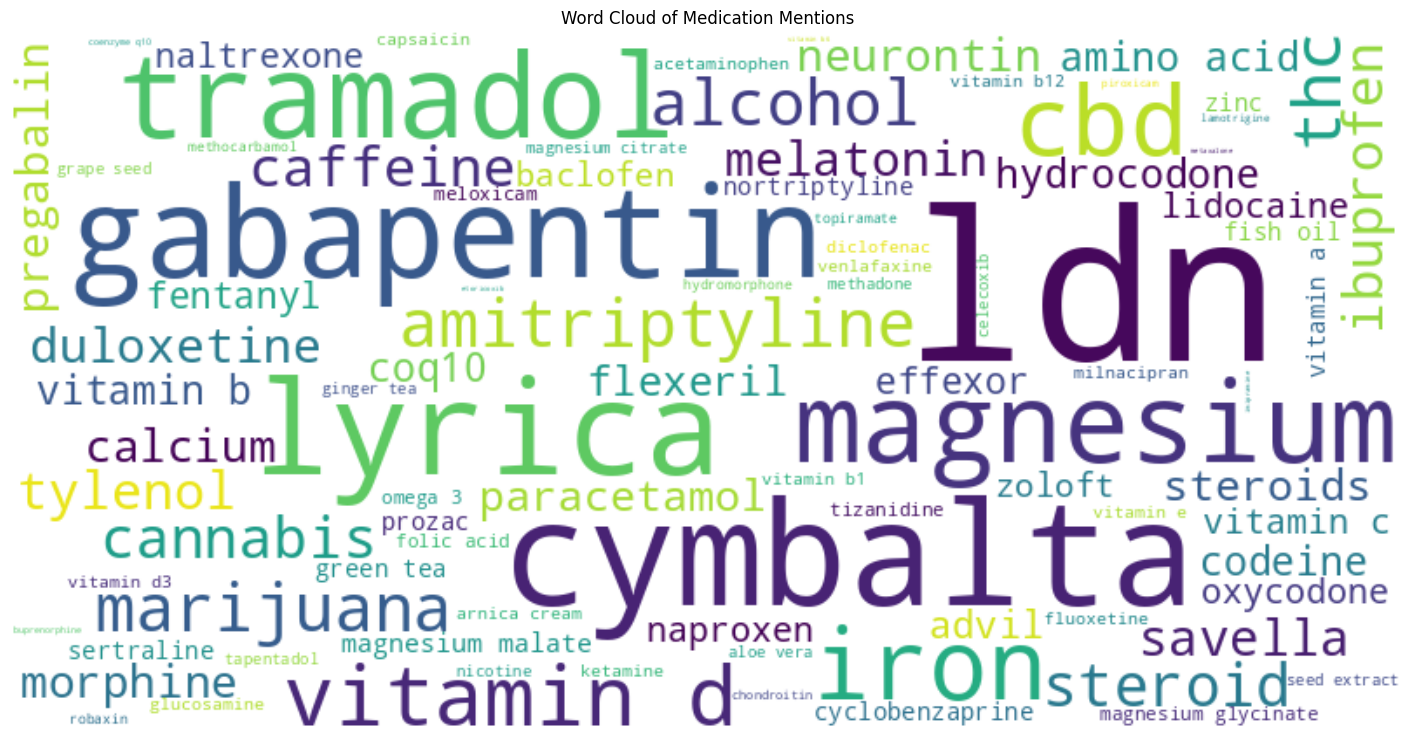

In [ ]:
# Word Cloud (if library available)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(counts)
plt.figure(figsize=(18, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Medication Mentions')
plt.savefig('medication_wordcloud.png', bbox_inches='tight', dpi=300, facecolor='white')  # Save as image
print("Word cloud saved as 'medication_wordcloud.png'. Open it to view the visualization.")

In [ ]:
# --- Find and display posts containing 'ldn' ---

# Filter your main dataframe for posts where 'content_clean' contains 'ldn'
# We use case=False to catch both 'ldn' and 'LDN'
ldn_posts = df_clean[df_clean['content_clean'].str.contains(r'\bldn\b', case=False, na=False)].copy()

print(f"Found {len(ldn_posts)} posts that mention 'ldn'.")
print("--- Here are 3 random examples: ---")


# Display 3 random samples from the results
# The 'full_text' column contains the original, readable post content
# min(3, len(ldn_posts)) prevents an error if fewer than 3 posts are found
for index, row in ldn_posts.sample(min(3, len(ldn_posts))).iterrows():
    print(f"\n==================== Post ID: {row['post_id']} ====================")
    print(row['content_clean'])

Found 129 posts that mention 'ldn'.
--- Here are 3 random examples: ---

==================== Post ID: post-287428 ====================
i hope you find some people near you hashik. ldn is not used in uk unless you can find a doctor who will prescribe it privately which is rare. does it help the pain?i have heard of it but don't know of anyone who uses it. its usually a drug for recovering drug addicts i think but i know research has found it helps ms and fibro wecome.

==================== Post ID: post-282105 ====================
hi- i am a new member to this forum support group. i have been taking low dose naltrexone for my fms pain for almost 2 years. ldn is a trace amount (4.5 mg. or less) of naltrexone. it's an old drug and therefore no drug companies are pushing doctors to prescribe it. i had found out about it from a study that i researched from stamford university. i have no side affects from it and i was only able to find one dr. in nyc who would prescribe it to me. no one els

In [ ]:
import pandas as pd
import plotly.express as px
from tqdm.auto import tqdm

# --- Prerequisite: Your 'df_clean' dataframe and your 'medications_content_clean' list ---
medications_list = medications_content_clean # Using the variable name from your previous code

# --- Step 1: Create the US and UK subsets ---
df_us = df_clean[df_clean['country_name'].str.contains("United States", case=False, na=False)].copy()
df_uk = df_clean[df_clean['country_name'].str.contains("United Kingdom", case=False, na=False)].copy()

print(f"Analyzing {len(df_us)} posts from the US and {len(df_uk)} posts from the UK.")

# --- Step 2: Calculate frequencies and percentages for each country ---
results = []
for med in tqdm(medications_list, desc="Processing Medications"):
    # Calculate for US
    us_count = df_us['content_clean'].str.contains(med, case=False).sum()
    us_percent = (us_count / len(df_us)) * 100 if len(df_us) > 0 else 0

    # Calculate for UK
    uk_count = df_uk['content_clean'].str.contains(med, case=False).sum()
    uk_percent = (uk_count / len(df_uk)) * 100 if len(df_uk) > 0 else 0

    results.append({
        'Medication': med,
        'US Mentions': us_count,
        'US %': us_percent,
        'UK Mentions': uk_count,
        'UK %': uk_percent
    })

# --- Step 3: Create a comparison DataFrame ---
comparison_df = pd.DataFrame(results)
# Sort by the total number of mentions to see the most prominent drugs first
comparison_df['Total Mentions'] = comparison_df['US Mentions'] + comparison_df['UK Mentions']
comparison_df = comparison_df.sort_values(by='Total Mentions', ascending=False).drop(columns=['Total Mentions'])

print("\n--- Medication Mentions: US vs. UK Comparison ---")
# Display the top 20
display(comparison_df.head(20))


# --- Step 4: Visualize the comparison for the Top 20 Medications ---
top_20_df = comparison_df.head(20)
df_for_plotting = top_20_df[['Medication', 'US %', 'UK %']].melt(
    id_vars='Medication',
    var_name='Country',
    value_name='Percentage'
)

fig = px.bar(
    df_for_plotting,
    x="Medication",
    y="Percentage",
    color="Country",
    barmode="group",
    title="Comparison of Top Medication Discussions: US vs. UK",
    labels={'Percentage': '% of Posts Mentioning Medication'}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Analyzing 35523 posts from the US and 10173 posts from the UK.


Processing Medications:   0%|          | 0/96 [00:00<?, ?it/s]


--- Medication Mentions: US vs. UK Comparison ---


Medication  US Mentions      US %  UK Mentions      UK %
45            ldn         2155  6.066492          513  5.042760
20       cymbalta         1104  3.107846           19  0.186769
31     gabapentin          760  2.139459          150  1.474491
47         lyrica          822  2.313994           51  0.501327
82       tramadol          538  1.514512          286  2.811363
48      magnesium          475  1.337162           65  0.638946
13            cbd          396  1.114771           63  0.619286
41           iron          311  0.875489          101  0.992824
91      vitamin d          316  0.889565           59  0.579967
52      marijuana          296  0.833263           17  0.167109
79            thc          270  0.760071           27  0.265408
2         alcohol          234  0.658728           39  0.383368
76        steroid          205  0.577091           54  0.530817
11       cannabis          219  0.616502           33  0.324388
5   amitriptyline          113  0.318104          136  1.336872
38      ibuprofen          192  0.540495           37  0.363708
9        caffeine          171  0.481378           51  0.501327
73        savella          218  0.613687            4  0.039320
83        tylenol          195  0.548940            8  0.078640
63      neurontin          168  0.472933            4  0.039320

In [ ]:
import pandas as pd
import numpy as np

def analyze_medications_by_country(df, medications_list):
    results = []

    # Get unique countries from your country_name column, excluding "Unknown"
    for country in df['country_name'].unique():
        if pd.isna(country) or country == "Unknown":  # Skip NaN and "Unknown" countries
            continue

        country_data = df[df['country_name'] == country]['content_clean'].dropna()
        country_med_counts = {}

        for med in medications_list:
            count = country_data.str.lower().str.contains(med, na=False).sum()
            if count > 0:
                country_med_counts[med] = count

        for med, count in country_med_counts.items():
            results.append({
                'Country': country,
                'Medication': med,
                'Count': count,
                'Total_Posts': len(country_data),
                'Mention_Rate': (count / len(country_data)) * 100 if len(country_data) > 0 else 0
            })

    return pd.DataFrame(results)

# Run the analysis with your medications list
medications_content_clean = [ 'acetaminophen','advil','alcohol','aloe vera','amino acid','amitriptyline', 'arnica cream','baclofen','buprenorphine','caffeine','calcium','cannabis', 'capsaicin','cbd','celecoxib','chondroitin','codeine','coenzyme q10','coq10', 'cyclobenzaprine','cymbalta','desipramine','diclofenac','duloxetine','effexor', 'etoricoxib','fentanyl','fish oil','flexeril','fluoxetine','folic acid', 'gabapentin','ginger tea','glucosamine','grape seed','green tea','hydrocodone', 'hydromorphone','ibuprofen','imipramine','indomethacin','iron','ketamine', 'ketoprofen','lamotrigine','ldn','lidocaine','lyrica','magnesium', 'magnesium citrate','magnesium glycinate','magnesium malate','marijuana', 'melatonin','meloxicam','meperidine','metaxalone','methadone','methocarbamol', 'milnacipran','morphine','naltrexone','naproxen','neurontin','nicotine', 'nortriptyline','omega 3','oxycodone','paracetamol','piroxicam','pregabalin', 'prozac','robaxin','savella','seed extract','sertraline','steroid','steroids', 'tapentadol','thc','tizanidine','topiramate','tramadol','tylenol','venlafaxine', 'vitamin a','vitamin b','vitamin b1','vitamin b12','vitamin b6','vitamin c', 'vitamin d','vitamin d3','vitamin e','zinc','zoloft' ]

# Perform the analysis
df_med_country = analyze_medications_by_country(df_clean, medications_content_clean)

# Display results
print("Medication mentions by country analysis (excluding 'Unknown'):")
print(df_med_country.head(20))

# Summary by country
print("\nCountry summary (excluding 'Unknown'):")
country_summary = df_med_country.groupby('Country').agg({
    'Count': 'sum',
    'Medication': 'count',
    'Total_Posts': 'first'
}).rename(columns={'Medication': 'Unique_Medications'}).reset_index()
country_summary['Medications_per_Post'] = country_summary['Count'] / country_summary['Total_Posts']
print(country_summary.sort_values('Count', ascending=False))


Medication mentions by country analysis (excluding 'Unknown'):
          Country       Medication  Count  Total_Posts  Mention_Rate
0   United States    acetaminophen     34        35479      0.095831
1   United States            advil     97        35479      0.273401
2   United States          alcohol    234        35479      0.659545
3   United States        aloe vera      9        35479      0.025367
4   United States       amino acid     24        35479      0.067646
5   United States    amitriptyline    113        35479      0.318498
6   United States     arnica cream      8        35479      0.022549
7   United States         baclofen     42        35479      0.118380
8   United States    buprenorphine      1        35479      0.002819
9   United States         caffeine    171        35479      0.481975
10  United States          calcium    117        35479      0.329773
11  United States         cannabis    219        35479      0.617267
12  United States        capsaicin     1

In [ ]:
# Get the top 20 medications overall (unchanged)
top_20_medications = df_med_country.groupby('Medication')['Count'].sum().nlargest(20).index.tolist()

# Get the top 20 countries by total medication mentions (now excludes "Unknown")
top_20_countries = df_med_country.groupby('Country')['Count'].sum().nlargest(20).index.tolist()

# Filter the data to include only top 20 medications and top 20 countries
df_top_20_filtered = df_med_country[
    (df_med_country['Medication'].isin(top_20_medications)) &
    (df_med_country['Country'].isin(top_20_countries))
]

print("Top 20 Medications:")
print(df_med_country.groupby('Medication')['Count'].sum().nlargest(20))

print("\nTop 20 Countries (excluding 'Unknown'):")
print(df_med_country.groupby('Country')['Count'].sum().nlargest(20))

print(f"\nFiltered dataset size: {len(df_top_20_filtered)} rows")
print(f"Countries included: {len(df_top_20_filtered['Country'].unique())} unique countries")


Top 20 Medications:
Medication
ldn              3687
cymbalta         1482
lyrica           1165
gabapentin       1085
tramadol          972
magnesium         856
iron              652
cbd               623
vitamin d         472
marijuana         434
amitriptyline     429
thc               396
alcohol           386
cannabis          318
steroid           305
caffeine          296
ibuprofen         273
tylenol           268
savella           256
duloxetine        231
Name: Count, dtype: int64

Top 20 Countries (excluding 'Unknown'):
Country
United States     11754
United Kingdom     2340
Canada             1717
Germany            1683
Australia           476
Portugal            327
Netherlands         265
Kenya               125
Europe               98
New Zealand          88
India                82
Türkiye              44
Greece               30
South Africa         28
France               24
Romania              24
Finland              21
Russia               21
Singapore            2

In [ ]:
# import pandas as pd
# import numpy as np

# def analyze_medications_by_country(df, medications_list):
#     results = []

#     # Get unique countries from your country_name column
#     for country in df['country_name'].unique():
#         if pd.isna(country):  # Skip NaN countries
#             continue

#         country_data = df[df['country_name'] == country]['content_clean'].dropna()
#         country_med_counts = {}

#         for med in medications_list:
#             count = country_data.str.lower().str.contains(med, na=False).sum()
#             if count > 0:
#                 country_med_counts[med] = count

#         for med, count in country_med_counts.items():
#             results.append({
#                 'Country': country,
#                 'Medication': med,
#                 'Count': count,
#                 'Total_Posts': len(country_data),
#                 'Mention_Rate': (count / len(country_data)) * 100 if len(country_data) > 0 else 0
#             })

#     return pd.DataFrame(results)

# # Run the analysis with your medications list
# medications_content_clean = [ 'acetaminophen','advil','alcohol','aloe vera','amino acid','amitriptyline', 'arnica cream','baclofen','buprenorphine','caffeine','calcium','cannabis', 'capsaicin','cbd','celecoxib','chondroitin','codeine','coenzyme q10','coq10', 'cyclobenzaprine','cymbalta','desipramine','diclofenac','duloxetine','effexor', 'etoricoxib','fentanyl','fish oil','flexeril','fluoxetine','folic acid', 'gabapentin','ginger tea','glucosamine','grape seed','green tea','hydrocodone', 'hydromorphone','ibuprofen','imipramine','indomethacin','iron','ketamine', 'ketoprofen','lamotrigine','ldn','lidocaine','lyrica','magnesium', 'magnesium citrate','magnesium glycinate','magnesium malate','marijuana', 'melatonin','meloxicam','meperidine','metaxalone','methadone','methocarbamol', 'milnacipran','morphine','naltrexone','naproxen','neurontin','nicotine', 'nortriptyline','omega 3','oxycodone','paracetamol','piroxicam','pregabalin', 'prozac','robaxin','savella','seed extract','sertraline','steroid','steroids', 'tapentadol','thc','tizanidine','topiramate','tramadol','tylenol','venlafaxine', 'vitamin a','vitamin b','vitamin b1','vitamin b12','vitamin b6','vitamin c', 'vitamin d','vitamin d3','vitamin e','zinc','zoloft' ]

# # Perform the analysis
# df_med_country = analyze_medications_by_country(df_clean, medications_content_clean)

# # Display results
# print("Medication mentions by country analysis:")
# print(df_med_country.head(20))

# # Summary by country
# print("\nCountry summary:")
# country_summary = df_med_country.groupby('Country').agg({
#     'Count': 'sum',
#     'Medication': 'count',
#     'Total_Posts': 'first'
# }).rename(columns={'Medication': 'Unique_Medications'}).reset_index()
# country_summary['Medications_per_Post'] = country_summary['Count'] / country_summary['Total_Posts']
# print(country_summary.sort_values('Count', ascending=False))


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # First, get the top 20 medications overall
# top_20_medications = df_med_country.groupby('Medication')['Count'].sum().nlargest(20).index.tolist()

# # Get the top 20 countries by total medication mentions
# top_20_countries = df_med_country.groupby('Country')['Count'].sum().nlargest(20).index.tolist()

# # Filter the data to include only top 20 medications and top 20 countries
# df_top_20_filtered = df_med_country[
#     (df_med_country['Medication'].isin(top_20_medications)) &
#     (df_med_country['Country'].isin(top_20_countries))
# ]

# print("Top 20 Medications:")
# print(df_med_country.groupby('Medication')['Count'].sum().nlargest(20))

# print("\nTop 20 Countries:")
# print(df_med_country.groupby('Country')['Count'].sum().nlargest(20))

# print(f"\nFiltered dataset size: {len(df_top_20_filtered)} rows")


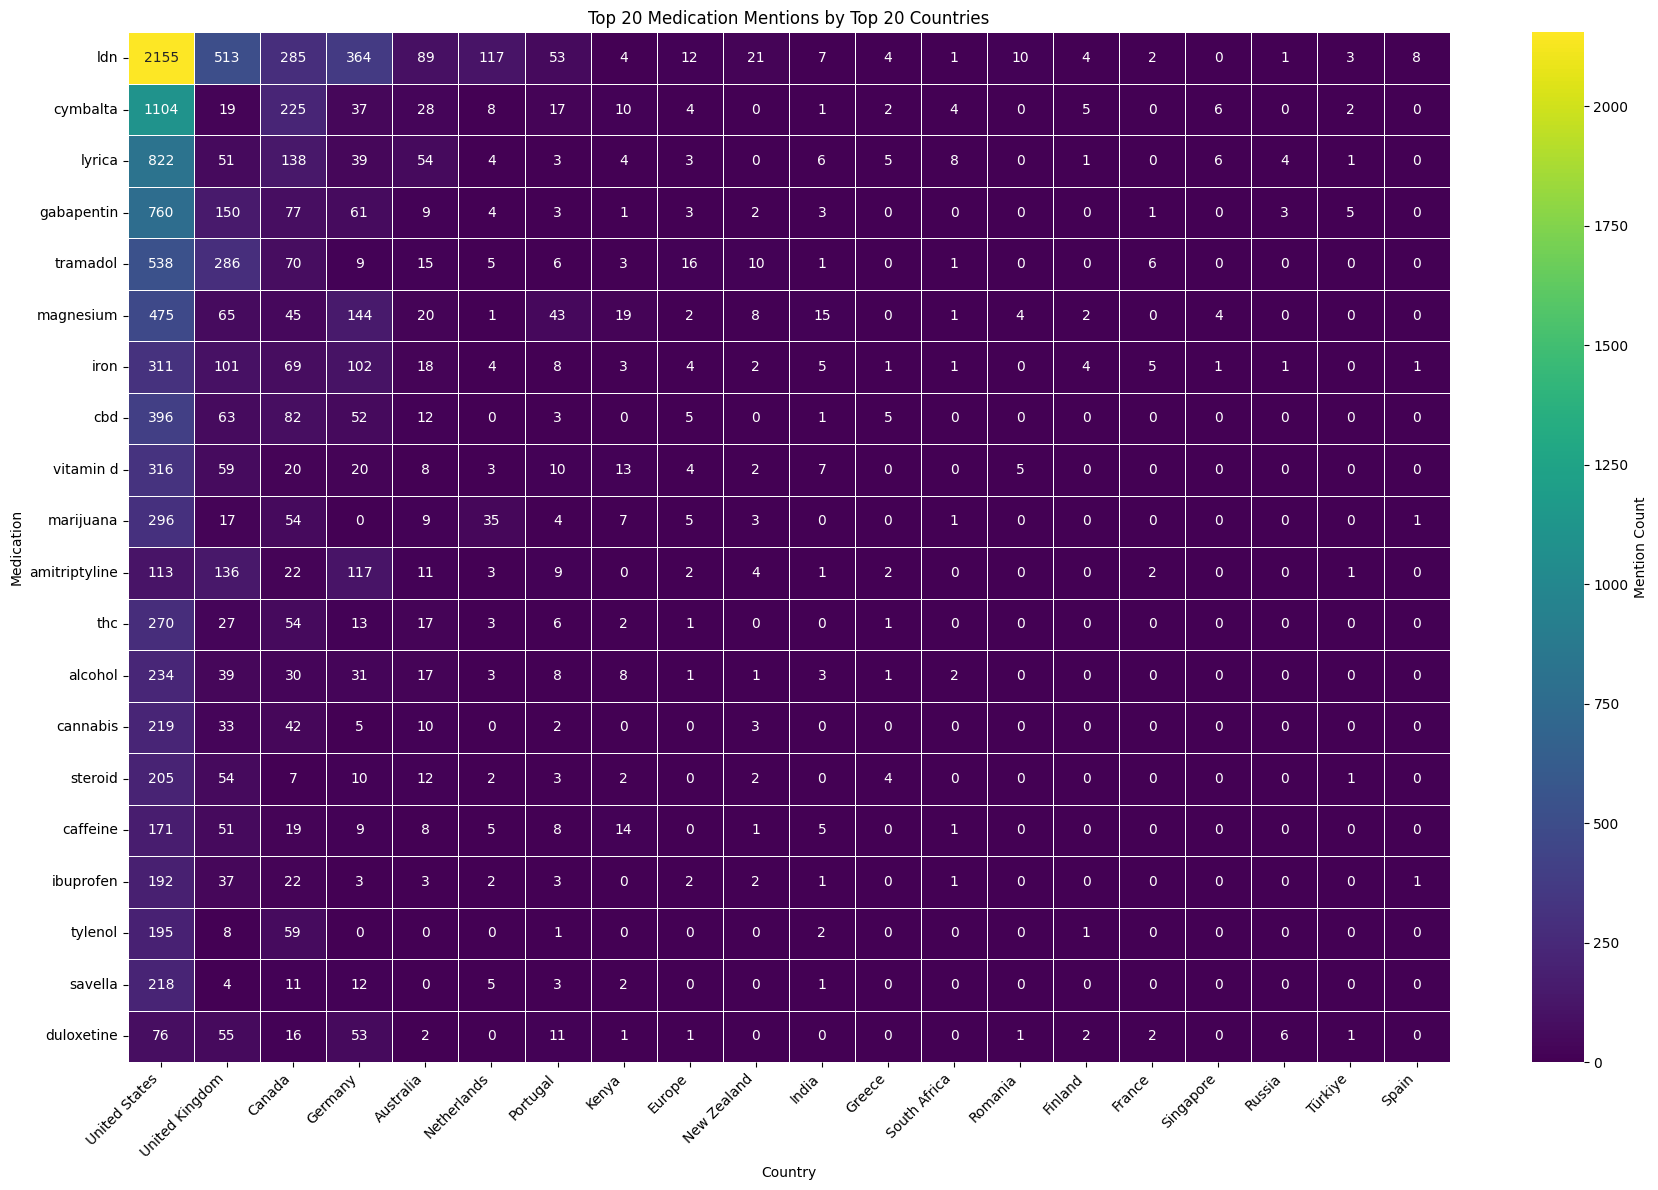

In [ ]:
def create_top20_medication_country_heatmap(df_filtered):
    """
    Create heatmap with top 20 medications and top 20 countries - FIXED VERSION
    """
    # Create pivot table
    pivot_data = df_filtered.pivot_table(
        index='Medication',
        columns='Country',
        values='Count',
        fill_value=0
    )

    # Sort by total mentions for better visualization
    pivot_data = pivot_data.loc[
        pivot_data.sum(axis=1).sort_values(ascending=False).index,
        pivot_data.sum(axis=0).sort_values(ascending=False).index
    ]

    # Create heatmap - FIXED: Use fmt='.0f' instead of fmt='d'
    plt.figure(figsize=(18, 12))
    sns.heatmap(pivot_data, annot=True, cmap='viridis', fmt='.0f',  # Changed this line
                cbar_kws={'label': 'Mention Count'},
                linewidths=0.5)
    plt.title('Top 20 Medication Mentions by Top 20 Countries')
    plt.xlabel('Country')
    plt.ylabel('Medication')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    plt.savefig('top_20_medication_mentions_by_top_20_countries_heatmap.png',
                bbox_inches='tight', dpi=300, facecolor='white')
    plt.show()

# Use the fixed function
create_top20_medication_country_heatmap(df_top_20_filtered)


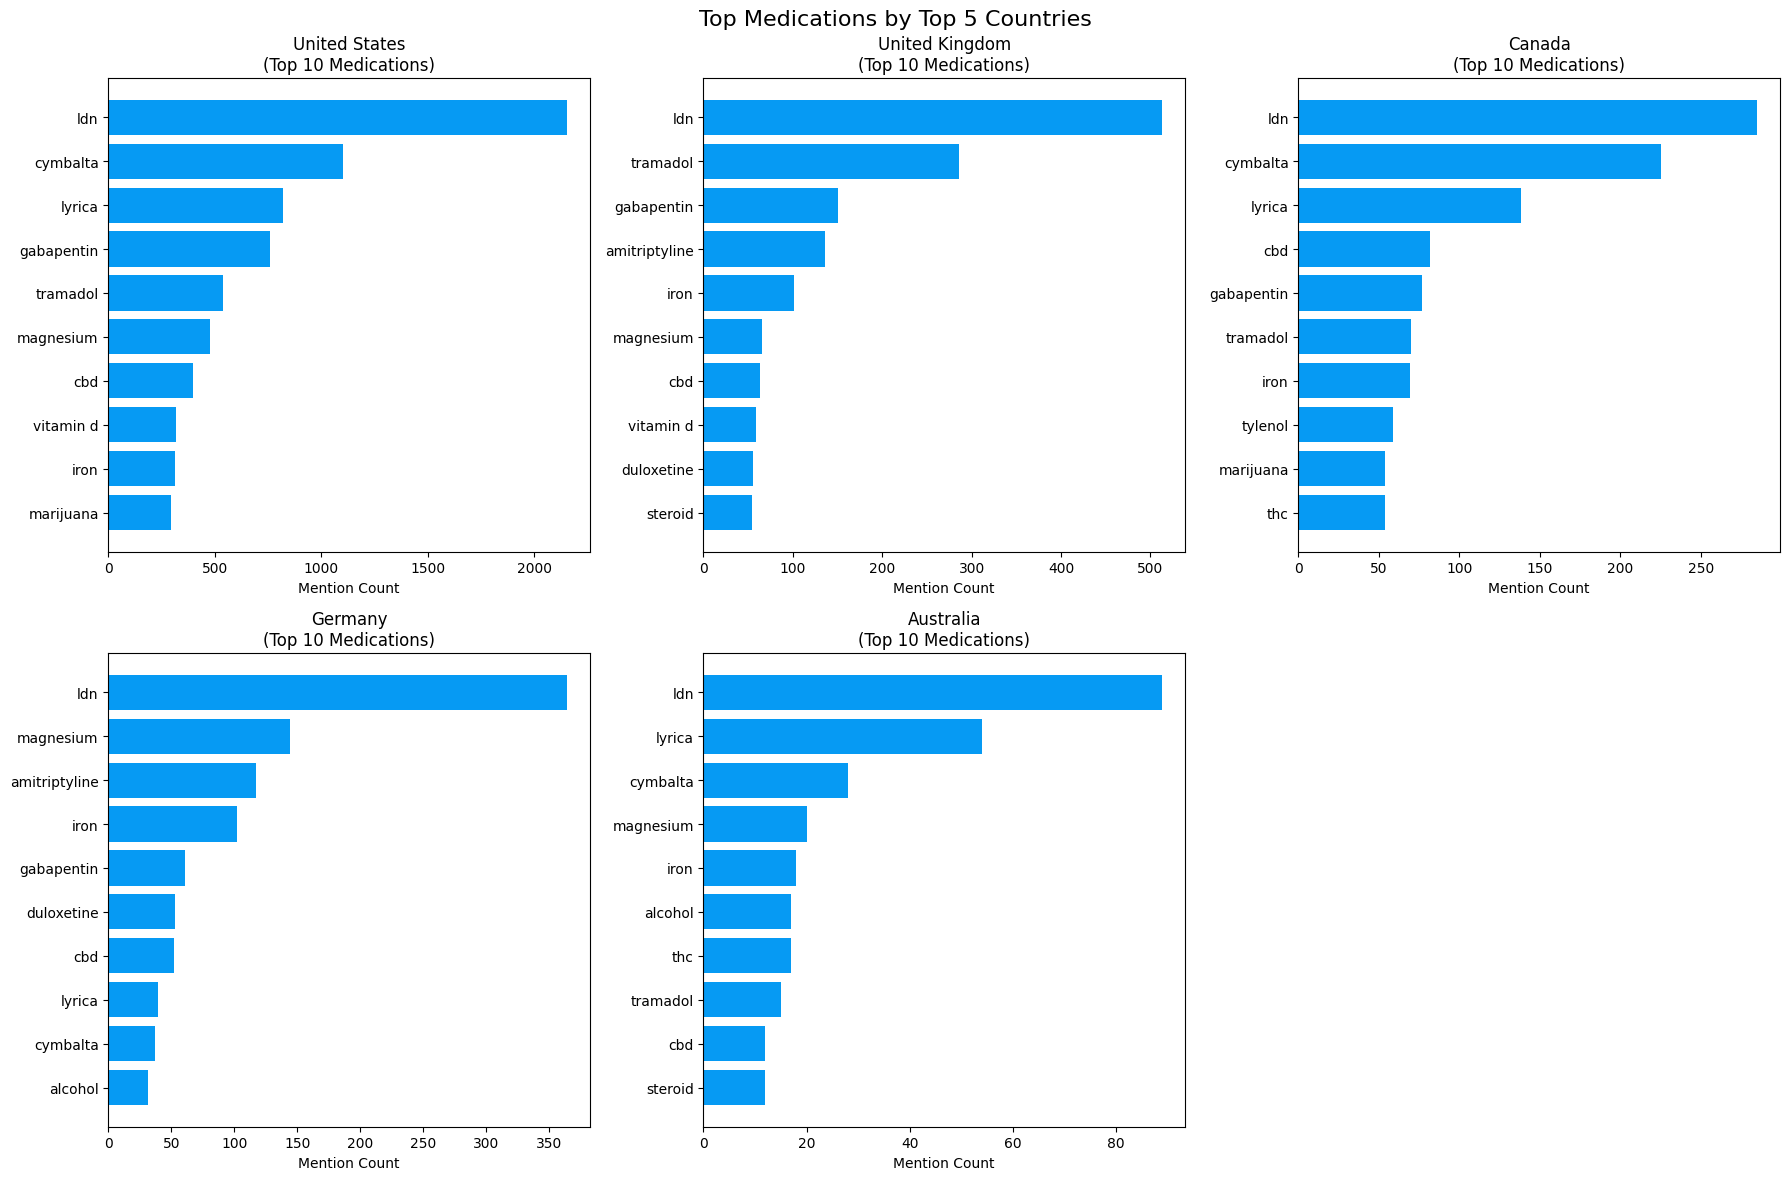

In [ ]:
def plot_top5_countries_medications(df_filtered, top_n_meds=10):
    """
    Compare medication usage across top 5 countries
    """
    # Get top 5 countries
    top_5_countries = df_filtered.groupby('Country')['Count'].sum().nlargest(5).index.tolist()

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    for i, country in enumerate(top_5_countries):
        country_data = df_filtered[df_filtered['Country'] == country].nlargest(top_n_meds, 'Count')

        axes[i].barh(country_data['Medication'], country_data['Count'], color='#069AF3')
        axes[i].set_xlabel('Mention Count')
        axes[i].set_title(f'{country}\n(Top {top_n_meds} Medications)')
        axes[i].invert_yaxis()

    # Hide the last subplot if we have only 5 countries
    axes[5].axis('off')

    plt.suptitle('Top Medications by Top 5 Countries', fontsize=16)
    plt.tight_layout()

    plt.savefig('top_medications_by_top_5_countries.png', bbox_inches='tight')
    plt.show()

# Create the comparison chart
plot_top5_countries_medications(df_top_20_filtered)


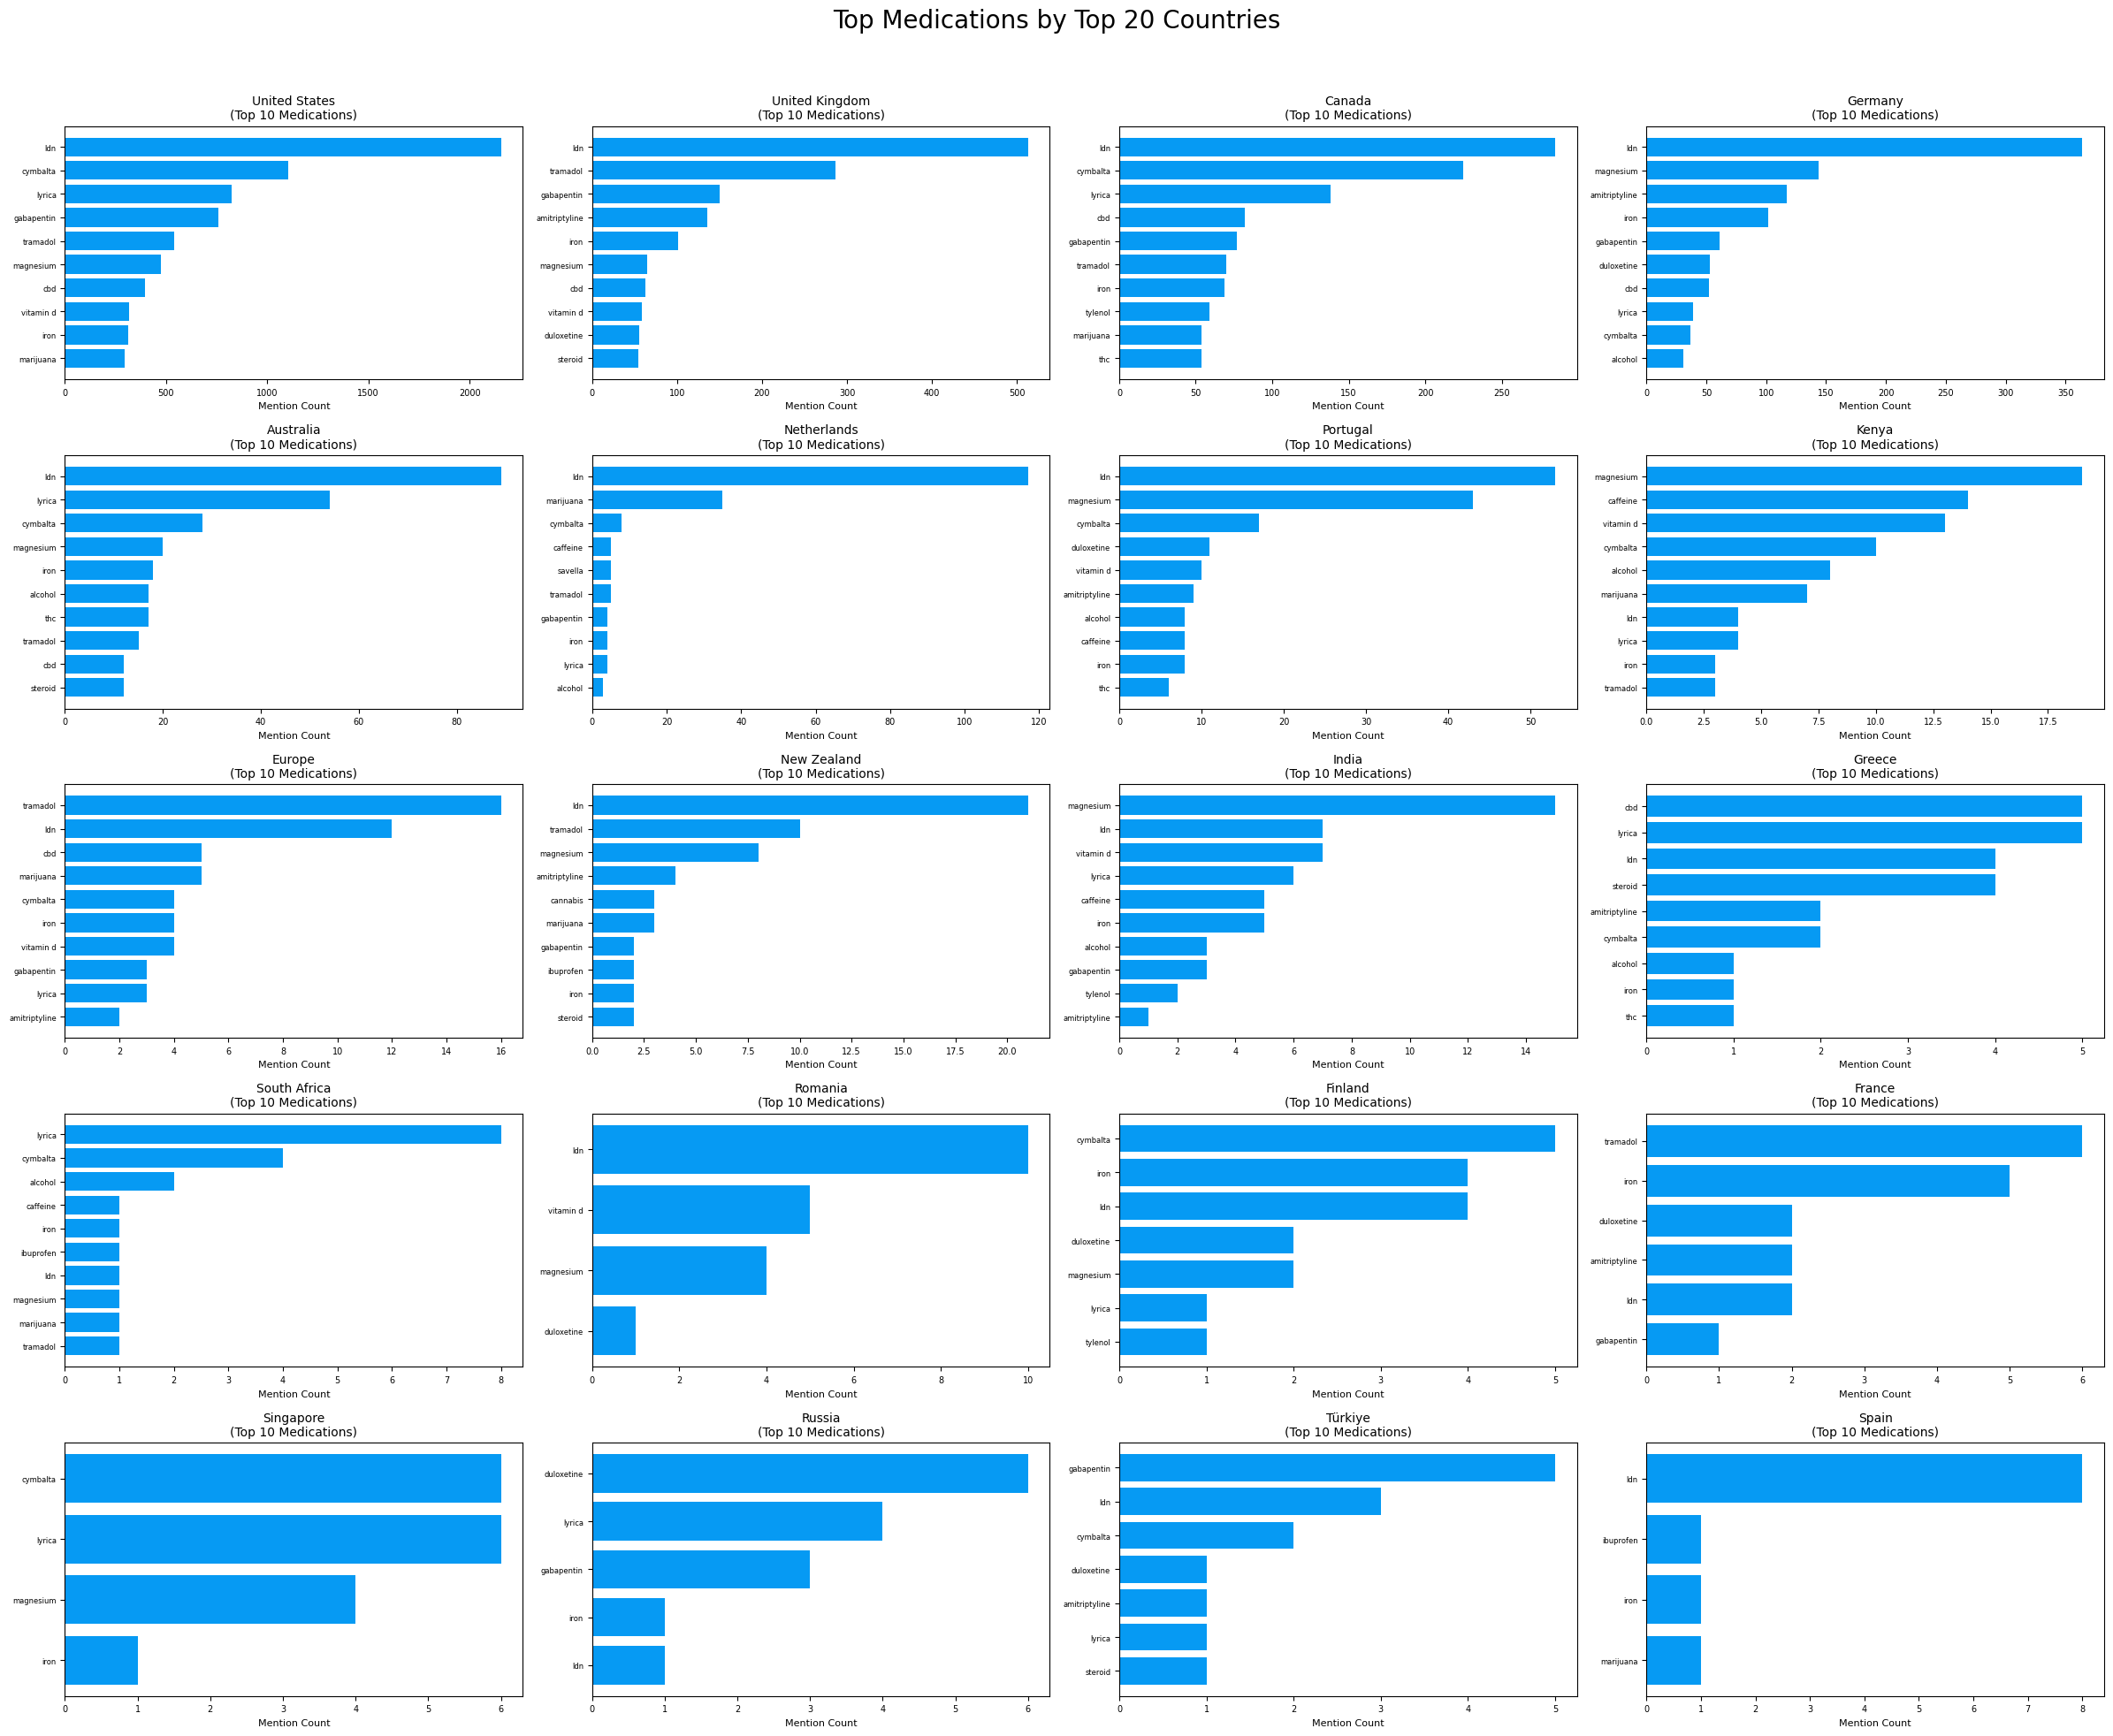

In [ ]:
import matplotlib.pyplot as plt

def plot_top20_countries_medications(df_filtered, top_n_meds=10):
    """
    Compare medication usage across top 20 countries
    Plots in 5 rows and 4 columns layout (total 20 countries)
    """
    # Get top 20 countries
    top_20_countries = df_filtered.groupby('Country')['Count'].sum().nlargest(20).index.tolist()

    # Create 5x4 subplot grid (5 rows, 4 columns)
    fig, axes = plt.subplots(5, 4, figsize=(24, 20))
    axes = axes.flatten()

    for i, country in enumerate(top_20_countries):
        country_data = df_filtered[df_filtered['Country'] == country].nlargest(top_n_meds, 'Count')

        axes[i].barh(country_data['Medication'], country_data['Count'], color='#069AF3')
        axes[i].set_xlabel('Mention Count', fontsize=8)
        axes[i].set_title(f'{country}\n(Top {top_n_meds} Medications)', fontsize=10)
        axes[i].invert_yaxis()

        # Adjust tick label sizes for better readability
        axes[i].tick_params(axis='both', which='major', labelsize=7)
        axes[i].tick_params(axis='y', which='major', labelsize=6)

    # Hide any remaining empty subplots if less than 20 countries are available
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    # Add main title with proper spacing
    plt.suptitle('Top Medications by Top 20 Countries', fontsize=20, y=0.98)

    # Adjust layout with proper spacing
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for main title

    # Save the figure
    plt.savefig('top_medications_by_top_20_countries.png',
                bbox_inches='tight', dpi=300, facecolor='white')

    plt.show()

# Call the updated function
plot_top20_countries_medications(df_top_20_filtered)


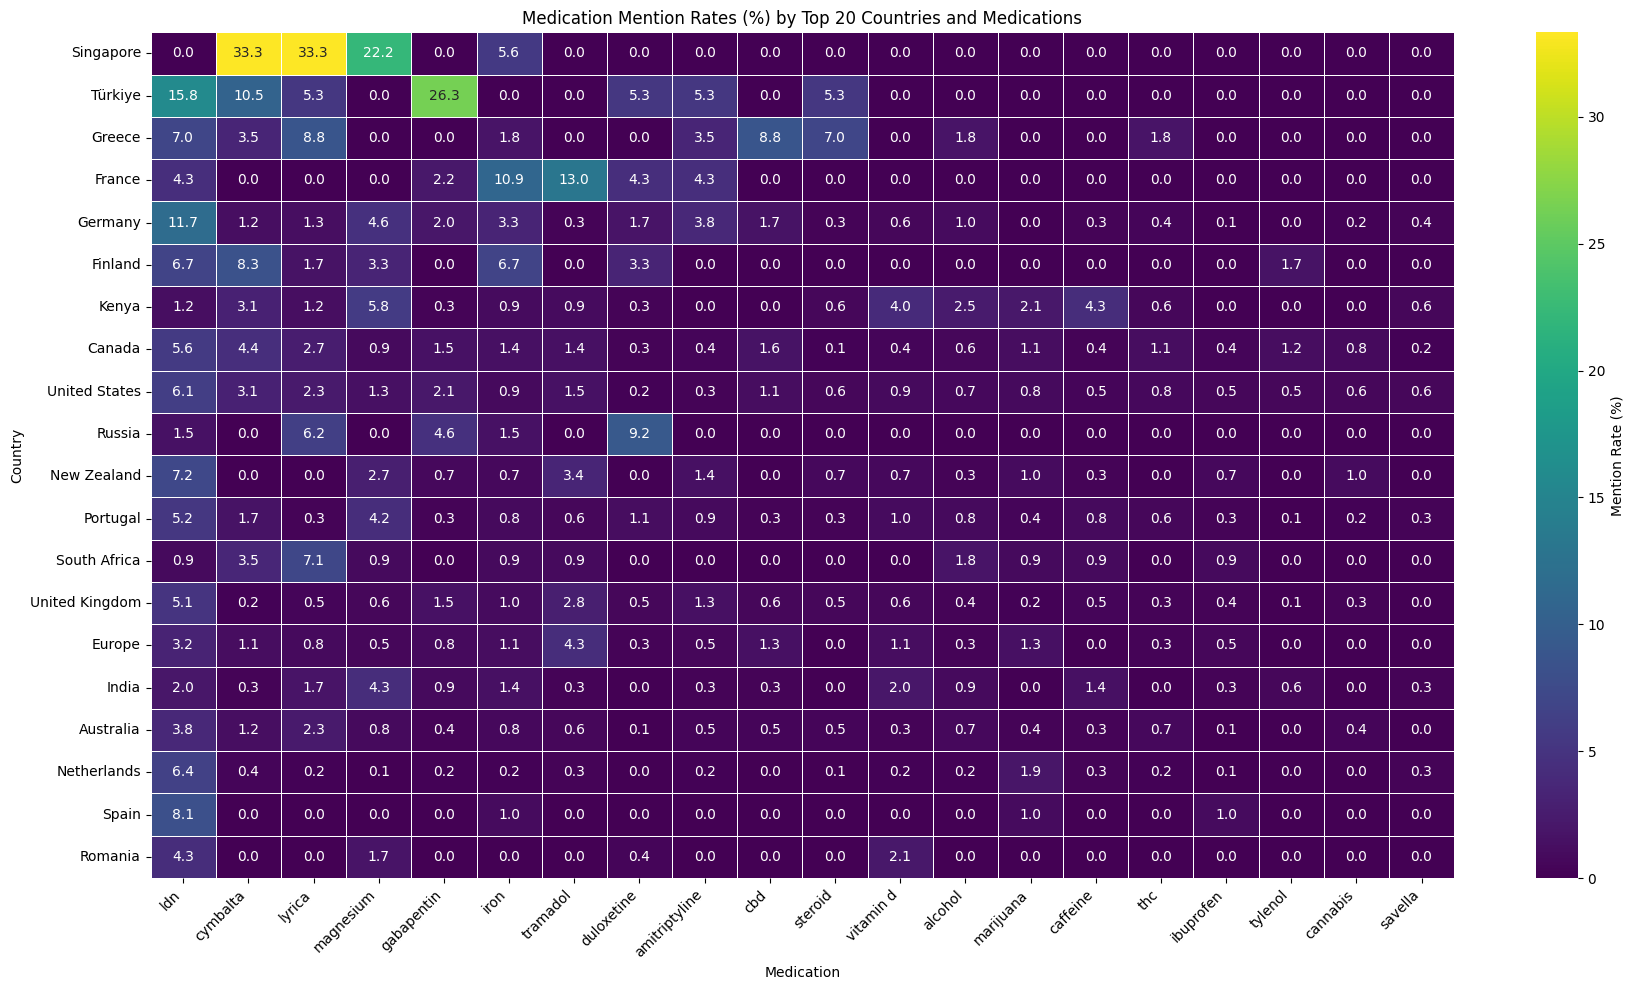

In [ ]:
def analyze_top20_mention_rates(df_filtered):
    """
    Analyze mention rates for top 20 medications and countries
    """
    # Calculate mention rates
    mention_rates = df_filtered.pivot_table(
        index='Country',
        columns='Medication',
        values='Mention_Rate',
        fill_value=0
    )

    # Sort by total mention rates
    mention_rates = mention_rates.loc[
        mention_rates.sum(axis=1).sort_values(ascending=False).index,
        mention_rates.sum(axis=0).sort_values(ascending=False).index
    ]

    # Create heatmap for mention rates
    plt.figure(figsize=(18, 10))
    sns.heatmap(mention_rates, annot=True, cmap='viridis', fmt='.1f',
                cbar_kws={'label': 'Mention Rate (%)'},
                linewidths=0.5)
    plt.title('Medication Mention Rates (%) by Top 20 Countries and Medications')
    plt.xlabel('Medication')
    plt.ylabel('Country')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return mention_rates

# Analyze mention rates
mention_rates_top20 = analyze_top20_mention_rates(df_top_20_filtered)


In [ ]:
def create_top20_summary(df_filtered):
    """
    Create comprehensive summary for top 20 medications and countries
    """
    # Medication summary
    med_summary = df_filtered.groupby('Medication').agg({
        'Count': 'sum',
        'Country': 'count',
        'Mention_Rate': 'mean'
    }).rename(columns={'Country': 'Countries_Mentioned'}).round(2)
    med_summary = med_summary.sort_values('Count', ascending=False)

    # Country summary
    country_summary = df_filtered.groupby('Country').agg({
        'Count': 'sum',
        'Medication': 'count',
        'Total_Posts': 'first',
        'Mention_Rate': 'mean'
    }).rename(columns={'Medication': 'Unique_Medications'}).round(2)
    country_summary['Medications_per_Post'] = (country_summary['Count'] /
                                              country_summary['Total_Posts']).round(3)
    country_summary = country_summary.sort_values('Count', ascending=False)

    print("TOP 20 MEDICATIONS SUMMARY:")
    print("=" * 50)
    print(med_summary)

    print("\n\nTOP 20 COUNTRIES SUMMARY:")
    print("=" * 50)
    print(country_summary)

    return med_summary, country_summary

# Generate summaries
med_summary_top20, country_summary_top20 = create_top20_summary(df_top_20_filtered)


TOP 20 MEDICATIONS SUMMARY:
               Count  Countries_Mentioned  Mention_Rate
Medication                                             
ldn             3653                   19          5.58
cymbalta        1472                   15          5.06
lyrica          1149                   16          4.72
gabapentin      1082                   14          3.12
tramadol         966                   13          2.33
magnesium        848                   15          3.61
iron             641                   18          2.26
cbd              619                    9          1.80
vitamin d        467                   12          1.15
marijuana        432                   11          1.01
amitriptyline    423                   13          1.74
thc              394                   10          0.66
alcohol          378                   13          0.90
cannabis         314                    7          0.51
steroid          302                   11          1.46
caffeine         292

In [ ]:
def find_country_medication_preferences(df_filtered):
    """
    Find which countries have the highest usage for each medication
    """
    preferences = {}

    for medication in df_filtered['Medication'].unique():
        med_data = df_filtered[df_filtered['Medication'] == medication].sort_values('Count', ascending=False)
        if len(med_data) > 0:
            preferences[medication] = {
                'top_country': med_data.iloc[0]['Country'],
                'top_count': med_data.iloc[0]['Count'],
                'second_country': med_data.iloc[1]['Country'] if len(med_data) > 1 else 'N/A',
                'second_count': med_data.iloc[1]['Count'] if len(med_data) > 1 else 0
            }

    # Convert to DataFrame for better display
    pref_df = pd.DataFrame(preferences).T
    pref_df = pref_df.sort_values('top_count', ascending=False)

    print("MEDICATION PREFERENCES BY COUNTRY:")
    print("=" * 60)
    print("Medication → Top Country (Count) | Second Country (Count)")
    print("-" * 60)

    for idx, row in pref_df.head(15).iterrows():
        print(f"{idx:<20} → {row['top_country']:<15} ({row['top_count']:<3}) | {row['second_country']:<15} ({row['second_count']})")

    return pref_df

# Find medication preferences
medication_preferences = find_country_medication_preferences(df_top_20_filtered)


MEDICATION PREFERENCES BY COUNTRY:
Medication → Top Country (Count) | Second Country (Count)
------------------------------------------------------------
ldn                  → United States   (2155) | United Kingdom  (513)
cymbalta             → United States   (1104) | Canada          (225)
lyrica               → United States   (822) | Canada          (138)
gabapentin           → United States   (760) | United Kingdom  (150)
tramadol             → United States   (538) | United Kingdom  (286)
magnesium            → United States   (475) | Germany         (144)
cbd                  → United States   (396) | Canada          (82)
vitamin d            → United States   (316) | United Kingdom  (59)
iron                 → United States   (311) | Germany         (102)
marijuana            → United States   (296) | Canada          (54)
thc                  → United States   (270) | Canada          (54)
alcohol              → United States   (234) | United Kingdom  (39)
cannabis             

In [ ]:
# Save the top 20 filtered data for future use
df_top_20_filtered.to_csv('top20_medications_countries_analysis.csv', index=False)

# Save summary statistics
med_summary_top20.to_csv('top20_medications_summary.csv')
country_summary_top20.to_csv('top20_countries_summary.csv')

print("Analysis complete! Files saved:")
print("- top20_medications_countries_analysis.csv")
print("- top20_medications_summary.csv")
print("- top20_countries_summary.csv")

Analysis complete! Files saved:
- top20_medications_countries_analysis.csv
- top20_medications_summary.csv
- top20_countries_summary.csv



Top Medications in United States:
ldn           2569.0
cymbalta      1460.0
lyrica        1073.0
gabapentin     936.0
tramadol       747.0
dtype: float64

Top Medications in Australia:
ldn         108.0
lyrica       94.0
cymbalta     35.0
codeine      33.0
thc          28.0
dtype: float64

Top Medications in Germany:
ldn              453.0
magnesium        324.0
amitriptyline    148.0
amino acid       145.0
iron             127.0
dtype: float64

Top Medications in Canada:
ldn         353.0
cymbalta    288.0
lyrica      174.0
cbd         127.0
tramadol     88.0
dtype: float64

Top Medications in United Kingdom:
ldn              593.0
tramadol         355.0
amitriptyline    173.0
gabapentin       170.0
paracetamol      130.0
dtype: float64

Top Medications in Romania:
ldn            10
vitamin d       5
magnesium       4
calcium         2
paracetamol     1
dtype: int64

Top Medications in Cyprus:
acetaminophen    0
advil            0
alcohol          0
aloe vera        0
amino acid     

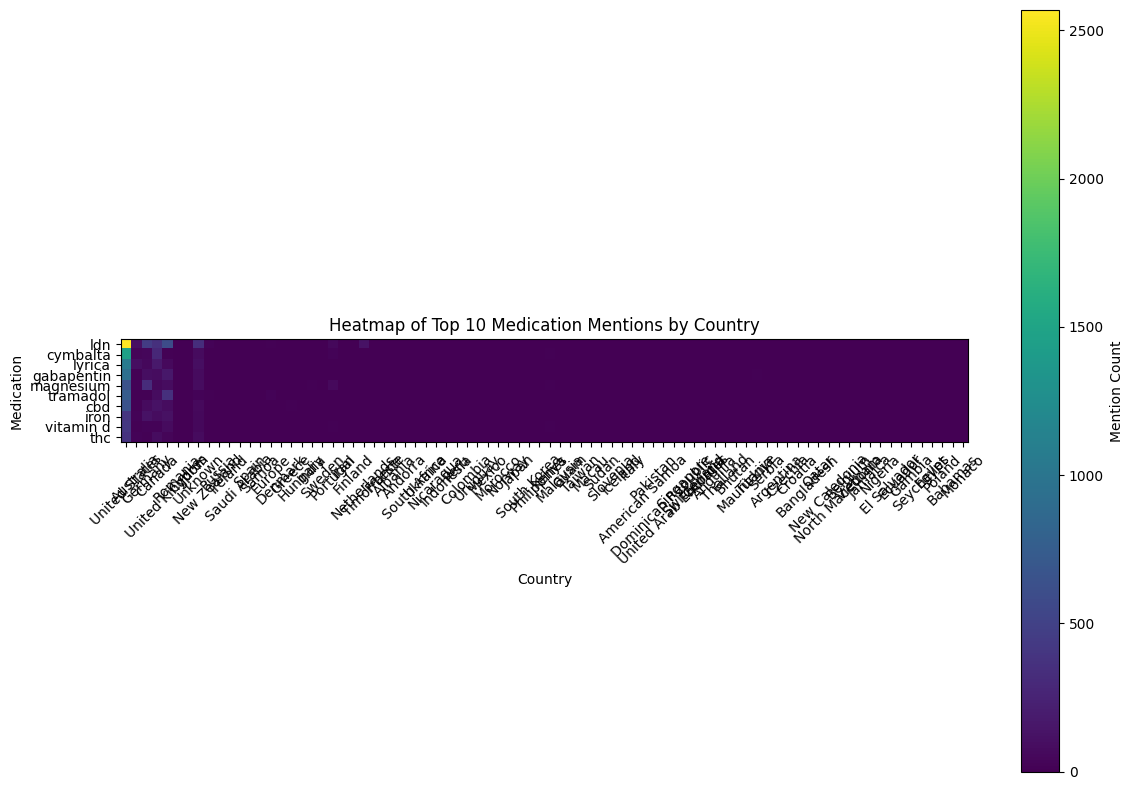

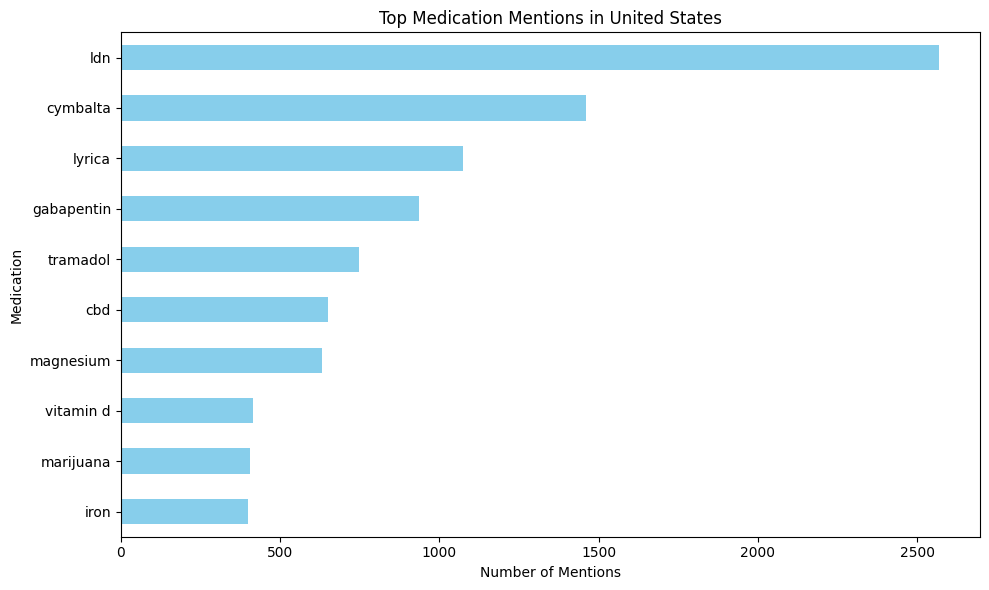

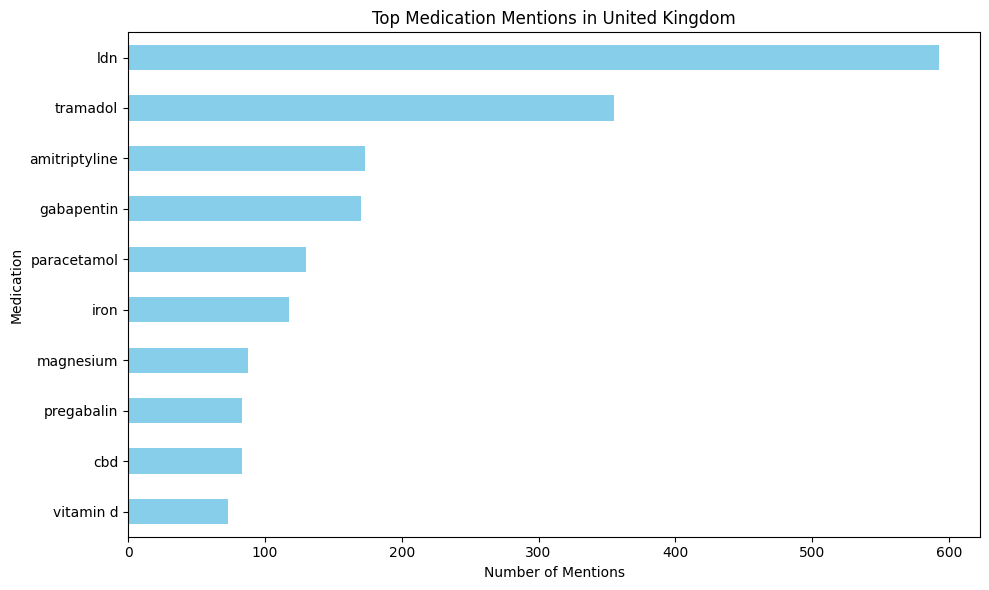

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
try:
    from wordcloud import WordCloud
    wordcloud_available = True
except ImportError:
    wordcloud_available = False
    print("Install wordcloud via 'pip install wordcloud' for word cloud visualization.")

# Your master list of medications
medications = [
    'acetaminophen','advil','alcohol','aloe vera','amino acid','amitriptyline', 'arnica cream','baclofen','buprenorphine','caffeine','calcium','cannabis', 'capsaicin','cbd','celecoxib','chondroitin','codeine','coenzyme q10','coq10', 'cyclobenzaprine','cymbalta','desipramine','diclofenac','duloxetine','effexor', 'etoricoxib','fentanyl','fish oil','flexeril','fluoxetine','folic acid', 'gabapentin','ginger tea','glucosamine','grape seed','green tea','hydrocodone', 'hydromorphone','ibuprofen','imipramine','indomethacin','iron','ketamine', 'ketoprofen','lamotrigine','ldn','lidocaine','lyrica','magnesium', 'magnesium citrate','magnesium glycinate','magnesium malate','marijuana', 'melatonin','meloxicam','meperidine','metaxalone','methadone','methocarbamol', 'milnacipran','morphine','naltrexone','naproxen','neurontin','nicotine', 'nortriptyline','omega 3','oxycodone','paracetamol','piroxicam','pregabalin', 'prozac','robaxin','savella','seed extract','sertraline','steroid','steroids', 'tapentadol','thc','tizanidine','topiramate','tramadol','tylenol','venlafaxine', 'vitamin a','vitamin b','vitamin b1','vitamin b12','vitamin b6','vitamin c', 'vitamin d','vitamin d3','vitamin e','zinc','zoloft'
]

# Load your dataset (replace with your actual code)
# df_clean = pd.read_csv('your_dataset.csv')  # Example; ensure 'content_clean' and 'country_name' columns exist

# For demonstration, use sample data (replace with your df_clean)
sample_data = {
    'content_clean': [
        "I take lyrica and tramadol for pain. Lyrica helps a lot.",
        "Gabapentin and magnesium are my go-to. Gabapentin twice a day.",
        "Tried ibuprofen, acetaminophen, and vitamin d. Ibuprofen works best.",
        "Using cbd and thc for relief. CBD oil daily.",
        "On duloxetine and amitriptyline. Duloxetine in the morning.",
        "Morphine, oxycodone, and steroids for severe flare-ups. Morphine as needed.",
        "Vitamin b12 and folic acid supplements. Vitamin b12 every day.",
        "Pregabalin and naproxen combination. Pregabalin at night.",
        "Fish oil and omega 3 for inflammation. Fish oil capsules.",
        "Melatonin for sleep, and caffeine for energy. Melatonin before bed."
    ],
    'country_name': [
        "United States",
        "United States",
        "United Kingdom",
        "United Kingdom",
        "United States",
        "Canada",
        "United Kingdom",
        "Canada",
        "United States",
        "United Kingdom"
    ]
}
# df_clean = pd.DataFrame(sample_data)

# Function to count mentions per country
def count_mentions_by_country(df, medications):
    results = {}
    for country in df['country_name'].unique():
        country_df = df[df['country_name'] == country]
        counts = {}
        for med in medications:
            counts[med] = country_df['content_clean'].str.lower().str.count(med.lower()).sum()
        results[country] = pd.Series(counts).sort_values(ascending=False)
    return results

# Get counts by country
counts_by_country = count_mentions_by_country(df_clean, medications)

# Print top 5 medications per country
for country, series in counts_by_country.items():
    print("\nTop Medications in {0}:".format(country))
    print(series.head(5))

# Visualization: Heatmap of top medications across countries
top_meds_overall = pd.Series({med: sum(series[med] for series in counts_by_country.values()) for med in medications}).sort_values(ascending=False).head(10)
heatmap_data = pd.DataFrame({country: series[top_meds_overall.index] for country, series in counts_by_country.items()}).fillna(0)
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, cmap='viridis')
plt.colorbar(label='Mention Count')
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=45)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.title('Heatmap of Top 10 Medication Mentions by Country')
plt.xlabel('Country')
plt.ylabel('Medication')
plt.tight_layout()
plt.savefig('medication_heatmap.png')
print("\nHeatmap saved as 'medication_heatmap.png'.")

# Bar plots for specific countries
for country in ['United States', 'United Kingdom']:
    top_counts = counts_by_country[country][counts_by_country[country] > 0].head(10)
    plt.figure(figsize=(10, 6))
    top_counts.sort_values().plot(kind='barh', color='skyblue')
    plt.title('Top Medication Mentions in {0}'.format(country))
    plt.xlabel('Number of Mentions')
    plt.ylabel('Medication')
    plt.tight_layout()
    plt.savefig('medication_bar_{0}.png'.format(country.replace(" ", "_")))
    print("Bar plot for {0} saved as 'medication_bar_{1}.png'.".format(country, country.replace(" ", "_")))

if wordcloud_available:
    for country, series in counts_by_country.items():
        # Check if the series contains any non-zero values
        if series.max() > 0:
            wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(series.to_dict())
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Word Cloud of Medication Mentions in {country}')
            plt.savefig(f'{country}_wordcloud.png', bbox_inches='tight')
            plt.close()
        else:
            print(f"No medication mentions found for {country}.")

In [ ]:
results = []

for med in medications:
    # Create boolean mask with NaN handled
    mask = df['content_clean'].str.lower().str.contains(med.lower(), na=False)

    # Count occurrences by country
    counts_by_country = df_clean[mask]['country_name'].value_counts()

    for country, count in counts_by_country.items():
        results.append({
            'medication': med,
            'country_name': country,
            'count': count
        })

med_country_df = pd.DataFrame(results)

# Optional: normalize by total posts from each country
total_posts_country = df_clean['country_name'].value_counts().reset_index()
total_posts_country.columns = ['country_name', 'total_posts']

med_country_df = med_country_df.merge(total_posts_country, on='country_name', how='left')
med_country_df['mention_rate'] = med_country_df['count'] / med_country_df['total_posts']

# Example: top 10 medications in the United States
us_top10 = (
    med_country_df[med_country_df['country_name'] == 'United States']
    .sort_values('count', ascending=False)
    .head(10)
)
print(us_top10)


     medication   country_name  count  total_posts  mention_rate
383         ldn  United States   2155        35523      0.060665
177    cymbalta  United States   1104        35523      0.031078
428      lyrica  United States    822        35523      0.023140
278  gabapentin  United States    760        35523      0.021395
726    tramadol  United States    538        35523      0.015145
456   magnesium  United States    475        35523      0.013372
124         cbd  United States    396        35523      0.011148
812   vitamin d  United States    316        35523      0.008896
344        iron  United States    311        35523      0.008755
498   marijuana  United States    296        35523      0.008333
